In [365]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [366]:
#Importing the dataset
df=pd.read_csv('expected_ctc.csv')

In [367]:
#Display first few rows of dataset
pd.set_option('display.max_columns',1000)
df.head()

IDX  Applicant_ID  Total_Experience  Total_Experience_in_field_applied  \
0    1         22753                 0                                  0   
1    2         51087                23                                 14   
2    3         38413                21                                 12   
3    4         11501                15                                  8   
4    5         58941                10                                  5   

       Department               Role   Industry Organization      Designation  \
0             NaN                NaN        NaN          NaN              NaN   
1              HR         Consultant  Analytics            H               HR   
2  Top Management         Consultant   Training            J              NaN   
3         Banking  Financial Analyst   Aviation            F               HR   
4           Sales    Project Manager  Insurance            E  Medical Officer   

   Education Graduation_Specialization University_Grad  \
0         PG                      Arts         Lucknow   
1  Doctorate                 Chemistry           Surat   
2  Doctorate                   Zoology          Jaipur   
3  Doctorate                    Others       Bangalore   
4       Grad                   Zoology          Mumbai   

   Passing_Year_Of_Graduation PG_Specialization University_PG  \
0                      2020.0               NaN           NaN   
1                      1988.0            Others         Surat   
2                      1990.0           Zoology        Jaipur   
3                      1997.0           Zoology     Bangalore   
4                      2004.0           Zoology        Mumbai   

   Passing_Year_Of_PG PHD_Specialization University_PHD  Passing_Year_Of_PHD  \
0                 NaN                NaN            NaN                  NaN   
1              1990.0          Chemistry      Mangalore               1997.0   
2              1992.0            Zoology        Lucknow               1999.0   
3              1999.0          Chemistry       Guwahati               2005.0   
4              2006.0            Zoology      Bangalore               2010.0   

  Curent_Location Preferred_location  Current_CTC Inhand_Offer  \
0        Guwahati               Pune            0            N   
1       Bangalore             Nagpur      2702664            Y   
2       Ahmedabad             Jaipur      2236661            Y   
3          Kanpur            Kolkata      2100510            N   
4       Ahmedabad          Ahmedabad      1931644            N   

  Last_Appraisal_Rating  No_Of_Companies_worked  Number_of_Publications  \
0                   NaN                       0                       0   
1         Key_Performer                       2                       4   
2         Key_Performer                       5                       3   
3                     C                       5                       3   
4                     C                       2                       3   

   Certifications  International_degree_any  Expected_CTC  
0               0                         0        384551  
1               0                         0       3783729  
2               0                         0       3131325  
3               0                         0       2608833  
4               0                         0       2221390

In [368]:
#displaying number of rows and columns
df.shape

(25000, 29)

There are 25000 employee details  and 29 varaibles.

In [369]:
#Checking the dtypes of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

In [370]:
#We are providing inputs to tell pandas that we are trying to work with time series.
df = pd.read_csv('expected_ctc.csv', parse_dates = ['Passing_Year_Of_Graduation','Passing_Year_Of_PG','Passing_Year_Of_PHD'])

In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   IDX                                25000 non-null  int64         
 1   Applicant_ID                       25000 non-null  int64         
 2   Total_Experience                   25000 non-null  int64         
 3   Total_Experience_in_field_applied  25000 non-null  int64         
 4   Department                         22222 non-null  object        
 5   Role                               24037 non-null  object        
 6   Industry                           24092 non-null  object        
 7   Organization                       24092 non-null  object        
 8   Designation                        21871 non-null  object        
 9   Education                          25000 non-null  object        
 10  Graduation_Specialization         

In [372]:
df.head()

IDX  Applicant_ID  Total_Experience  Total_Experience_in_field_applied  \
0    1         22753                 0                                  0   
1    2         51087                23                                 14   
2    3         38413                21                                 12   
3    4         11501                15                                  8   
4    5         58941                10                                  5   

       Department               Role   Industry Organization      Designation  \
0             NaN                NaN        NaN          NaN              NaN   
1              HR         Consultant  Analytics            H               HR   
2  Top Management         Consultant   Training            J              NaN   
3         Banking  Financial Analyst   Aviation            F               HR   
4           Sales    Project Manager  Insurance            E  Medical Officer   

   Education Graduation_Specialization University_Grad  \
0         PG                      Arts         Lucknow   
1  Doctorate                 Chemistry           Surat   
2  Doctorate                   Zoology          Jaipur   
3  Doctorate                    Others       Bangalore   
4       Grad                   Zoology          Mumbai   

  Passing_Year_Of_Graduation PG_Specialization University_PG  \
0                 2020-01-01               NaN           NaN   
1                 1988-01-01            Others         Surat   
2                 1990-01-01           Zoology        Jaipur   
3                 1997-01-01           Zoology     Bangalore   
4                 2004-01-01           Zoology        Mumbai   

  Passing_Year_Of_PG PHD_Specialization University_PHD Passing_Year_Of_PHD  \
0                NaT                NaN            NaN                 NaT   
1         1990-01-01          Chemistry      Mangalore          1997-01-01   
2         1992-01-01            Zoology        Lucknow          1999-01-01   
3         1999-01-01          Chemistry       Guwahati          2005-01-01   
4         2006-01-01            Zoology      Bangalore          2010-01-01   

  Curent_Location Preferred_location  Current_CTC Inhand_Offer  \
0        Guwahati               Pune            0            N   
1       Bangalore             Nagpur      2702664            Y   
2       Ahmedabad             Jaipur      2236661            Y   
3          Kanpur            Kolkata      2100510            N   
4       Ahmedabad          Ahmedabad      1931644            N   

  Last_Appraisal_Rating  No_Of_Companies_worked  Number_of_Publications  \
0                   NaN                       0                       0   
1         Key_Performer                       2                       4   
2         Key_Performer                       5                       3   
3                     C                       5                       3   
4                     C                       2                       3   

   Certifications  International_degree_any  Expected_CTC  
0               0                         0        384551  
1               0                         0       3783729  
2               0                         0       3131325  
3               0                         0       2608833  
4               0                         0       2221390

In [373]:
#Checking the stats of all the columns
df.describe()

IDX  Applicant_ID  Total_Experience  \
count  25000.000000  25000.000000      25000.000000   
mean   12500.500000  34993.240080         12.493080   
std     7217.022701  14390.271591          7.471398   
min        1.000000  10000.000000          0.000000   
25%     6250.750000  22563.750000          6.000000   
50%    12500.500000  34974.500000         12.000000   
75%    18750.250000  47419.000000         19.000000   
max    25000.000000  60000.000000         25.000000   

       Total_Experience_in_field_applied   Current_CTC  \
count                       25000.000000  2.500000e+04   
mean                            6.258200  1.760945e+06   
std                             5.819513  9.202125e+05   
min                             0.000000  0.000000e+00   
25%                             1.000000  1.027312e+06   
50%                             5.000000  1.802568e+06   
75%                            10.000000  2.443883e+06   
max                            25.000000  3.999693e+06   

       No_Of_Companies_worked  Number_of_Publications  Certifications  \
count            25000.000000            25000.000000    25000.000000   
mean                 3.482040                4.089040        0.773680   
std                  1.690335                2.606612        1.199449   
min                  0.000000                0.000000        0.000000   
25%                  2.000000                2.000000        0.000000   
50%                  3.000000                4.000000        0.000000   
75%                  5.000000                6.000000        1.000000   
max                  6.000000                8.000000        5.000000   

       International_degree_any  Expected_CTC  
count              25000.000000  2.500000e+04  
mean                   0.081720  2.250155e+06  
std                    0.273943  1.160480e+06  
min                    0.000000  2.037440e+05  
25%                    0.000000  1.306278e+06  
50%                    0.000000  2.252136e+06  
75%                    0.000000  3.051354e+06  
max                    1.000000  5.599570e+06

The Data Consists of 25000 employee details.Their experiences ranges from 0 to 25years.It also consists of certifications,degree,passing year of graduations,number of companies worked before.


In [374]:
#Checking number of unique rows in each feature
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

DEPARTMENT :  12
IT-Software       1078
Accounts          1118
Top Management    1632
Engineering       1937
Education         1948
Banking           1952
HR                1988
Sales             1991
Others            2041
Healthcare        2062
Analytics/BI      2096
Marketing         2379
Name: Department, dtype: int64


ROLE :  24
Lab Executuve             25
Professor                 33
Research Scientist        33
Sr. Business Analyst     114
Researcher               123
Senior Analyst           128
Area Sales Manager       134
Principal Analyst        275
Data scientist           363
Associate                767
Head                    1108
Scientist               1139
CEO                     1149
Financial Analyst       1182
Senior Researcher       1236
Sales Manager           1427
Sales Execituve         1574
Business Analyst        1711
Consultant              1780
Team Lead               1833
Project Manager         1850
Analyst                 1892
Bio statistician        1

## Univariate

C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


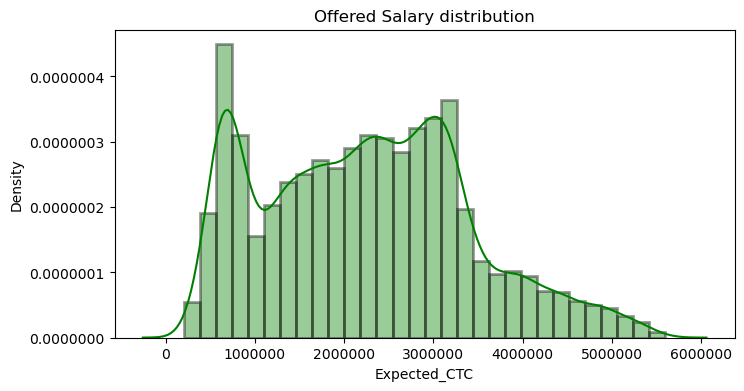

In [375]:
#Let us first analyze the distribution of the Current CTC variable
plt.figure(figsize=[8,4])
sns.distplot(df['Expected_CTC'], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.ticklabel_format(style='plain')
plt.title('Offered Salary distribution')
plt.show()

In [376]:
#finding Categorical variables
df_categorical_features = df.select_dtypes(include='object')

In [377]:
print(df_categorical_features.columns)

Index(['Department', 'Role', 'Industry', 'Organization', 'Designation',
       'Education', 'Graduation_Specialization', 'University_Grad',
       'PG_Specialization', 'University_PG', 'PHD_Specialization',
       'University_PHD', 'Curent_Location', 'Preferred_location',
       'Inhand_Offer', 'Last_Appraisal_Rating'],
      dtype='object')


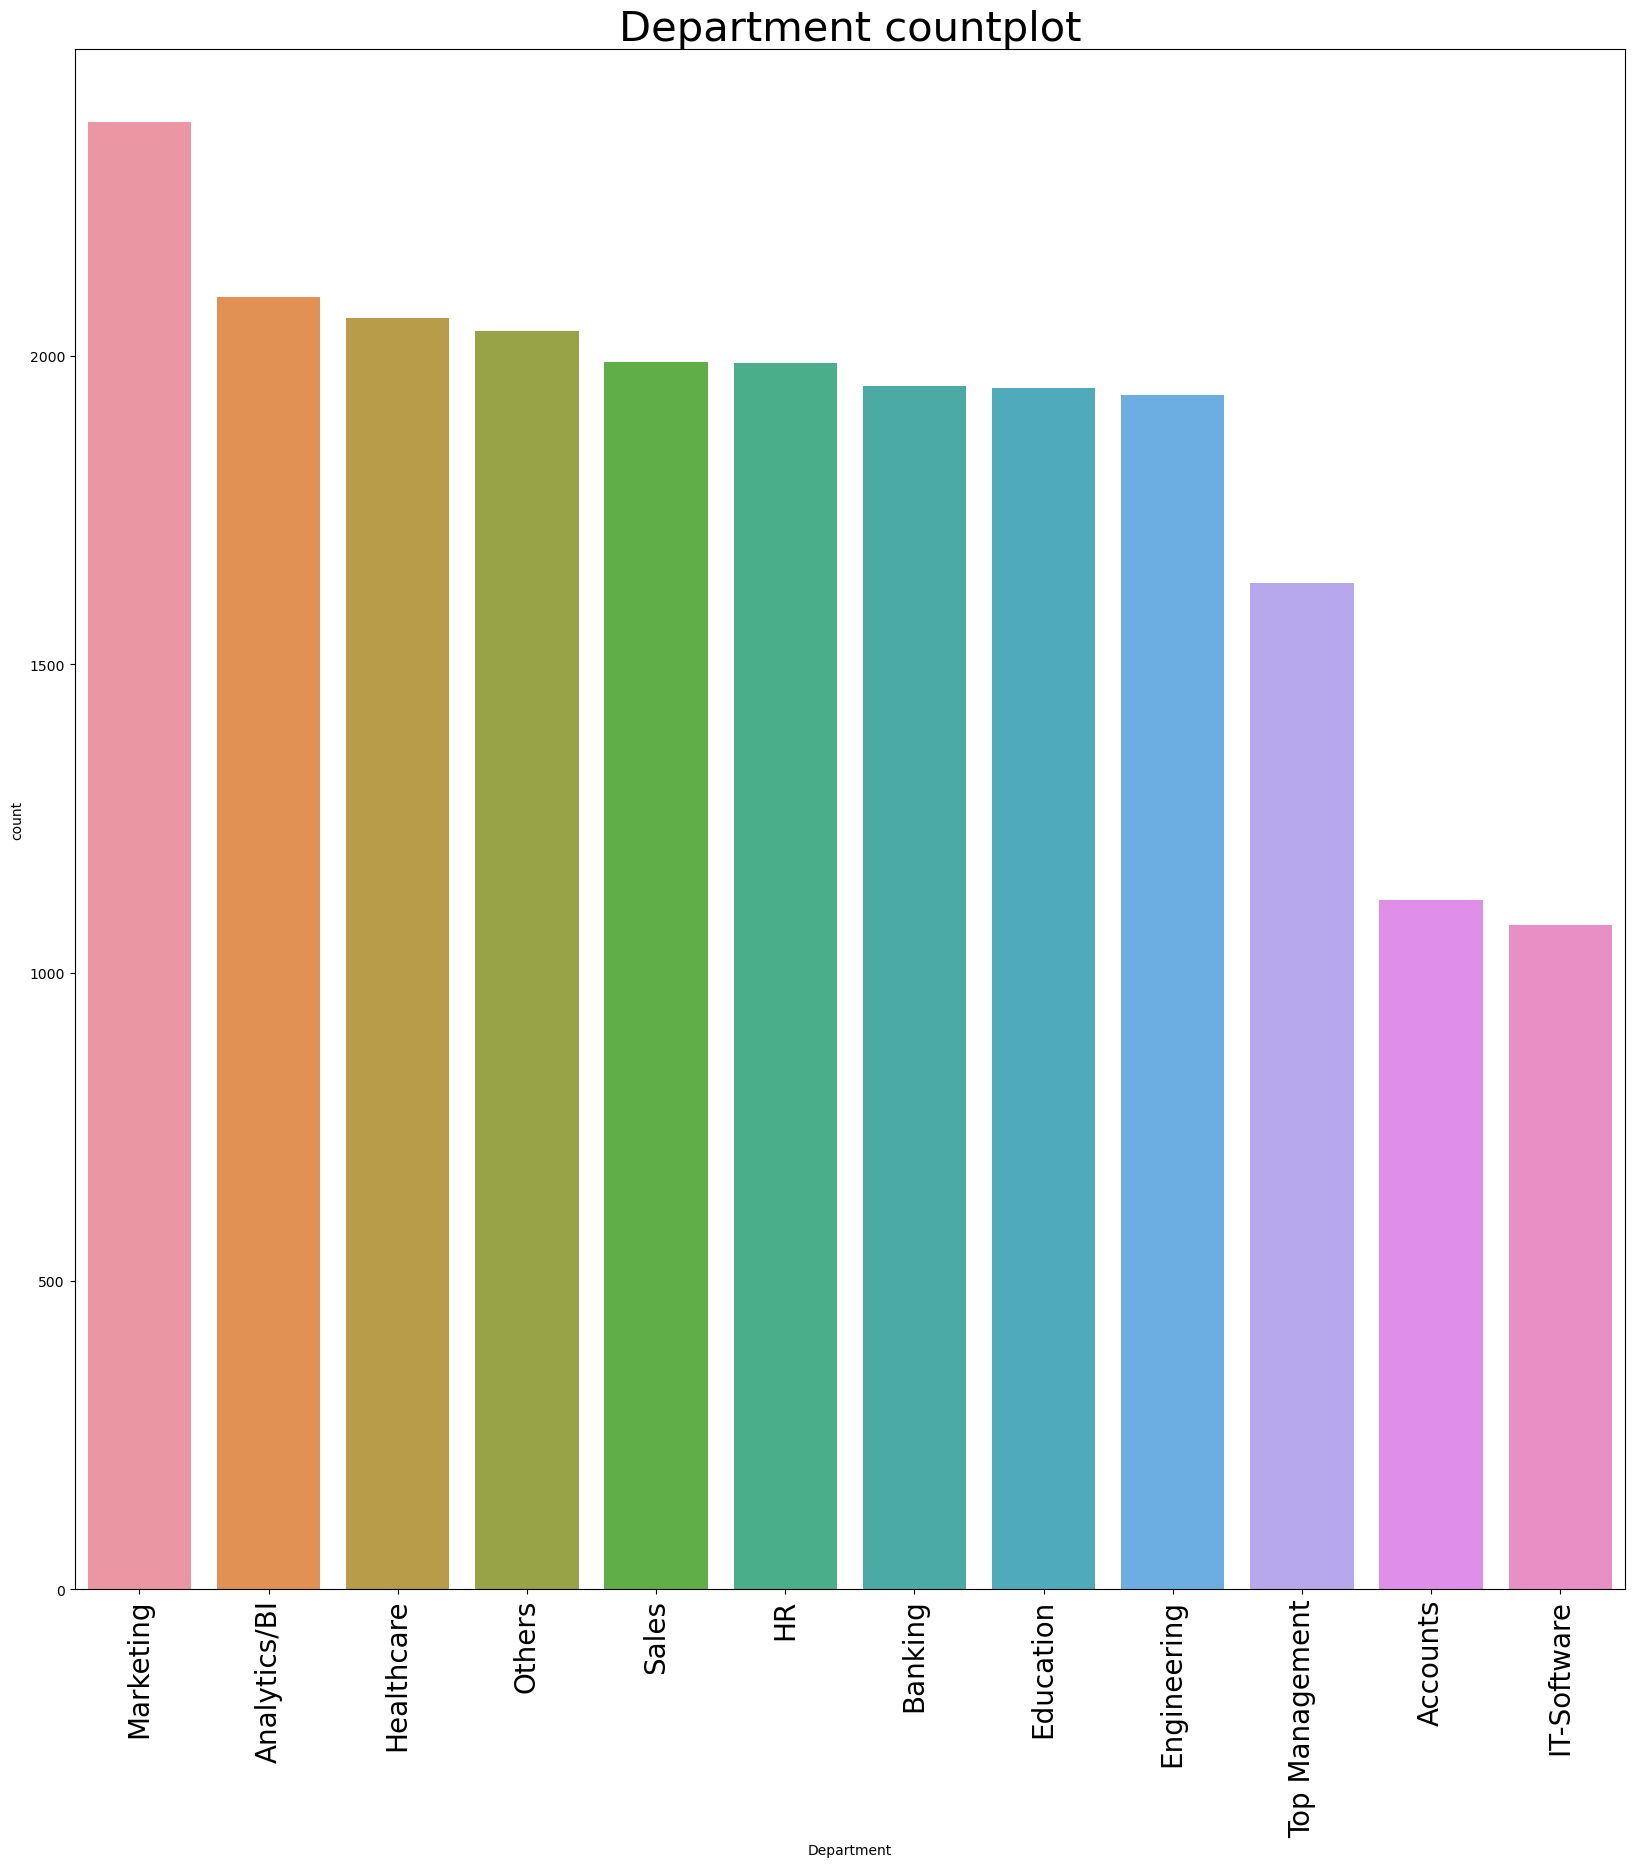

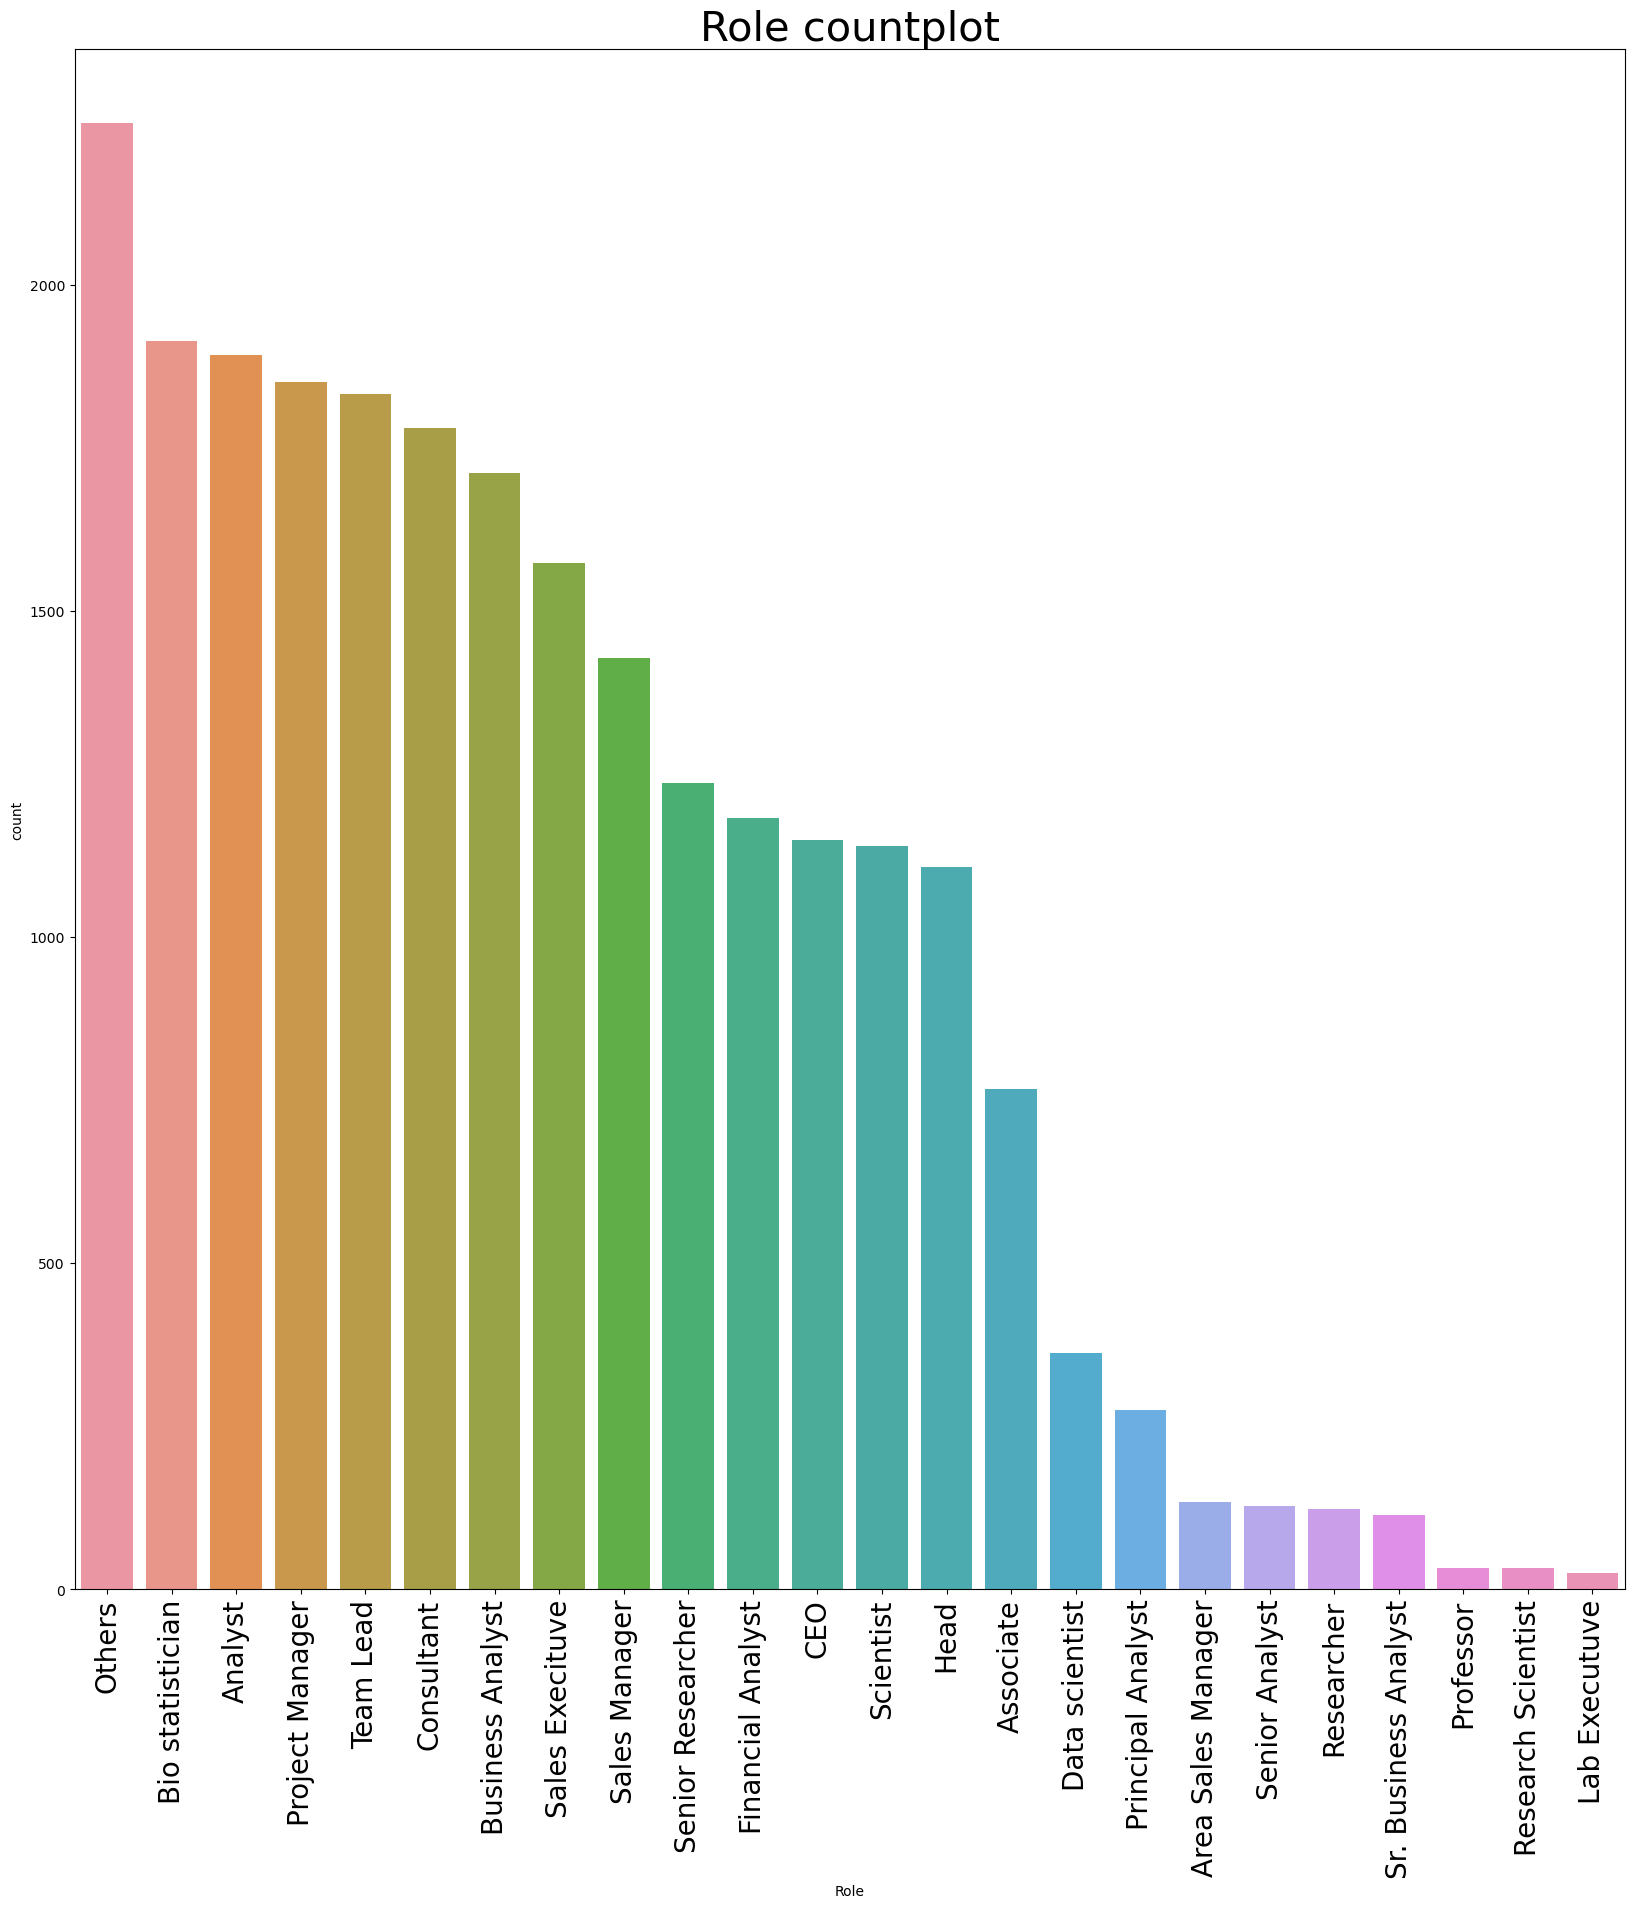

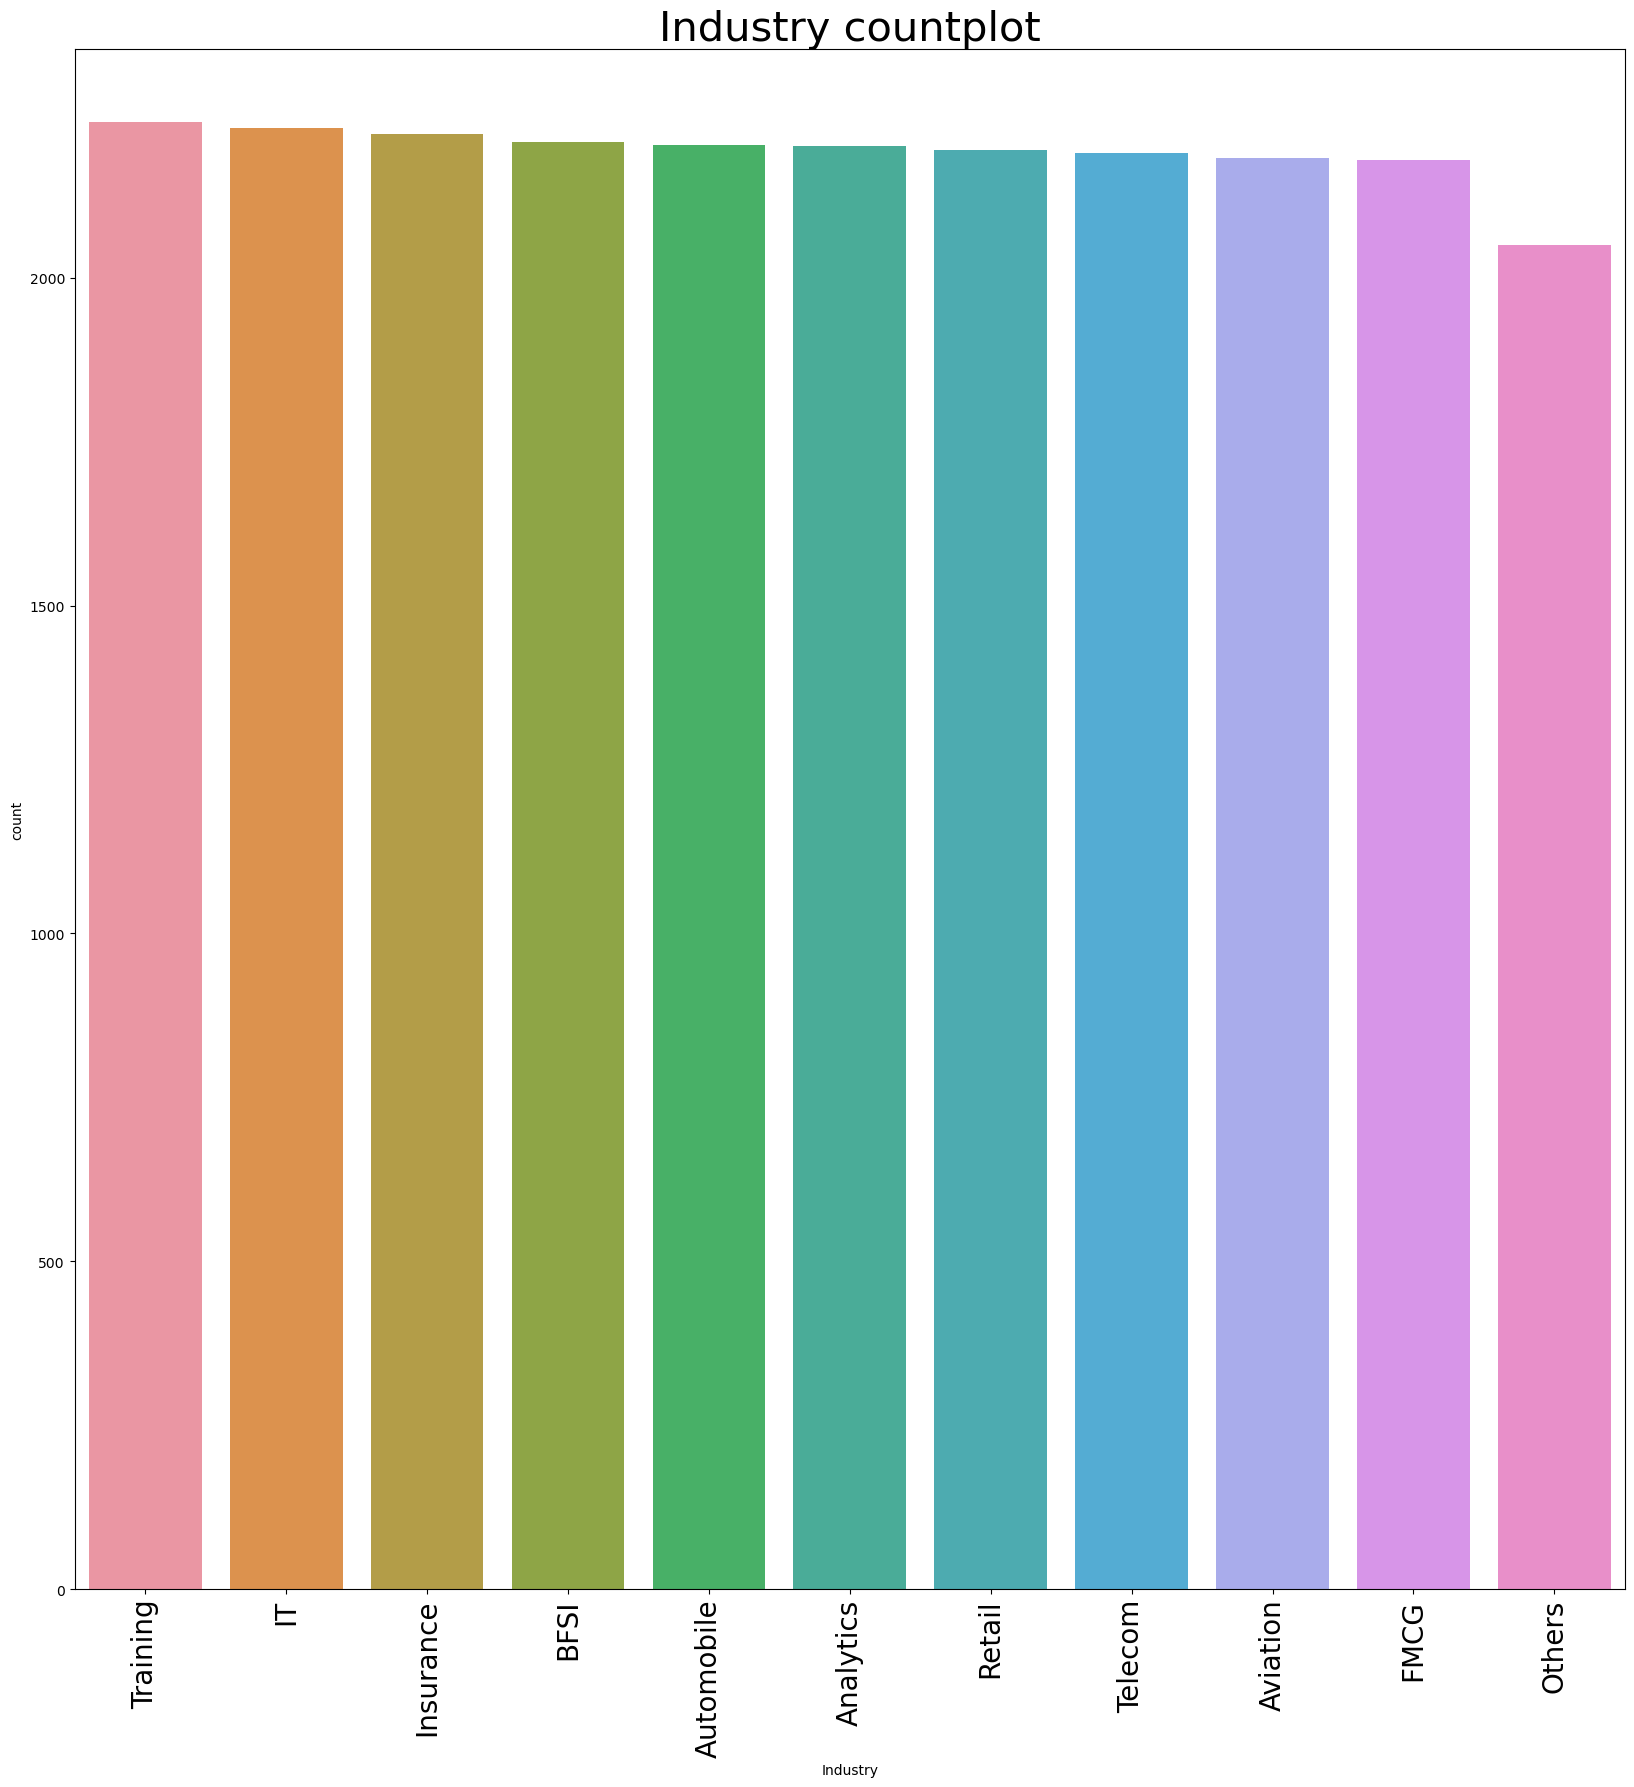

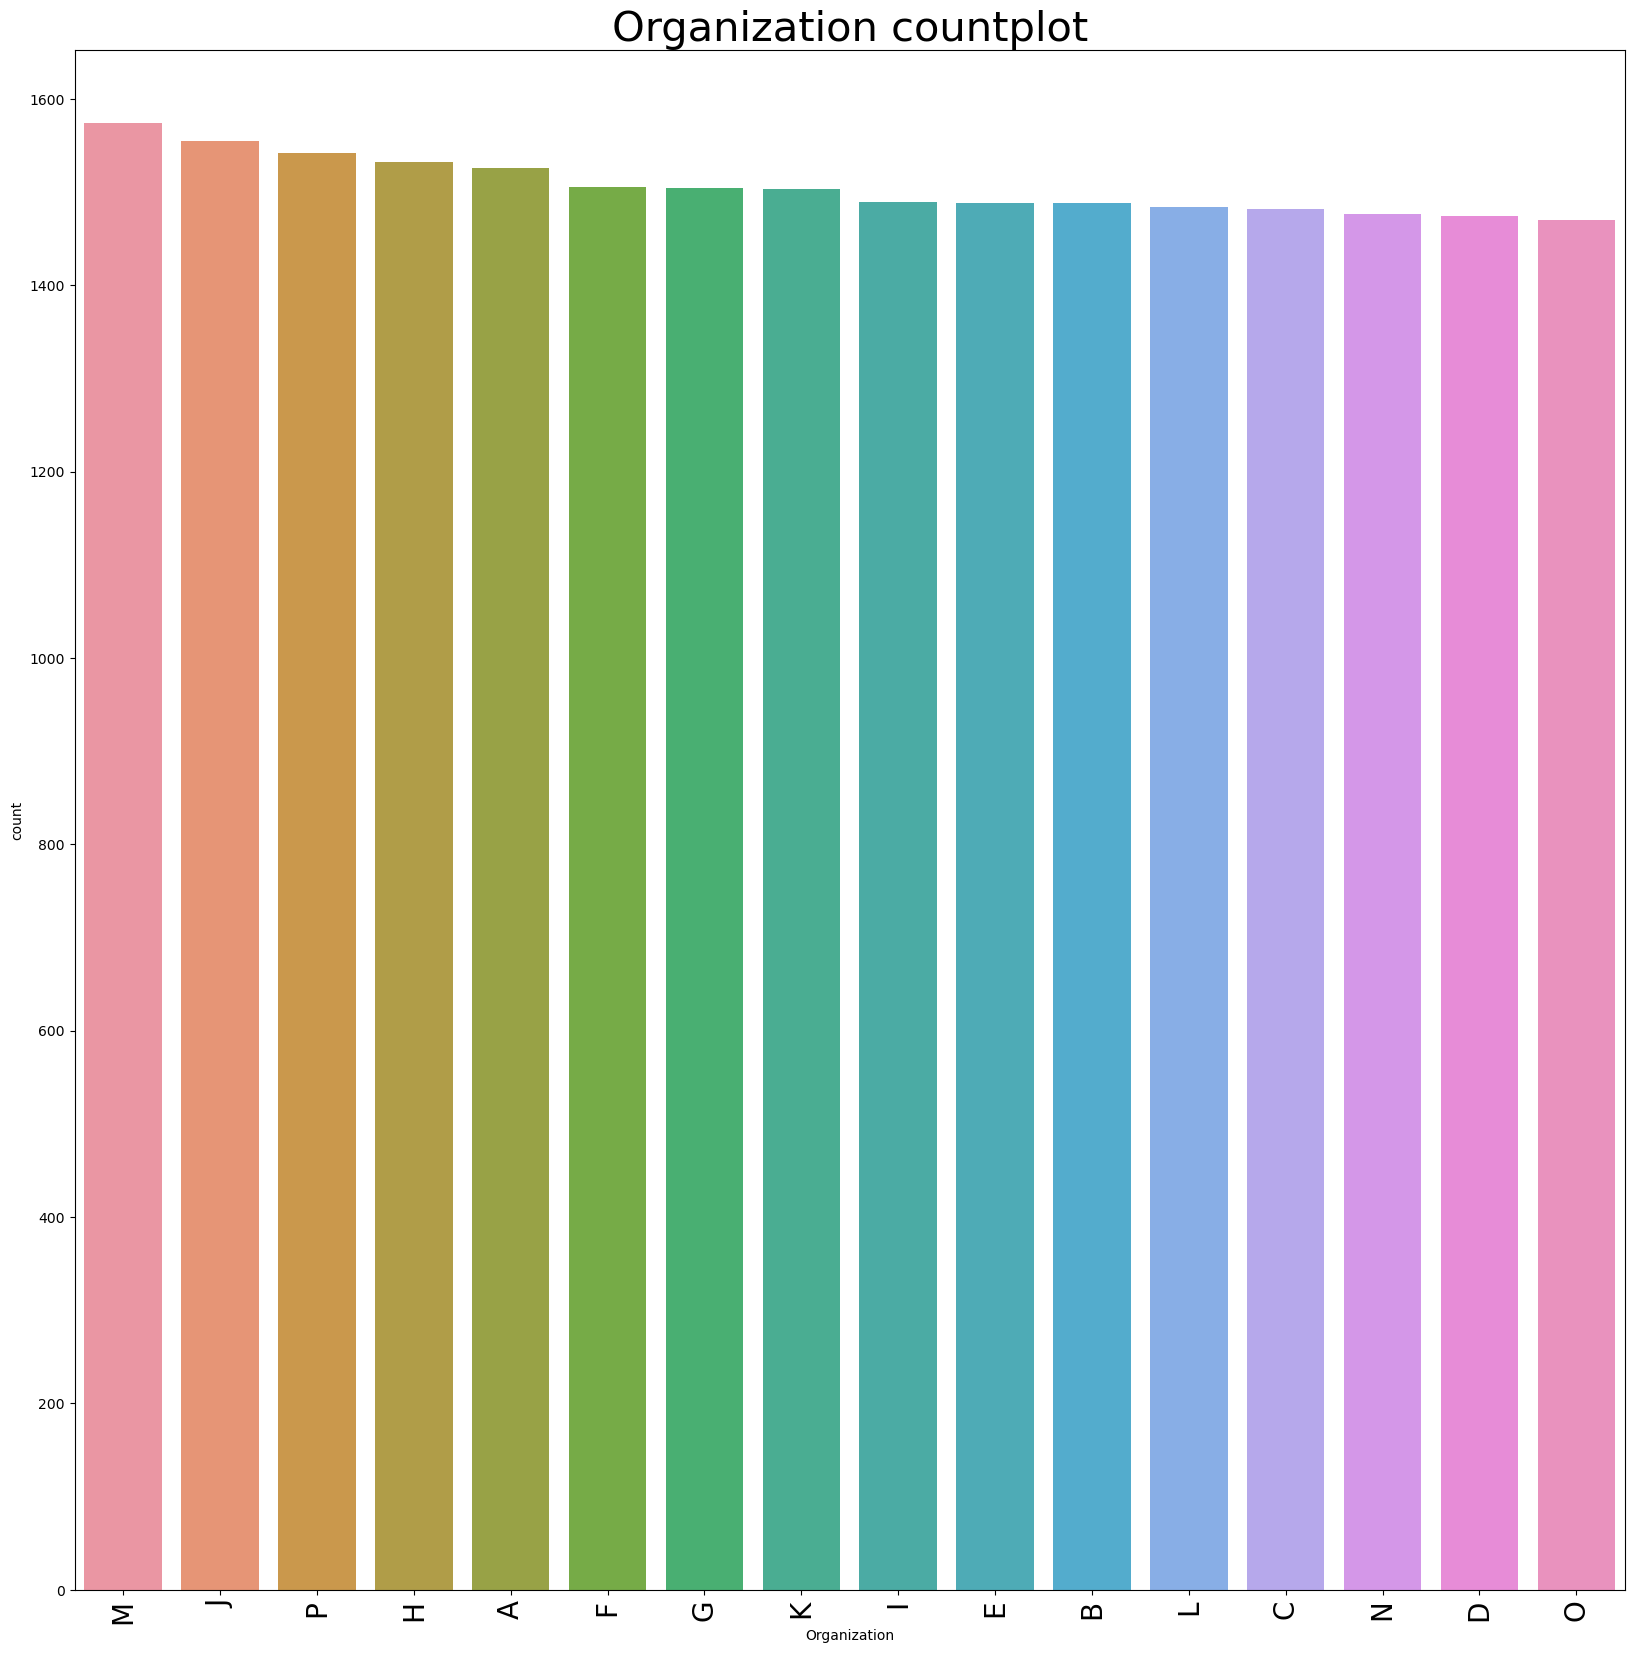

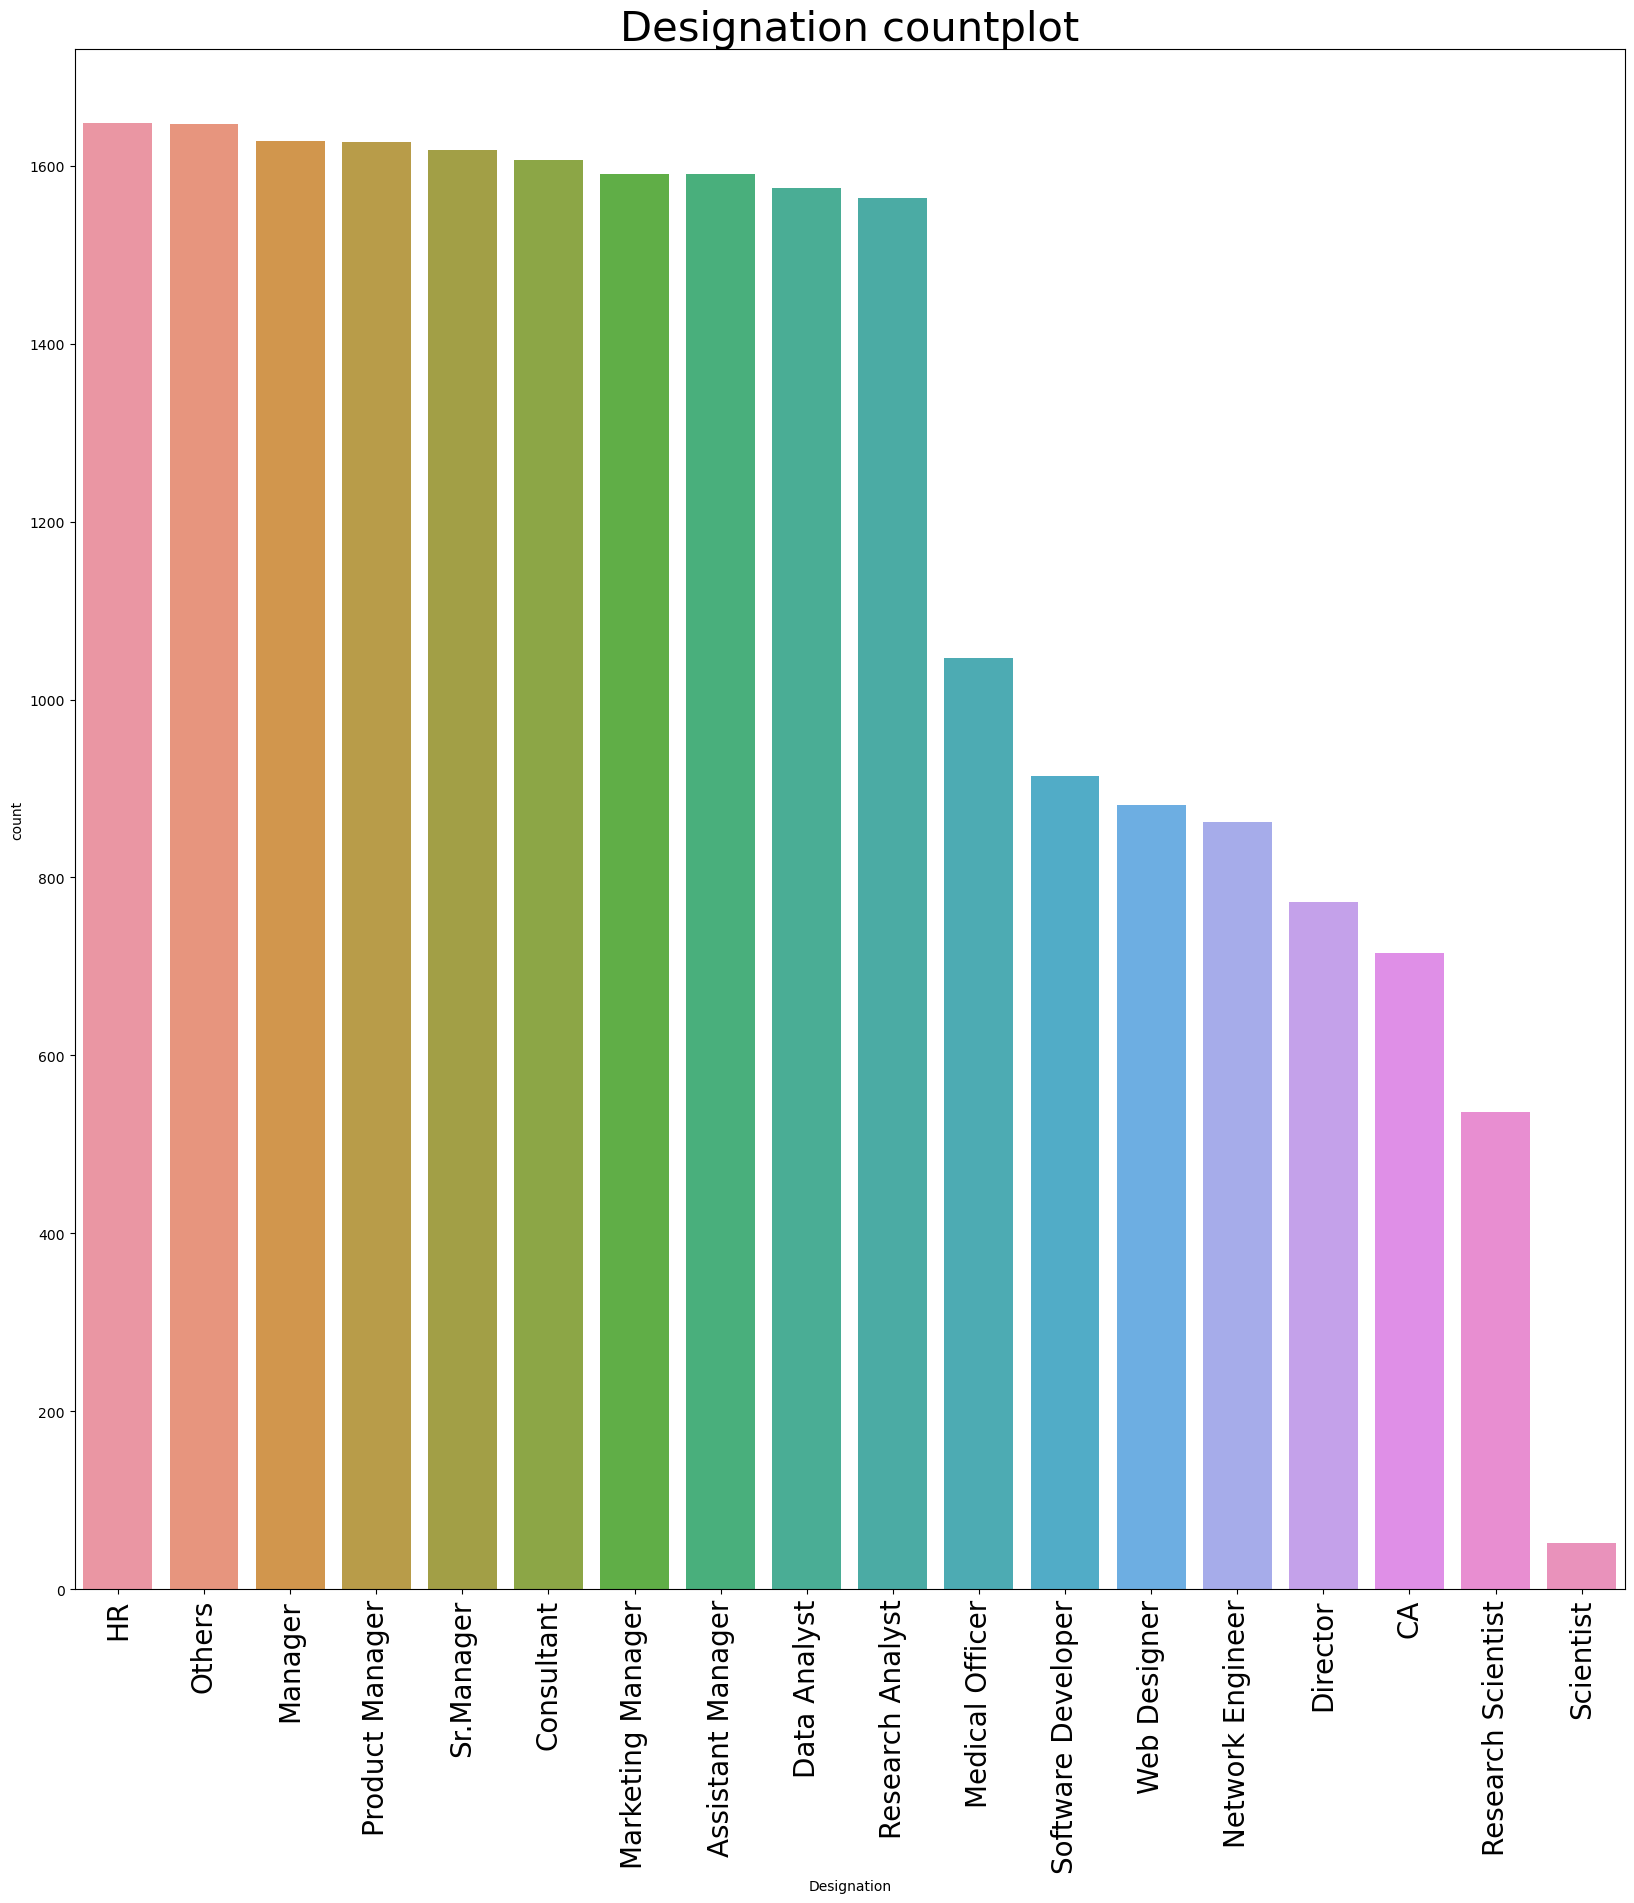

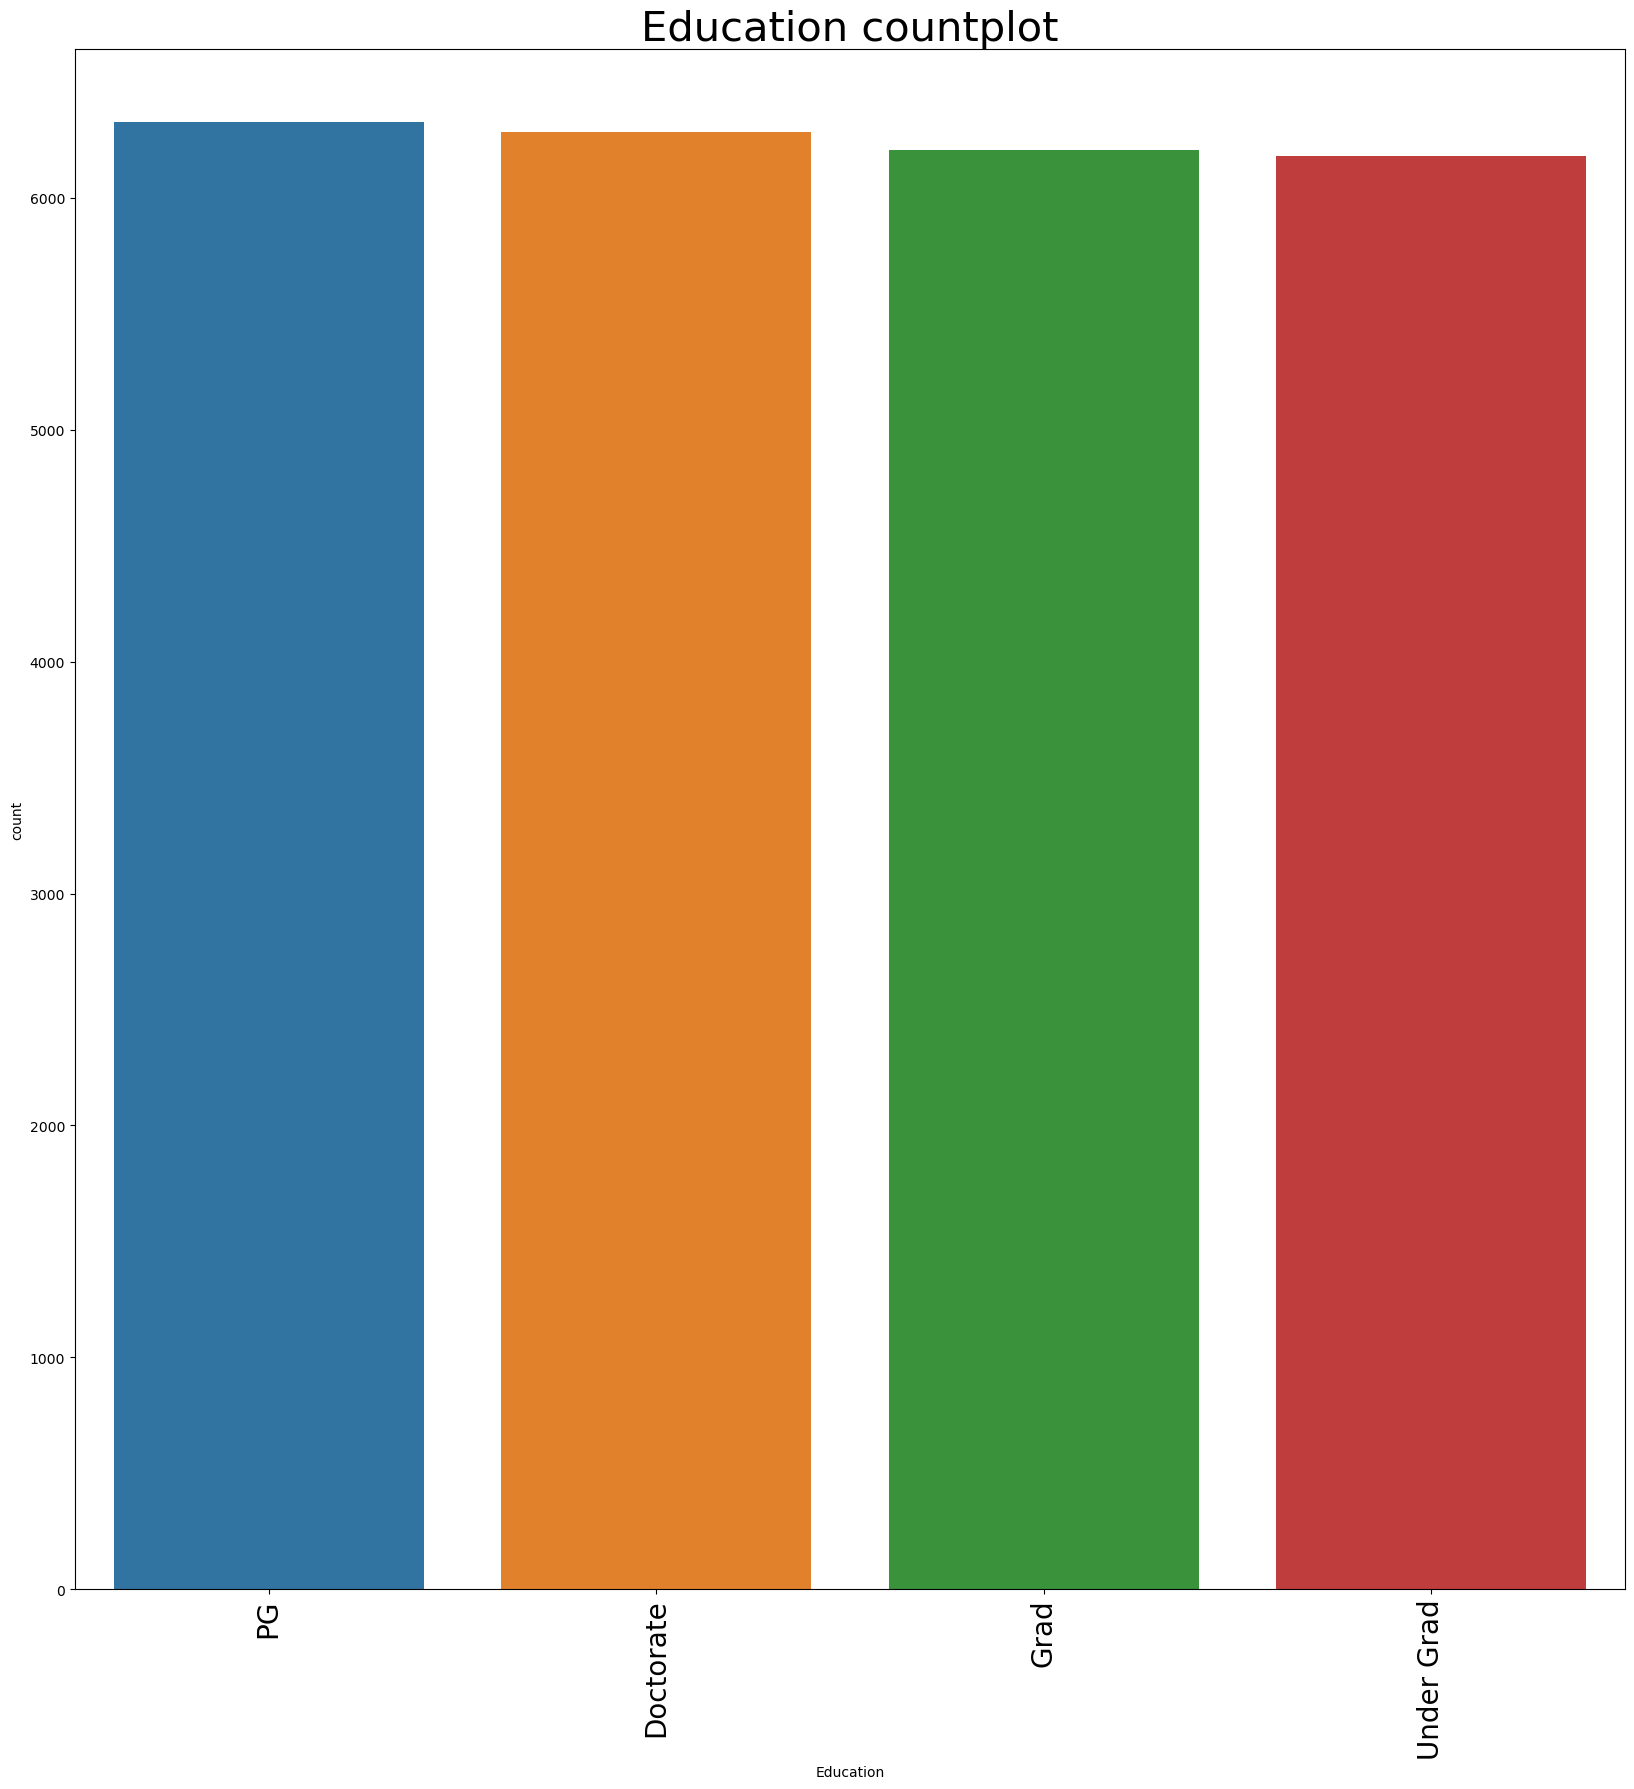

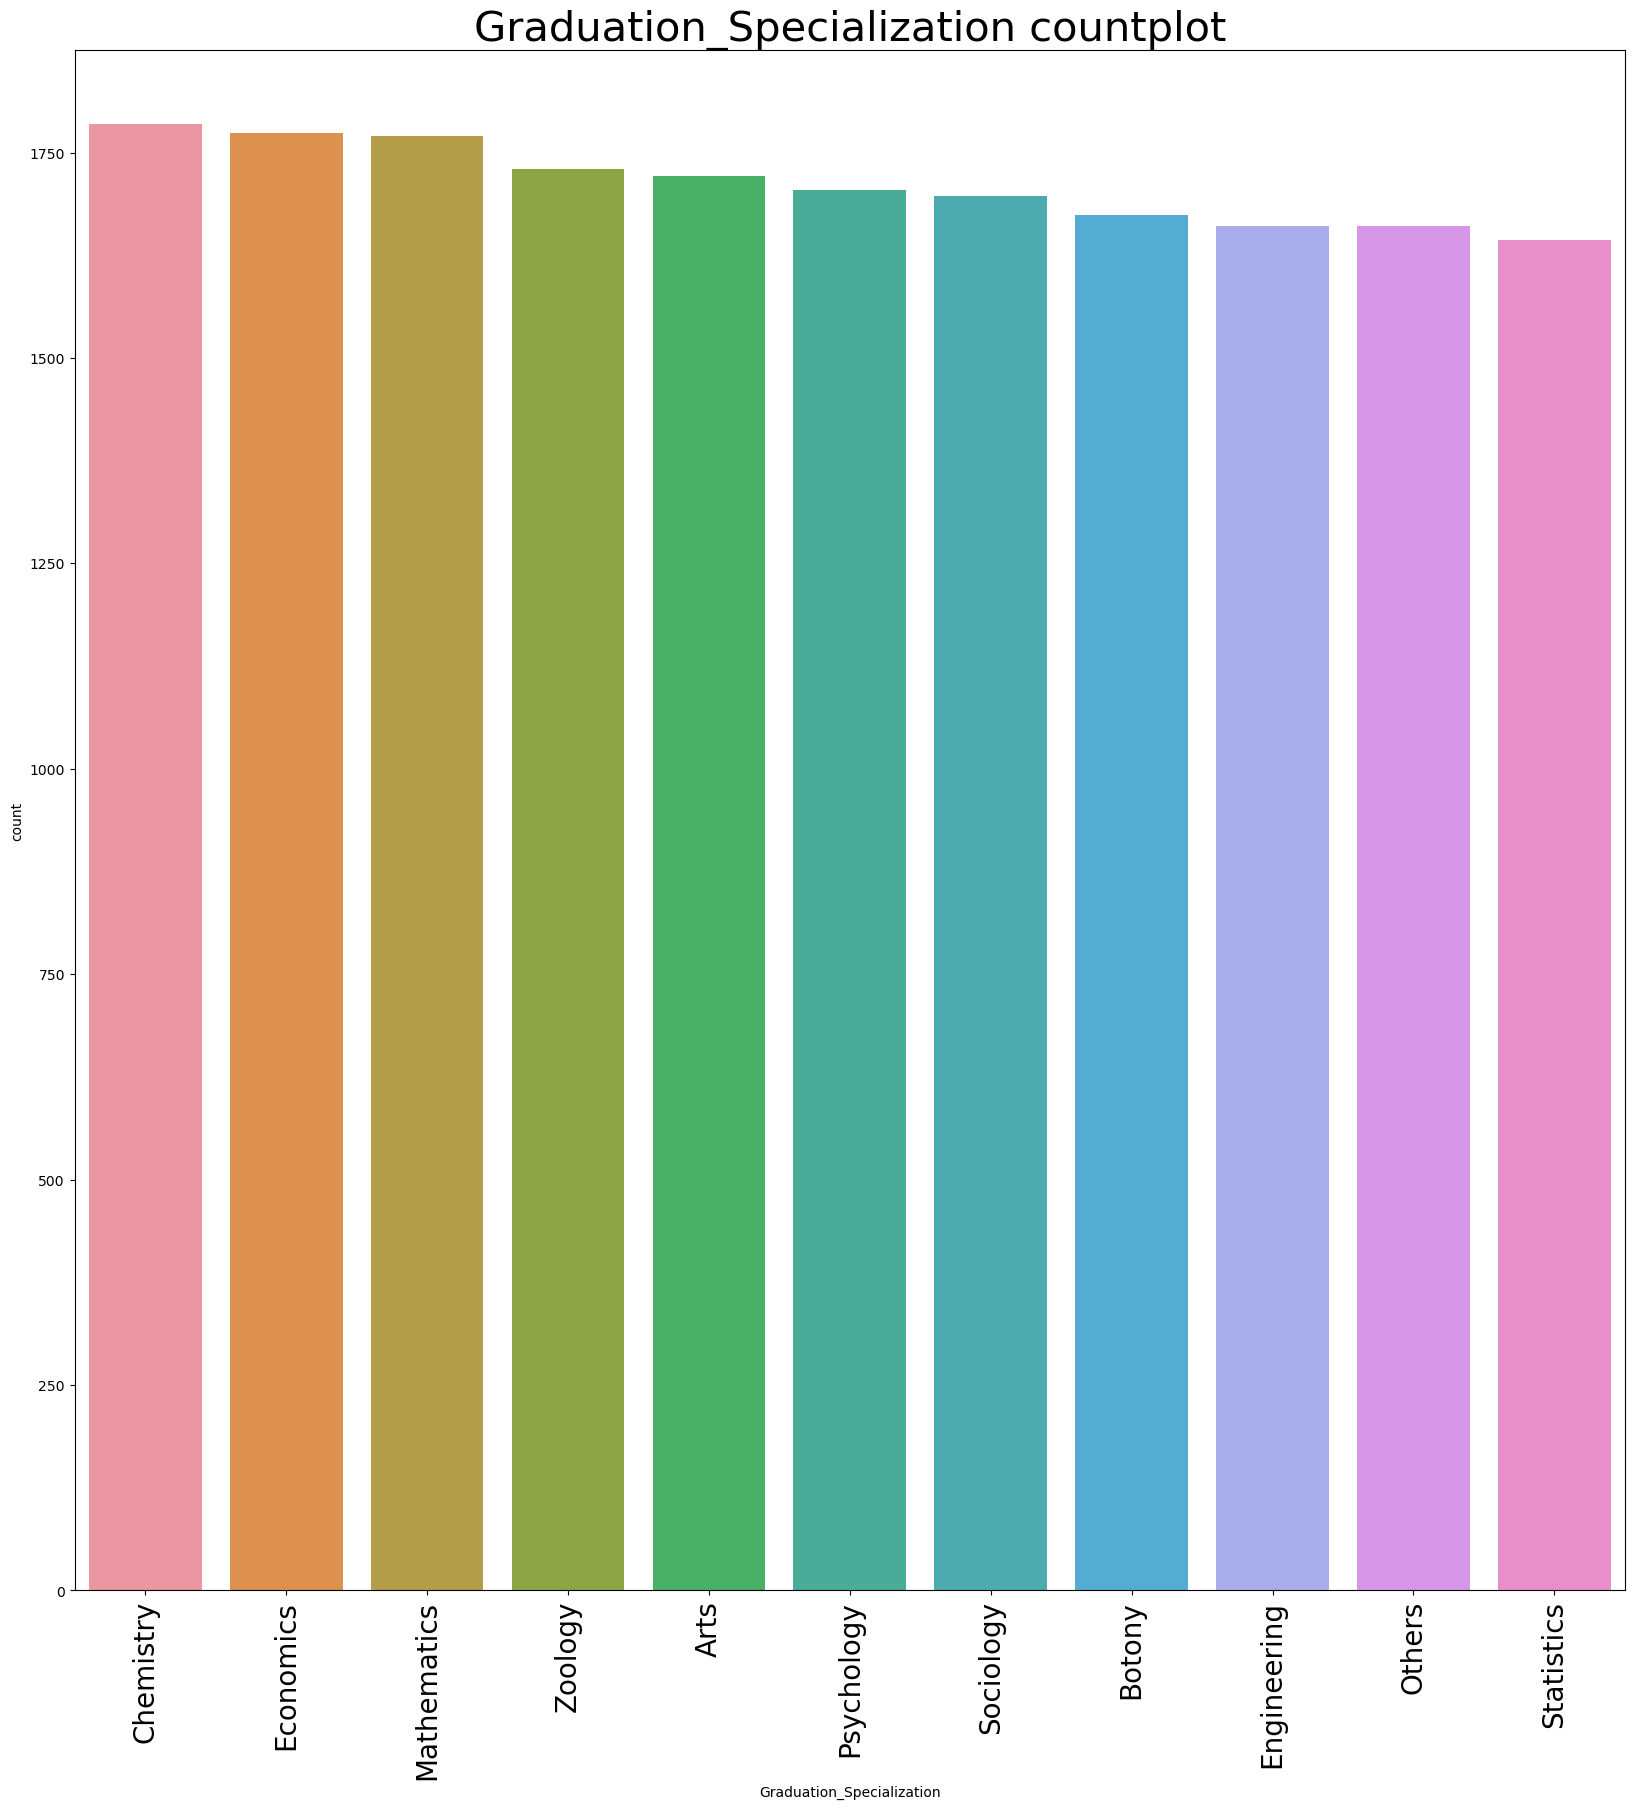

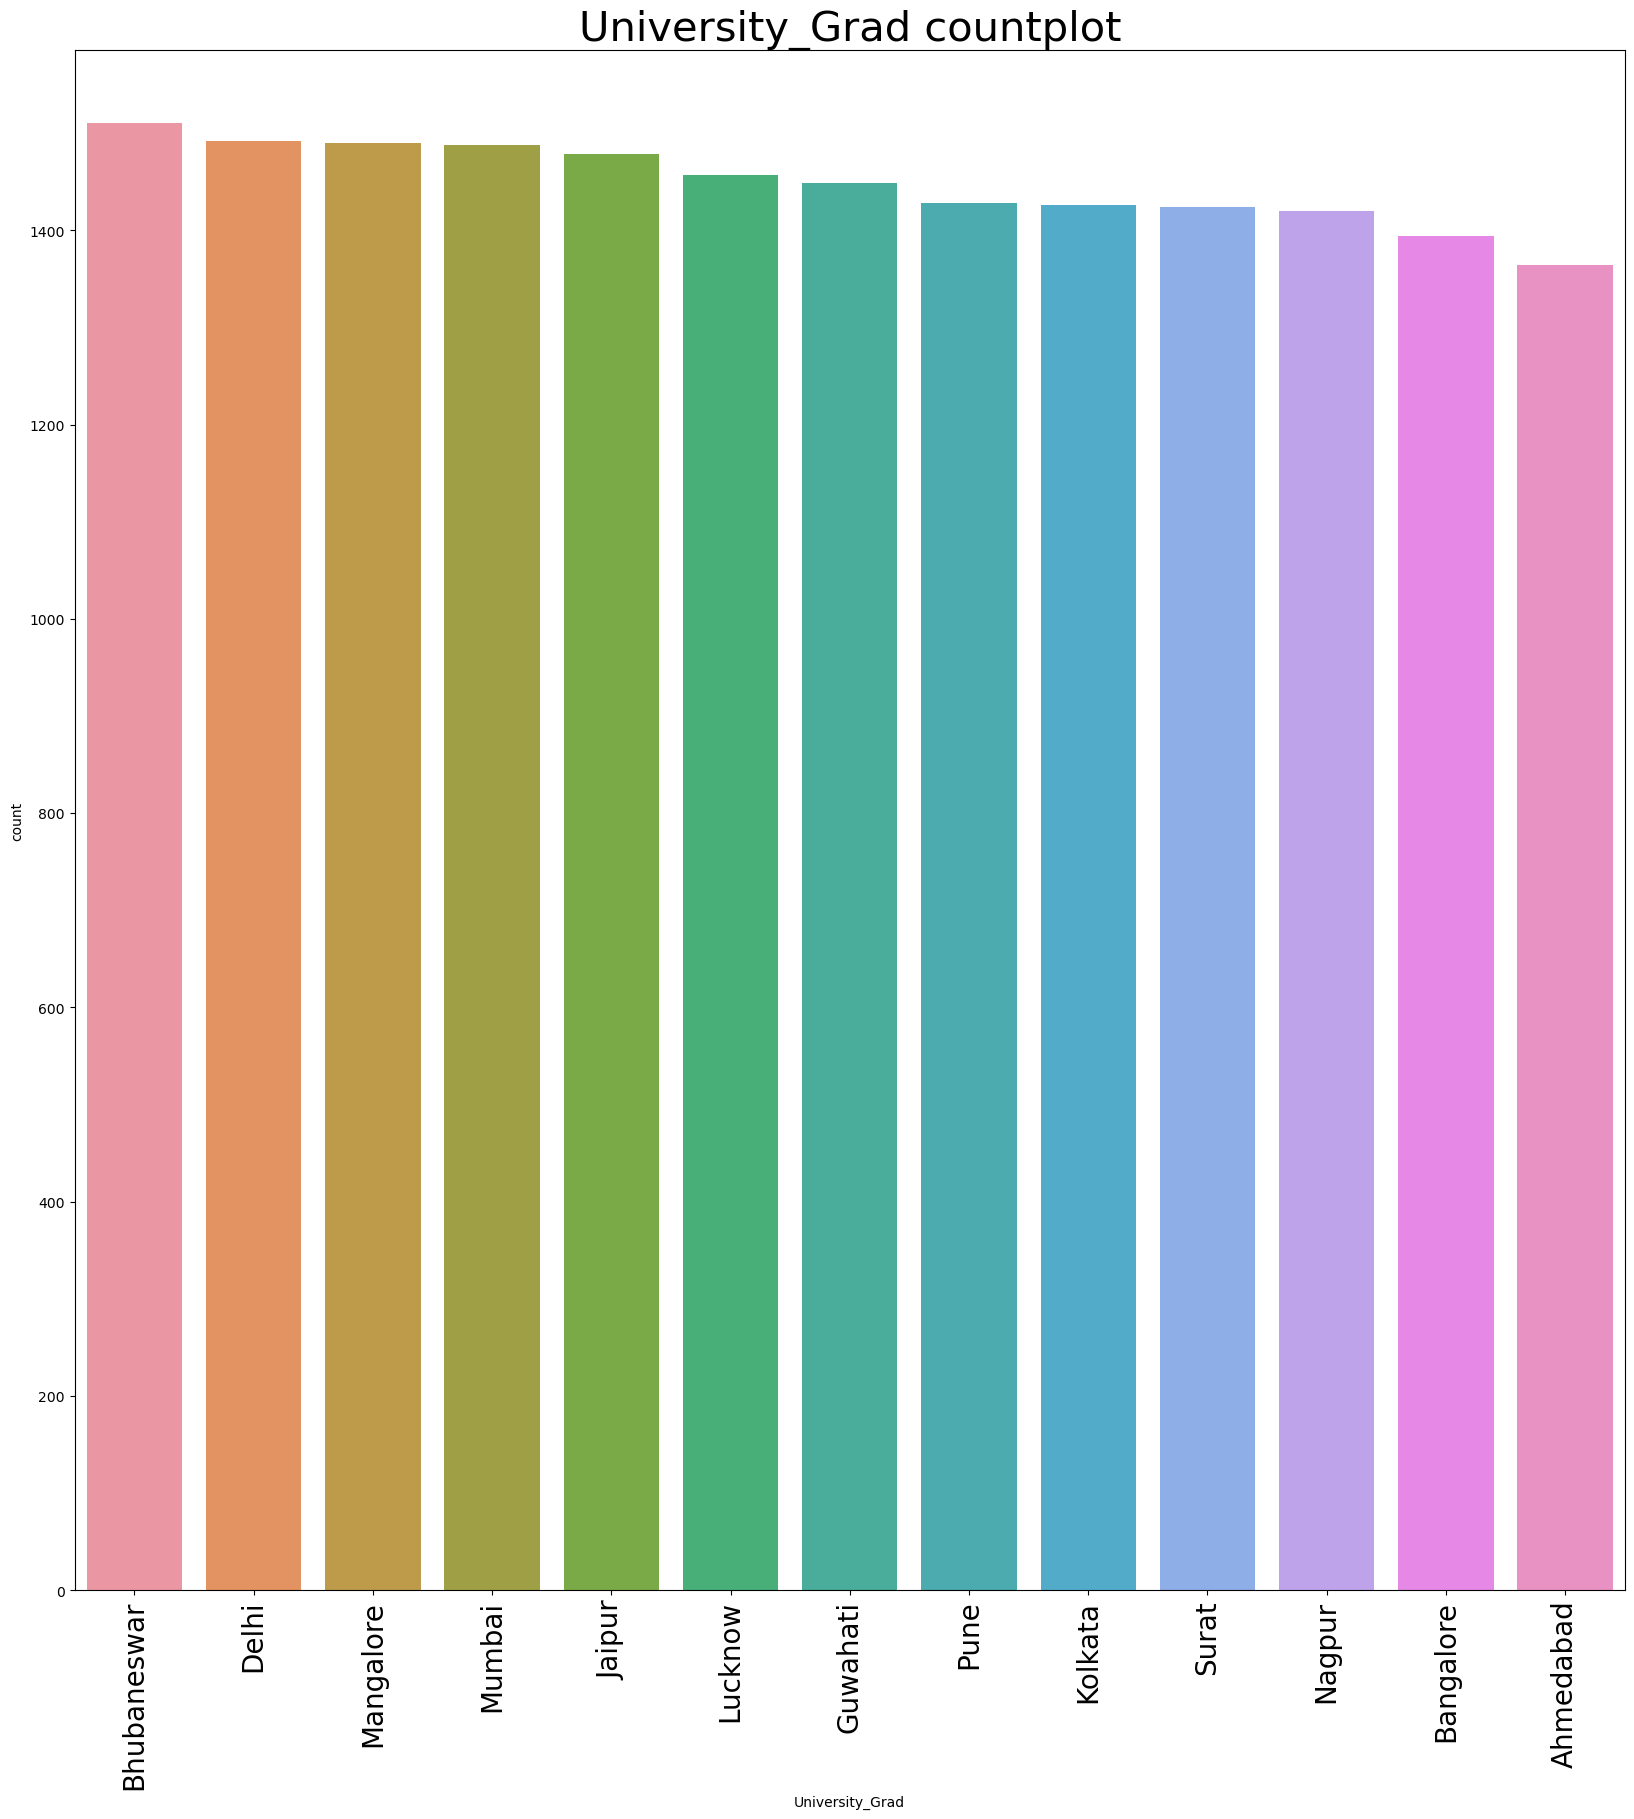

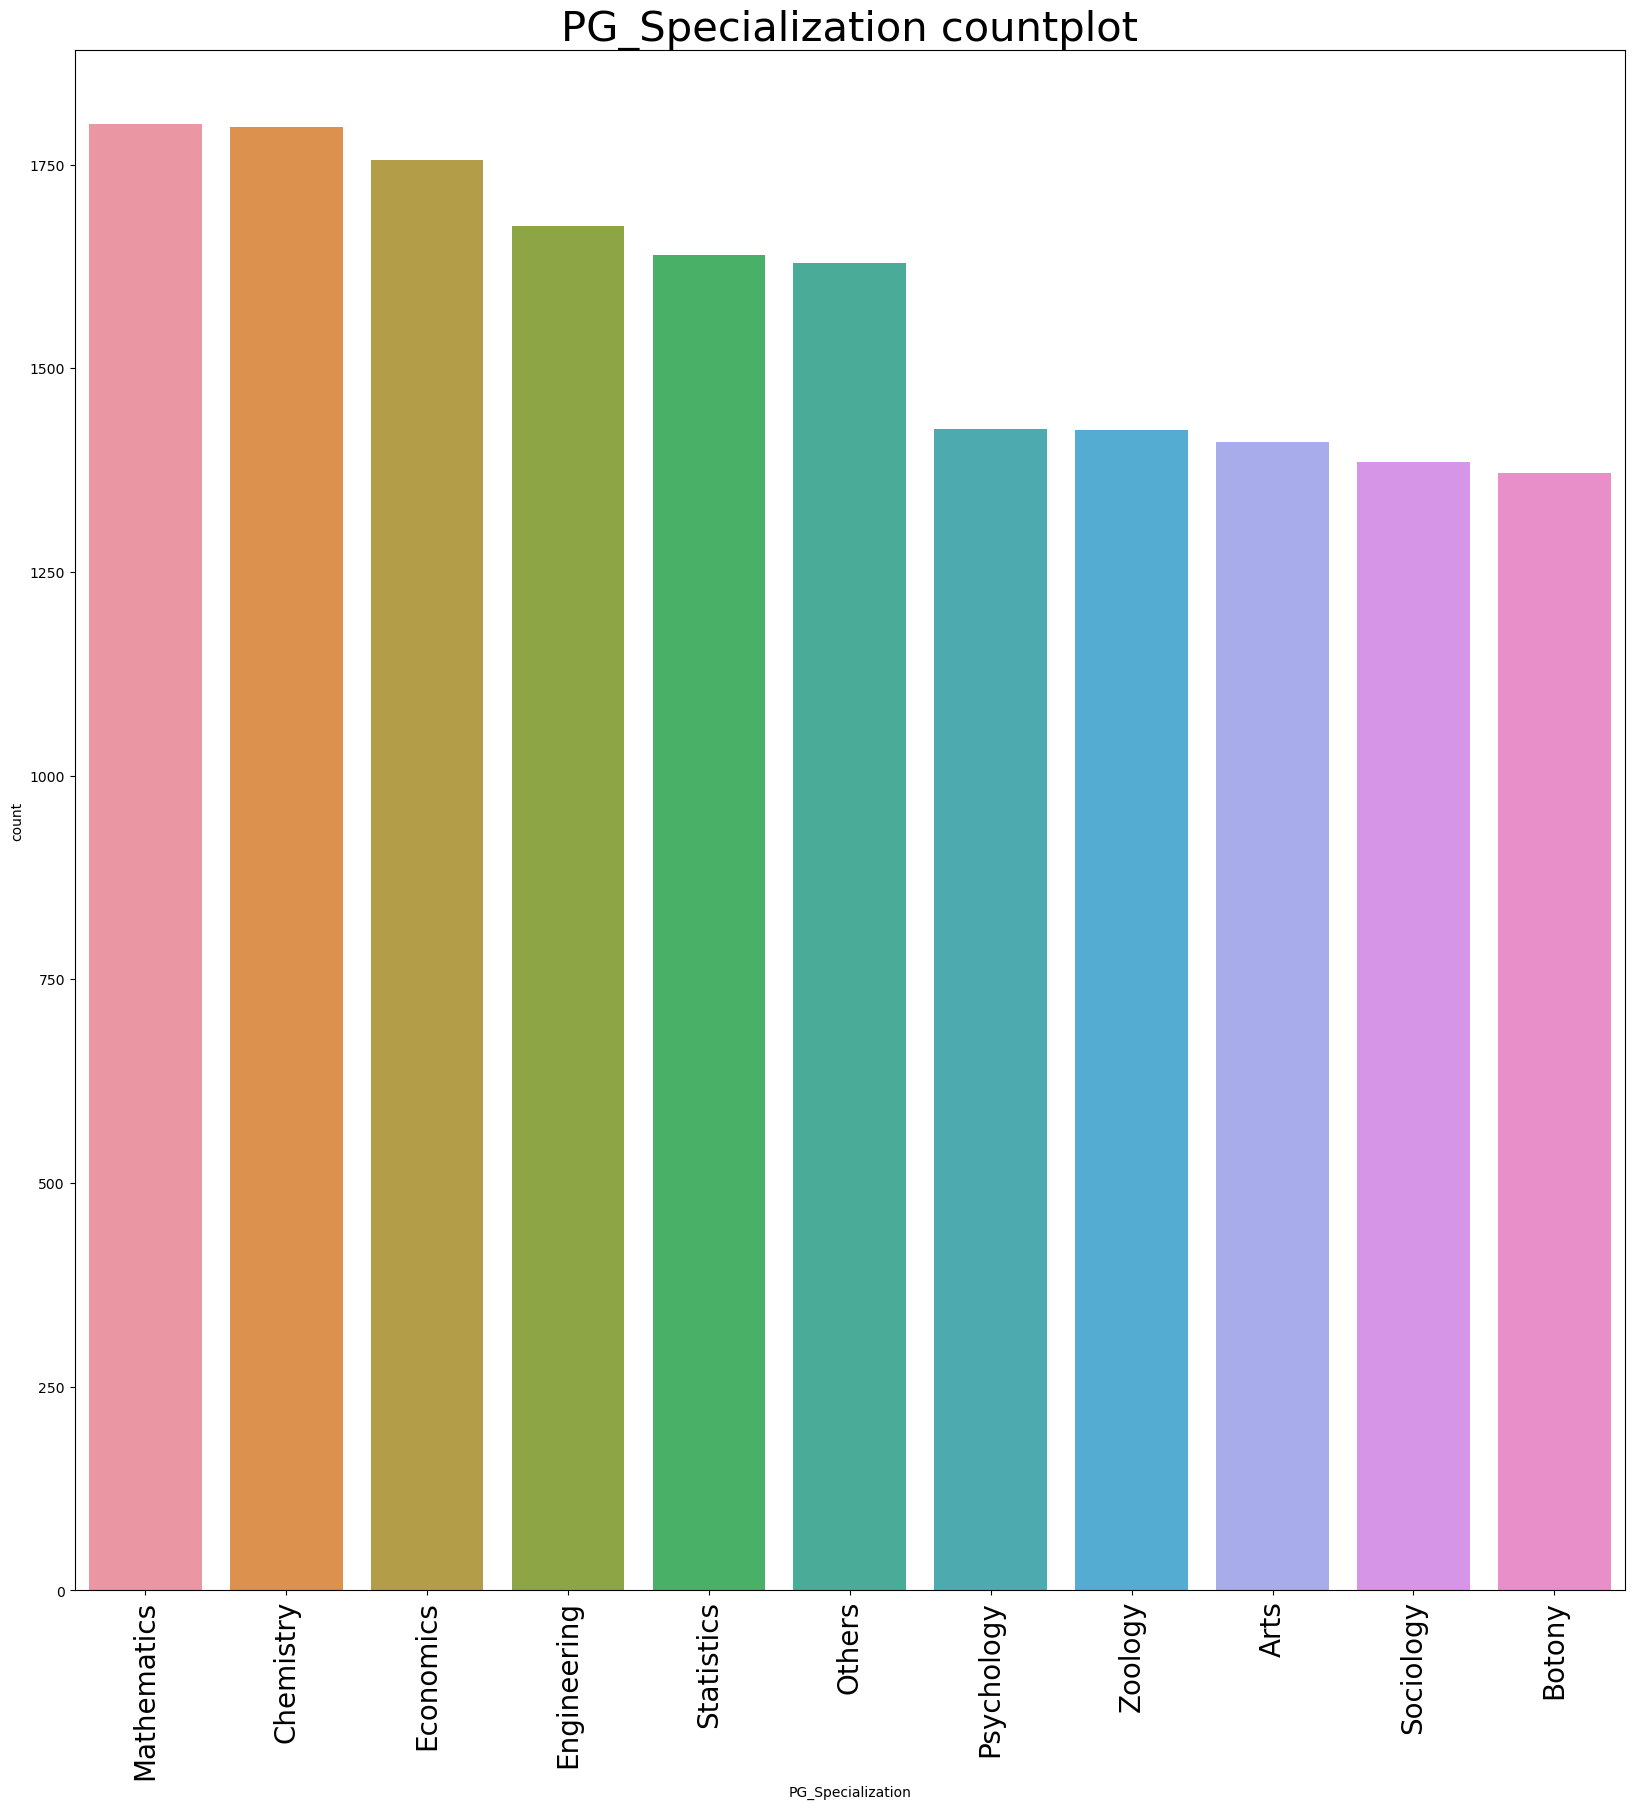

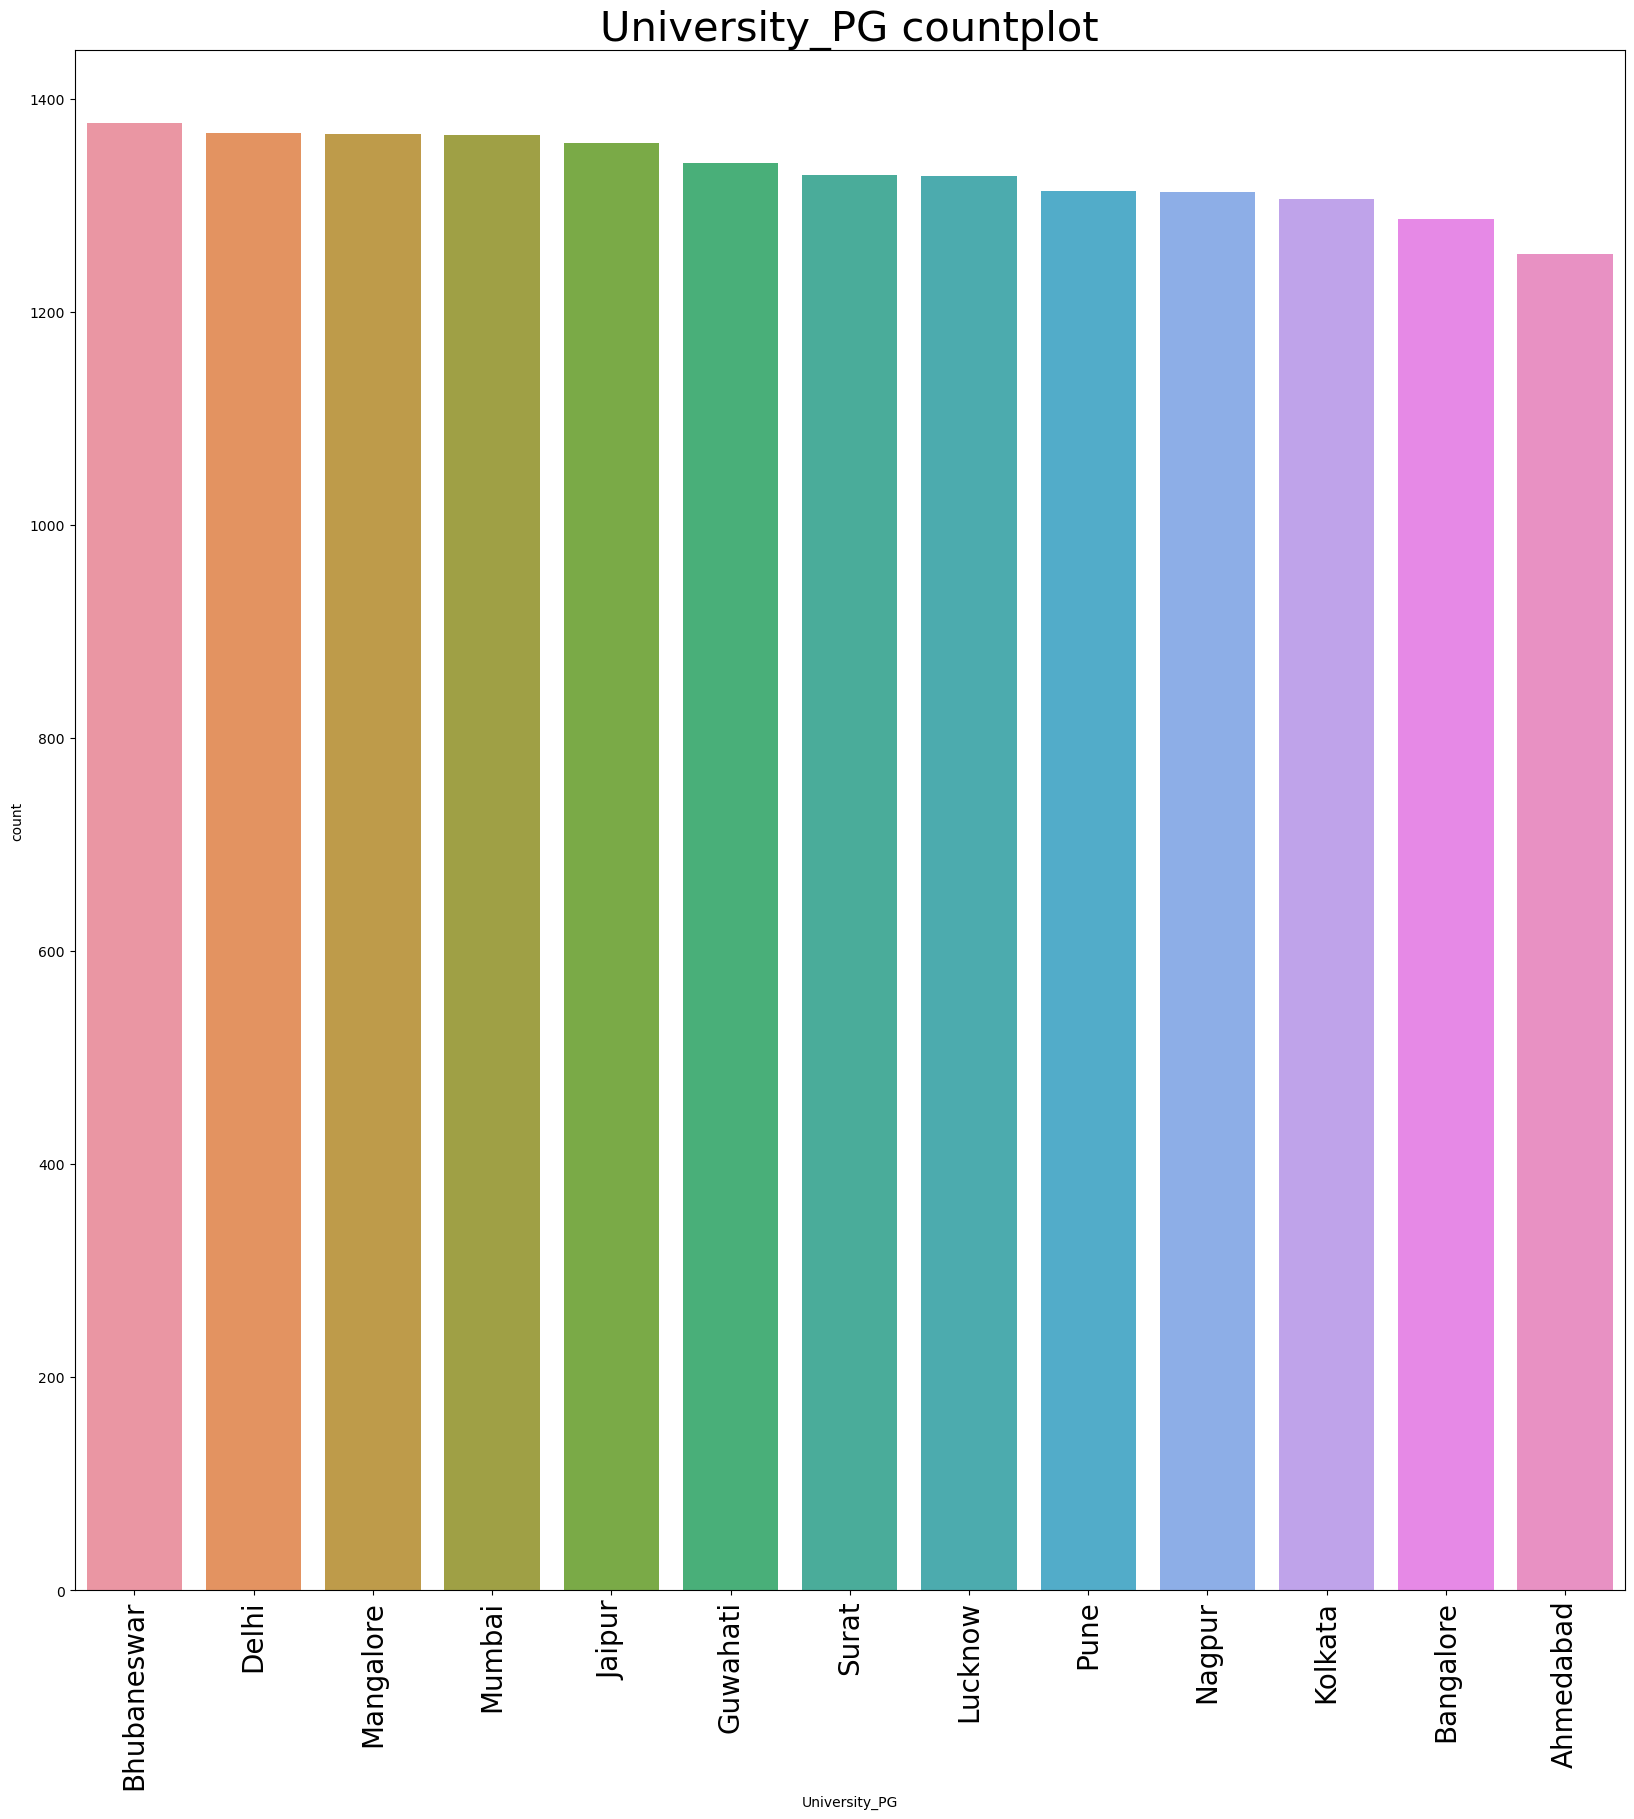

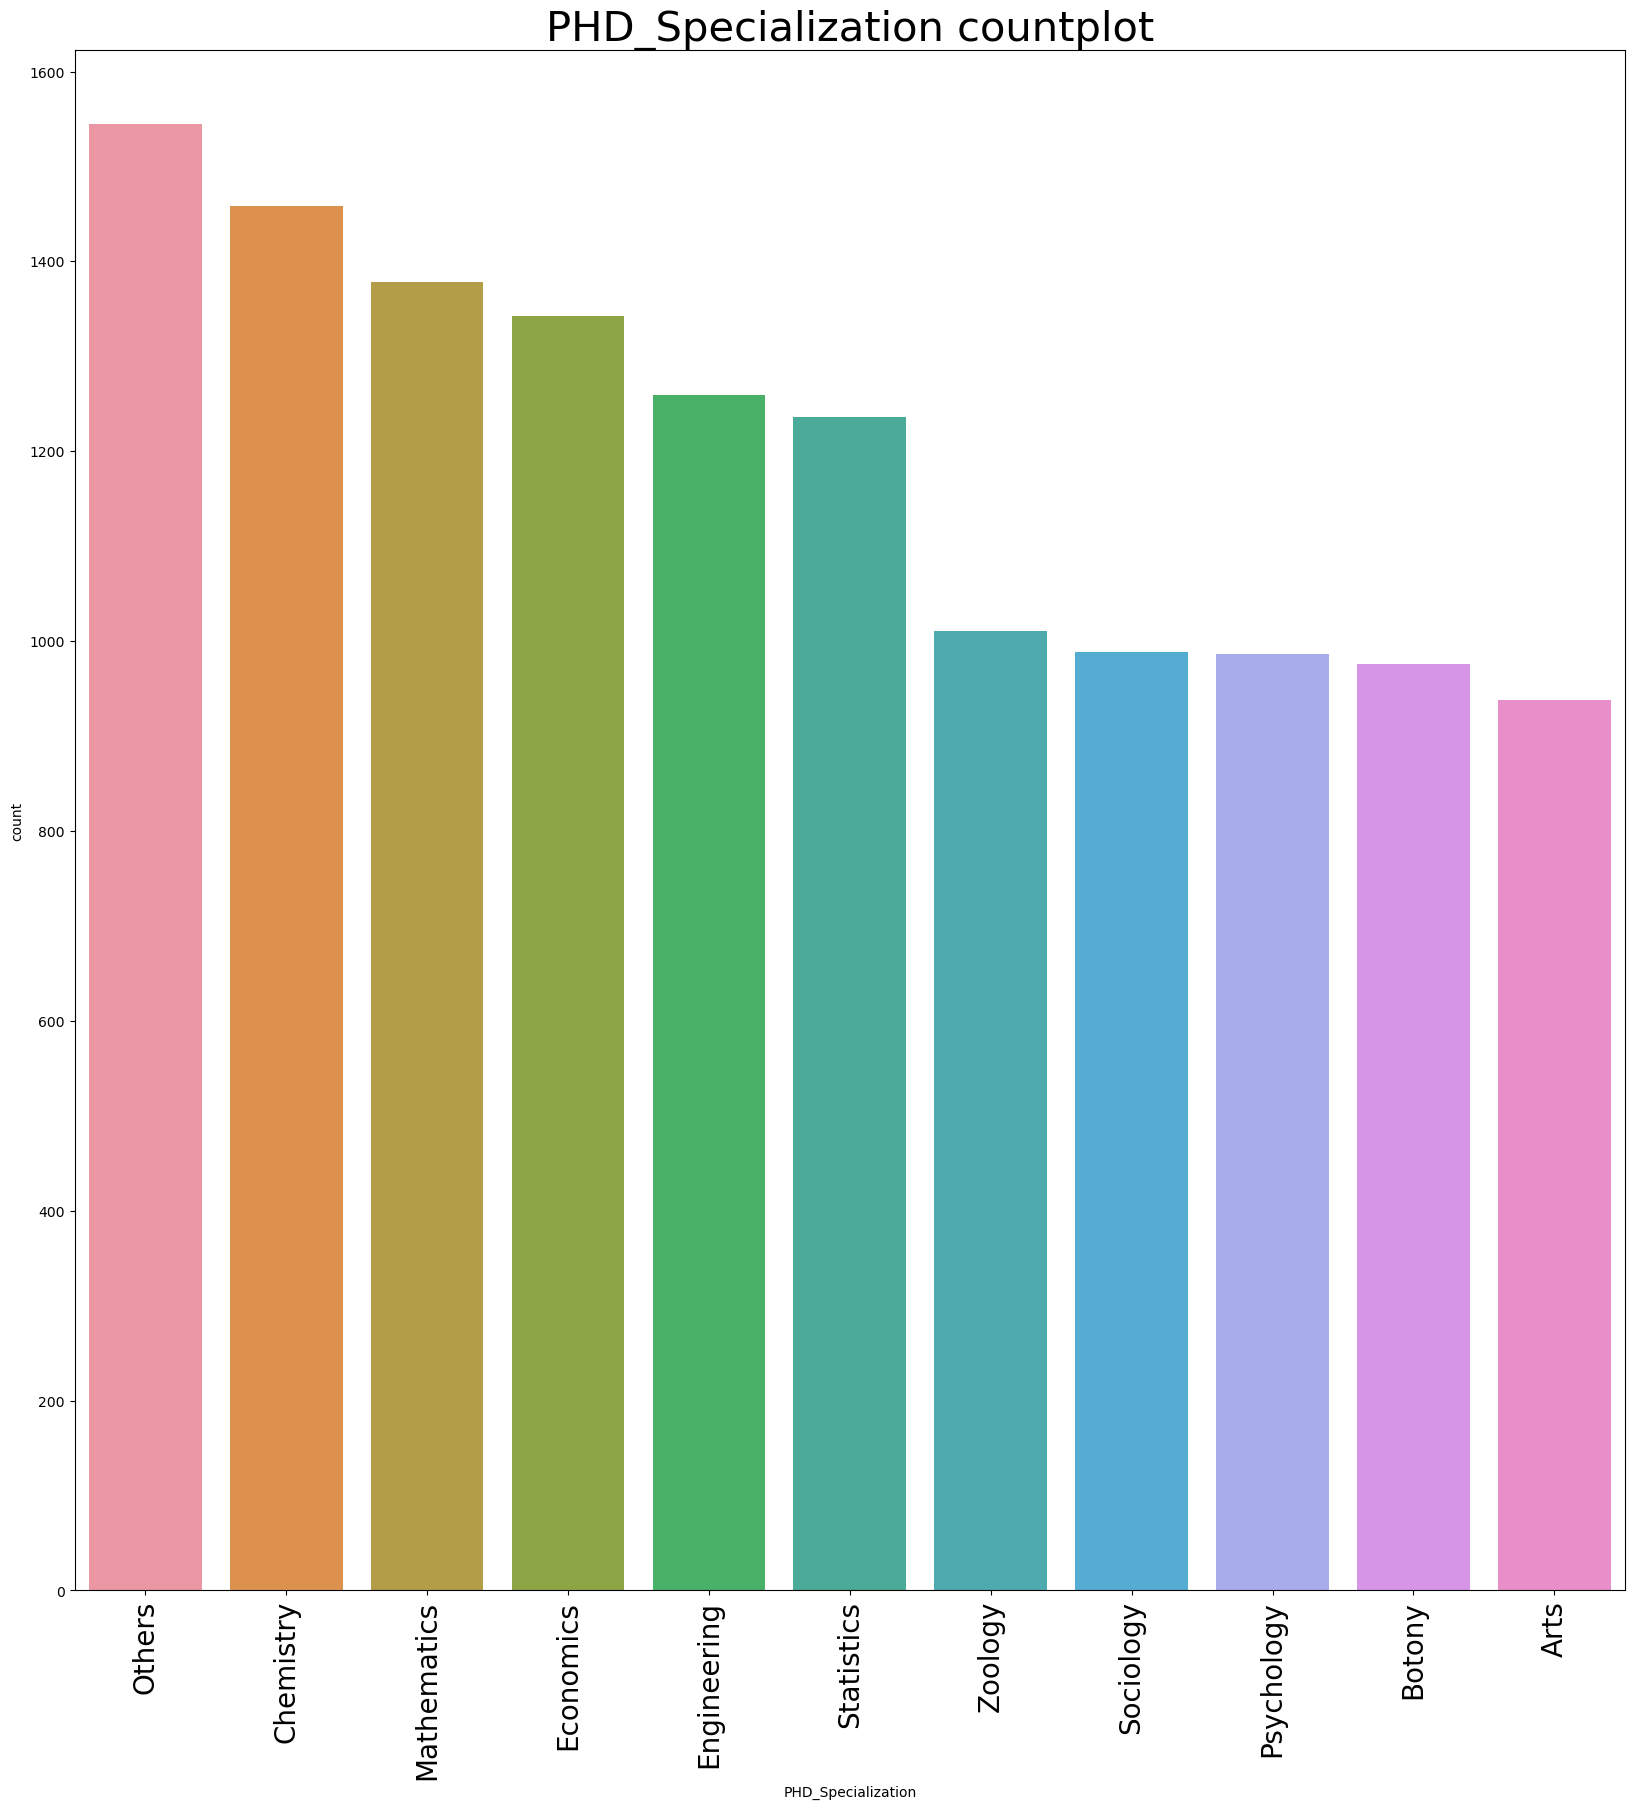

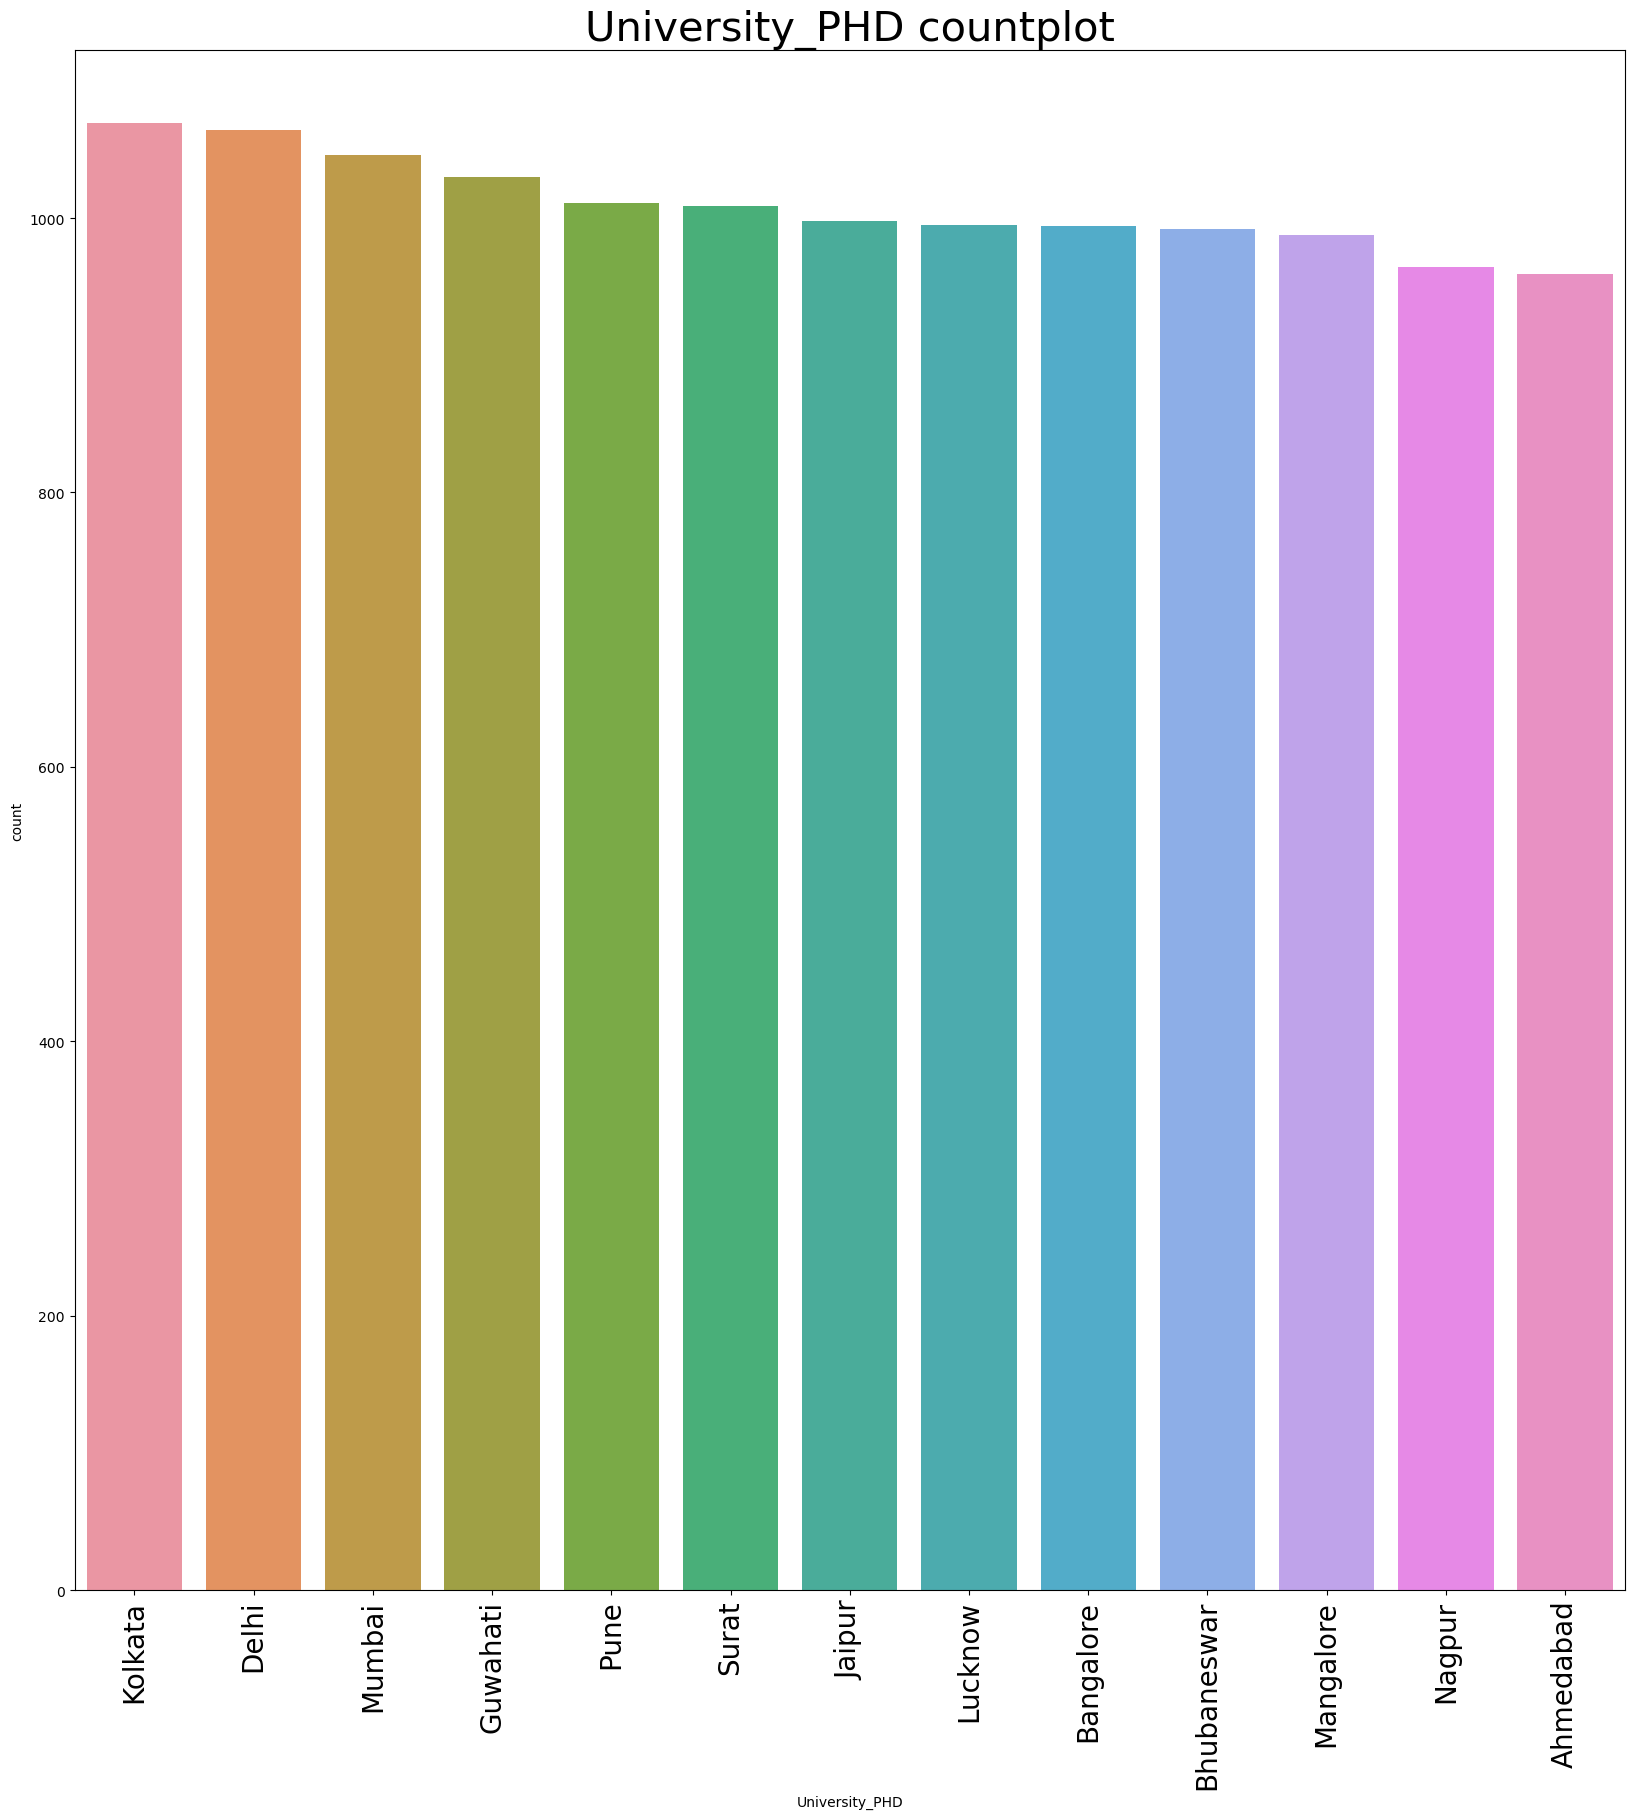

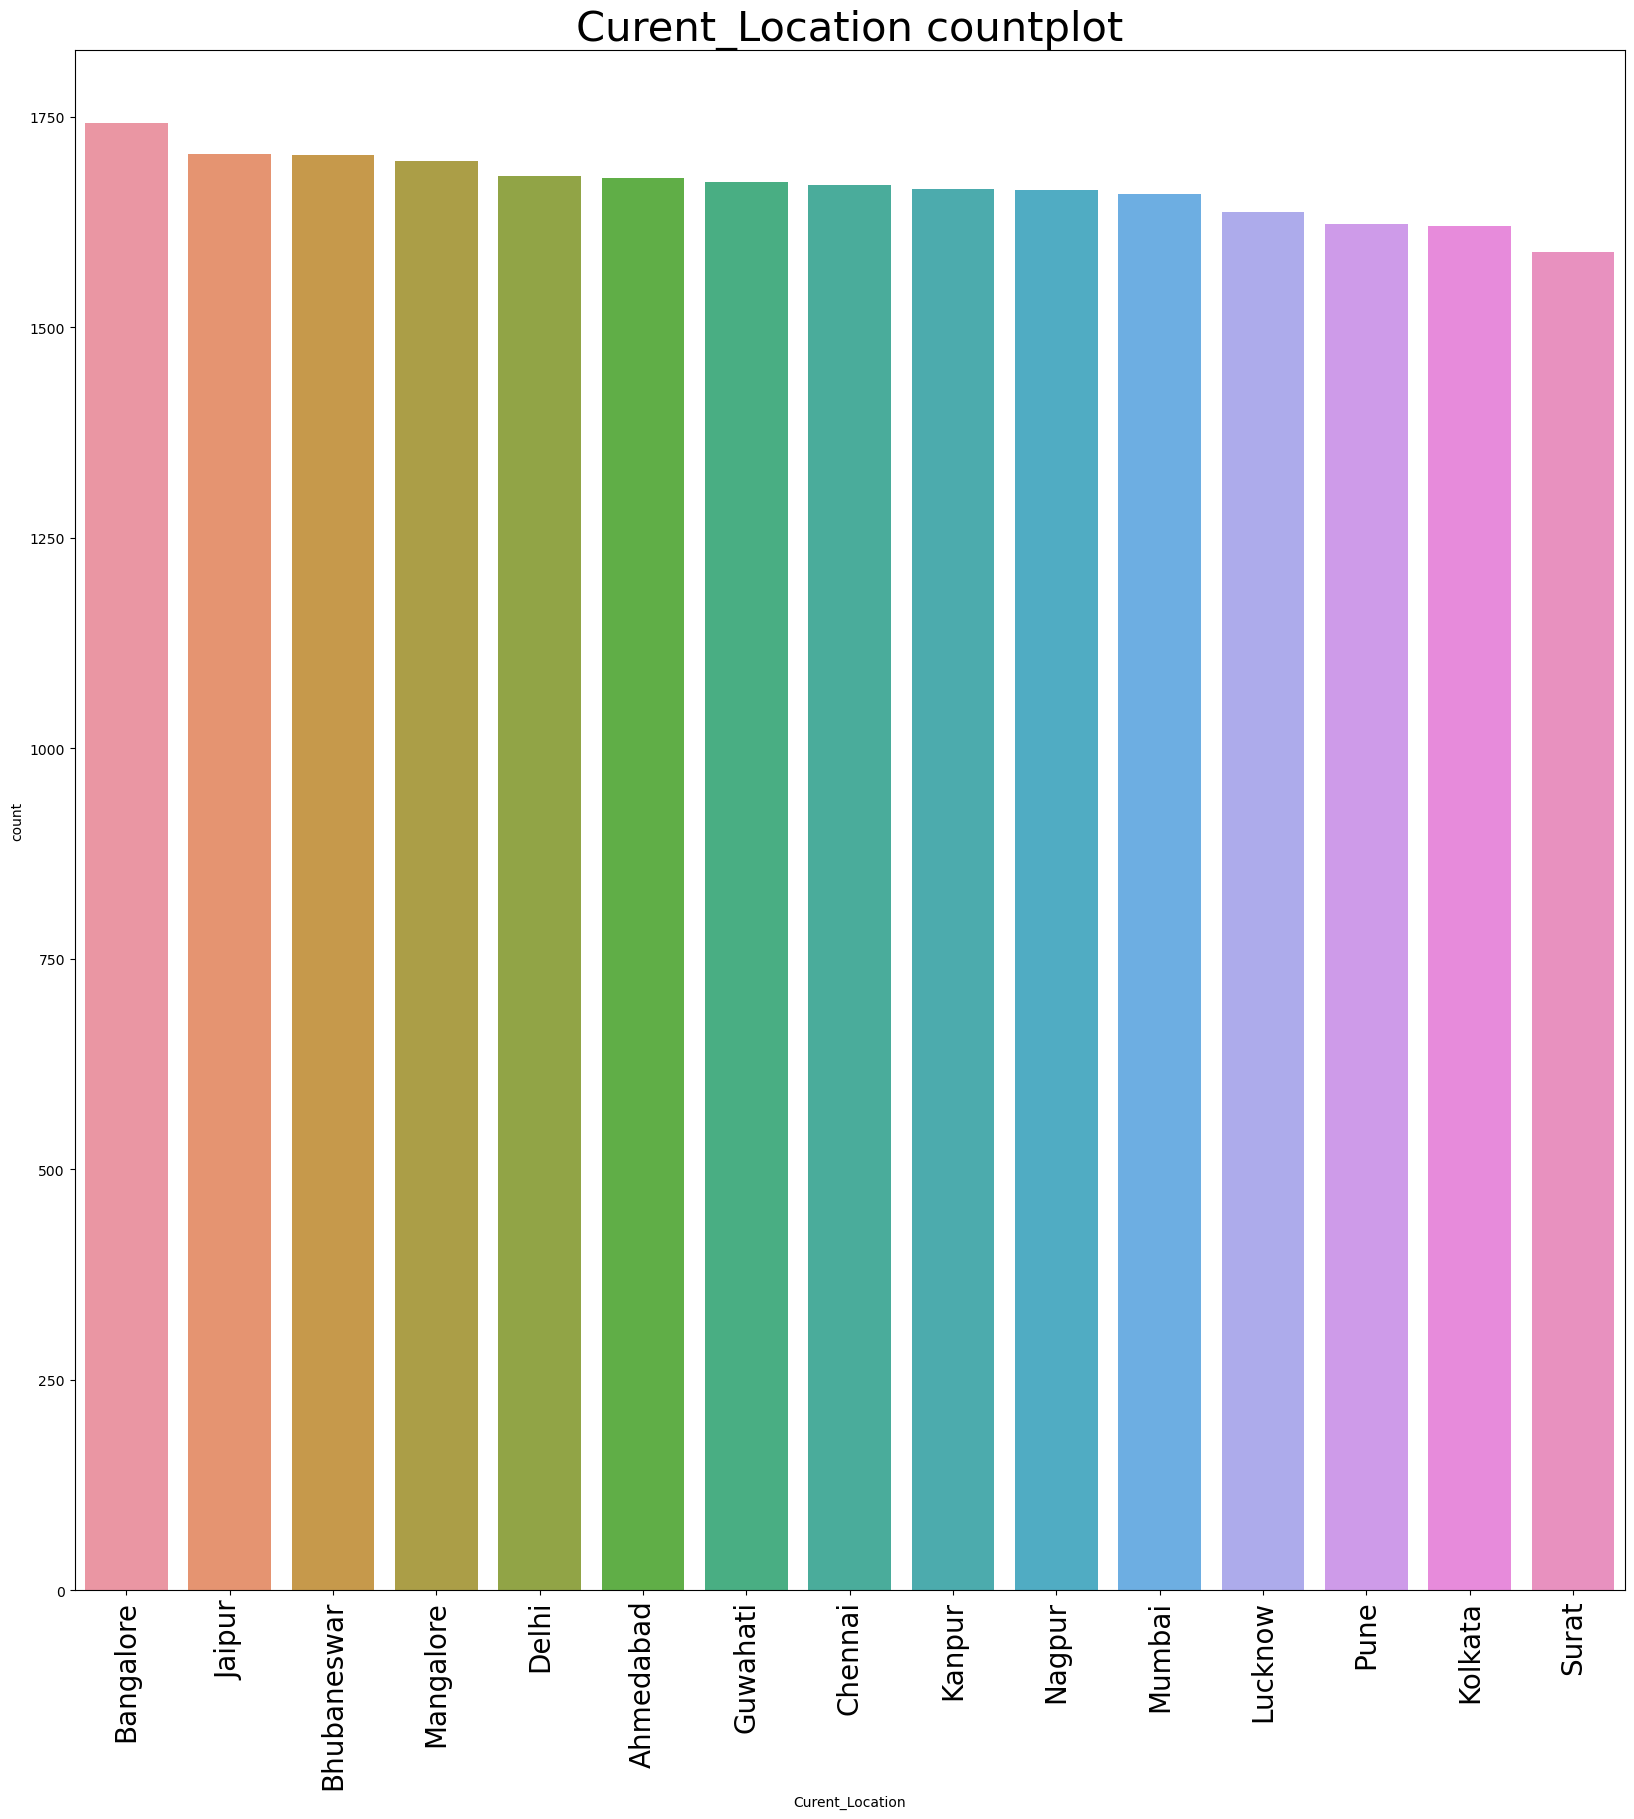

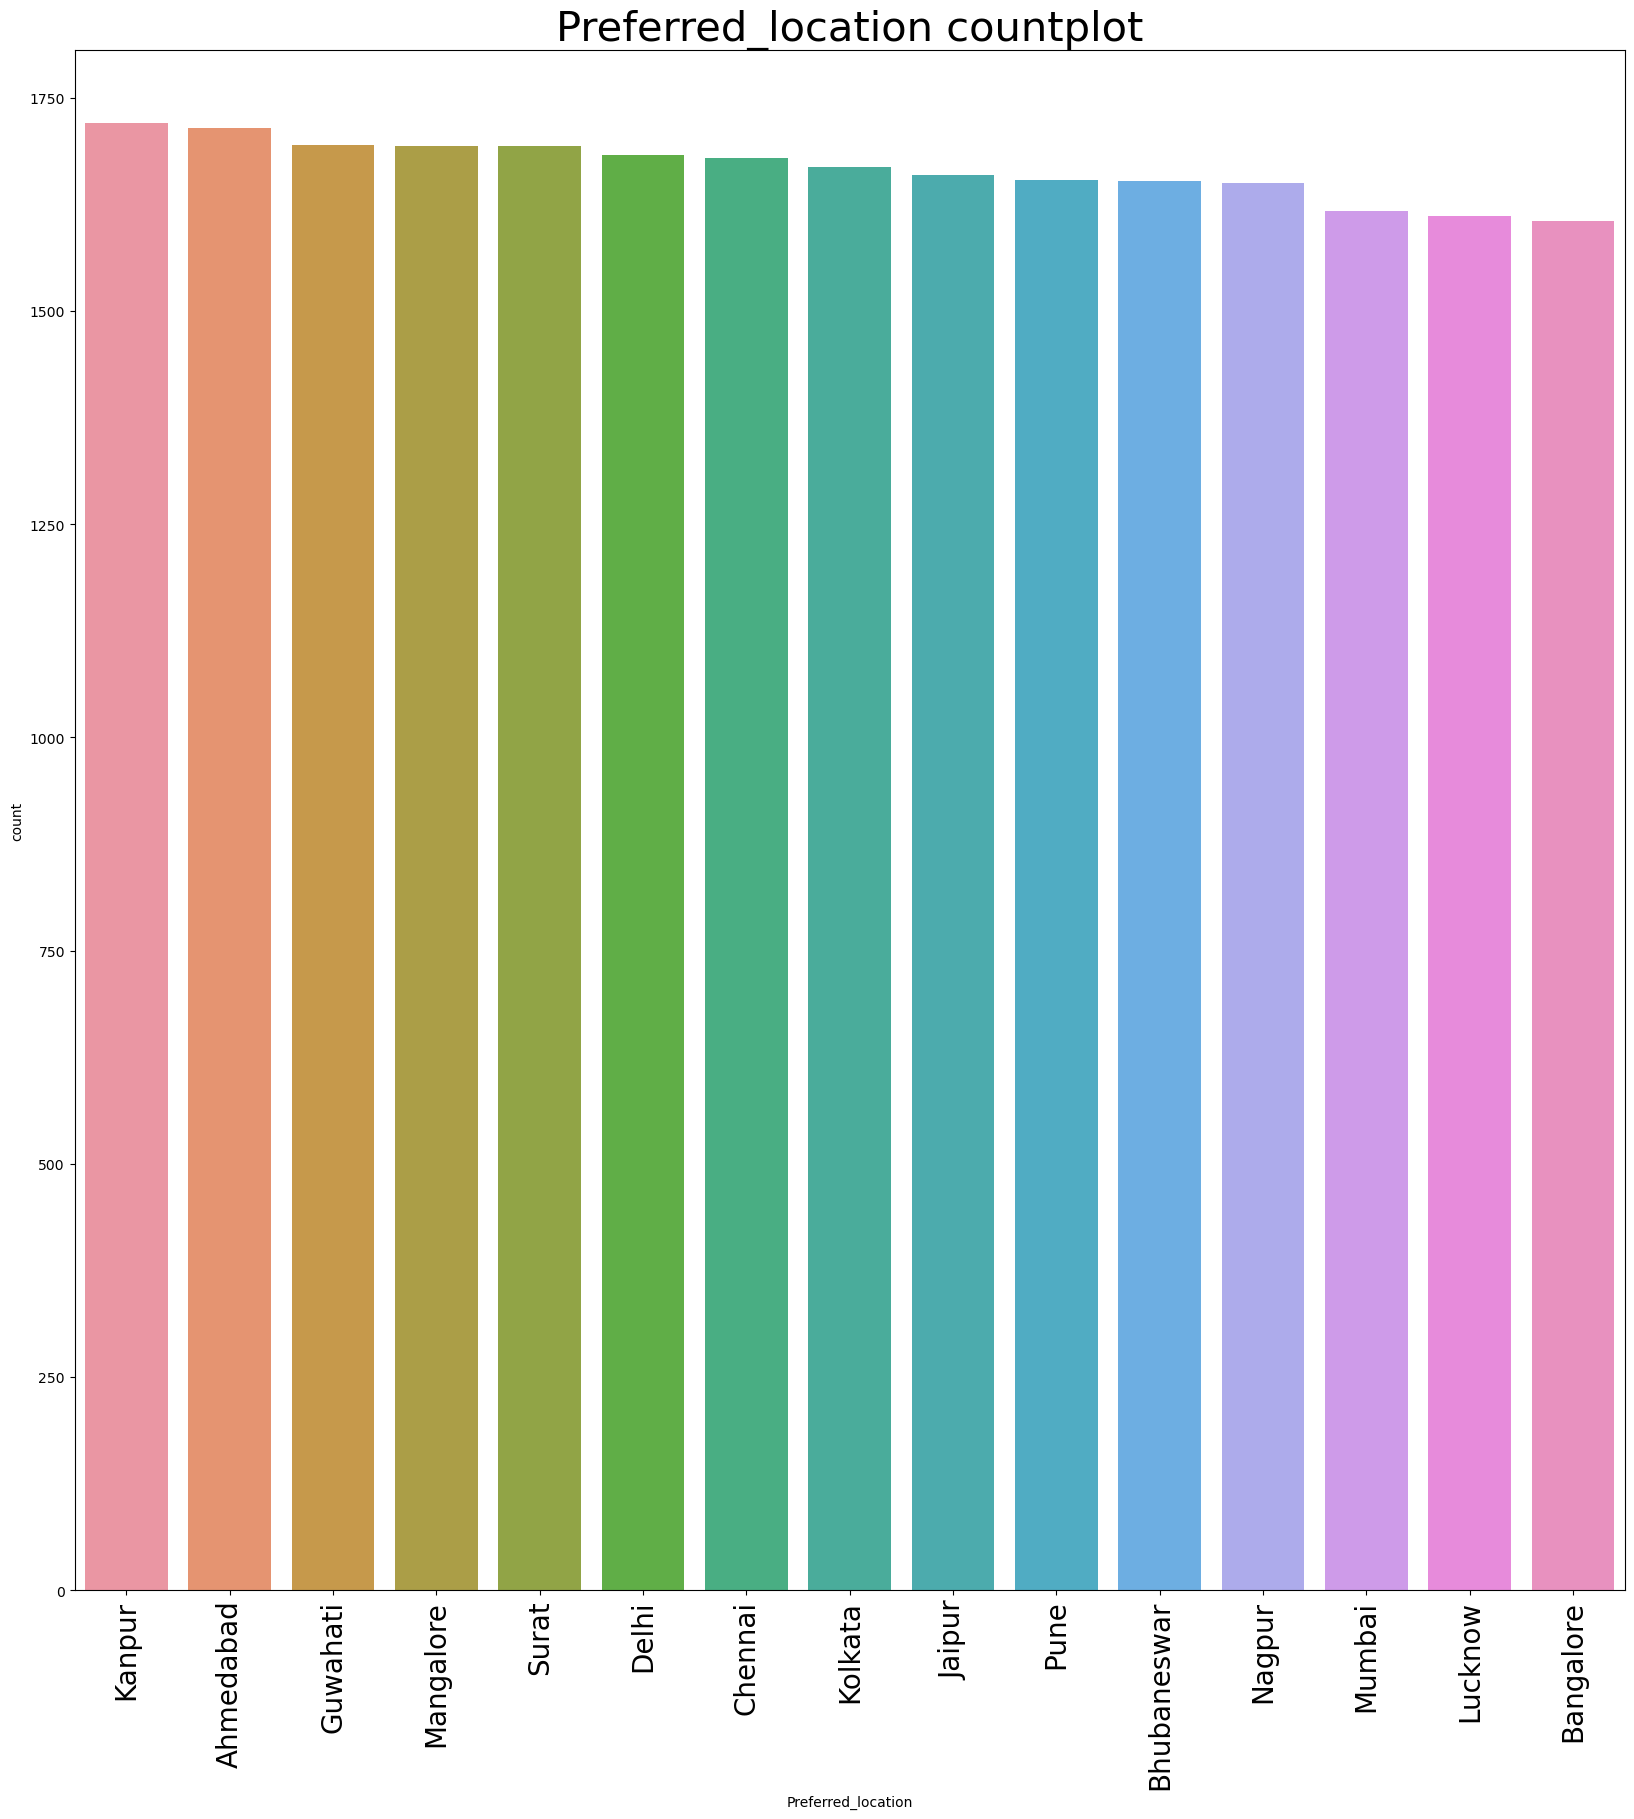

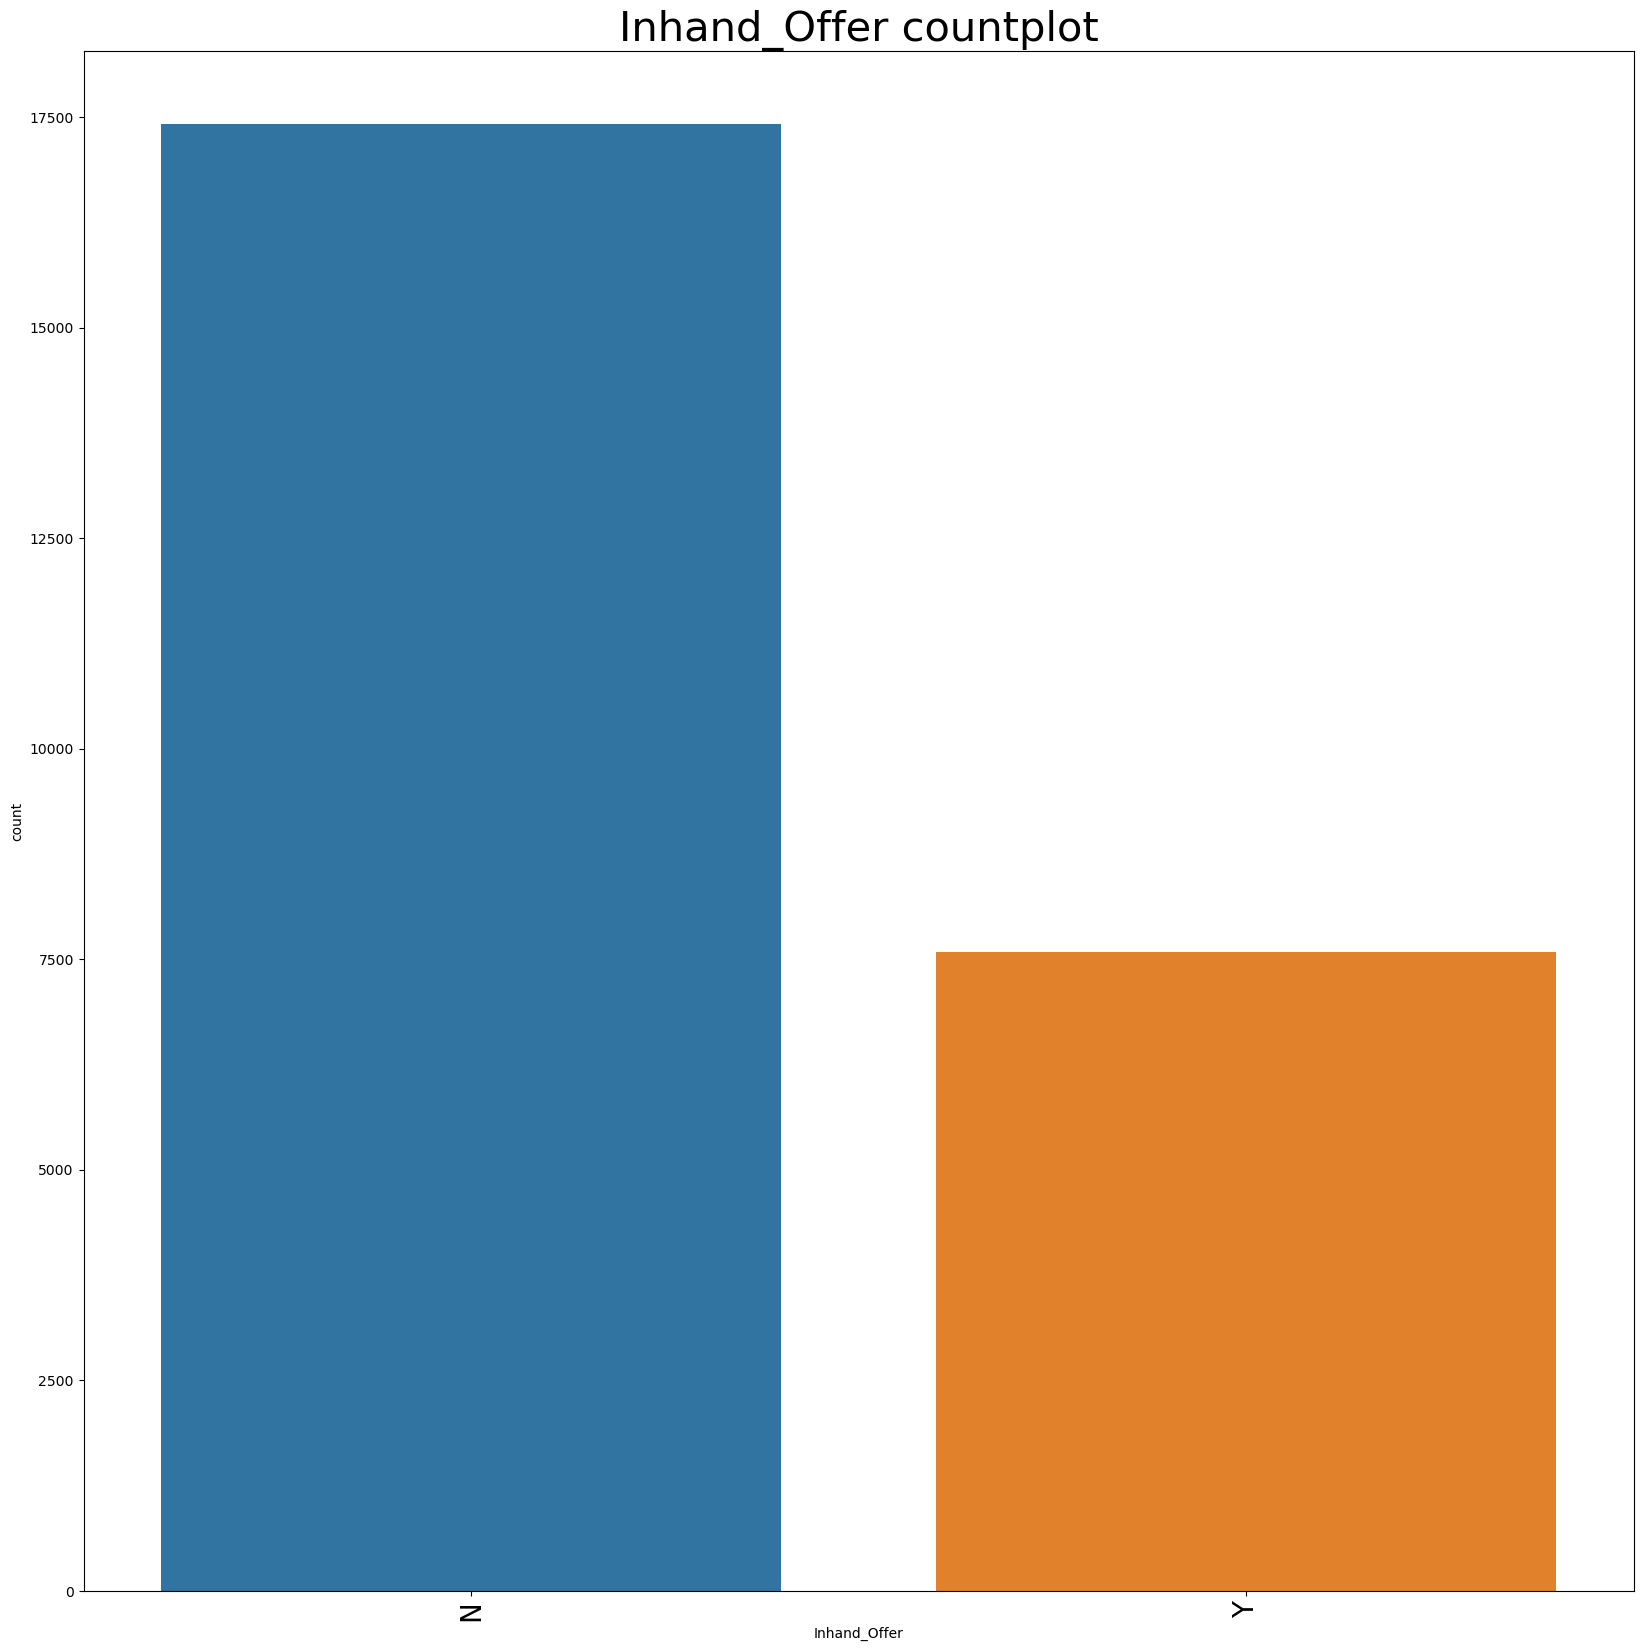

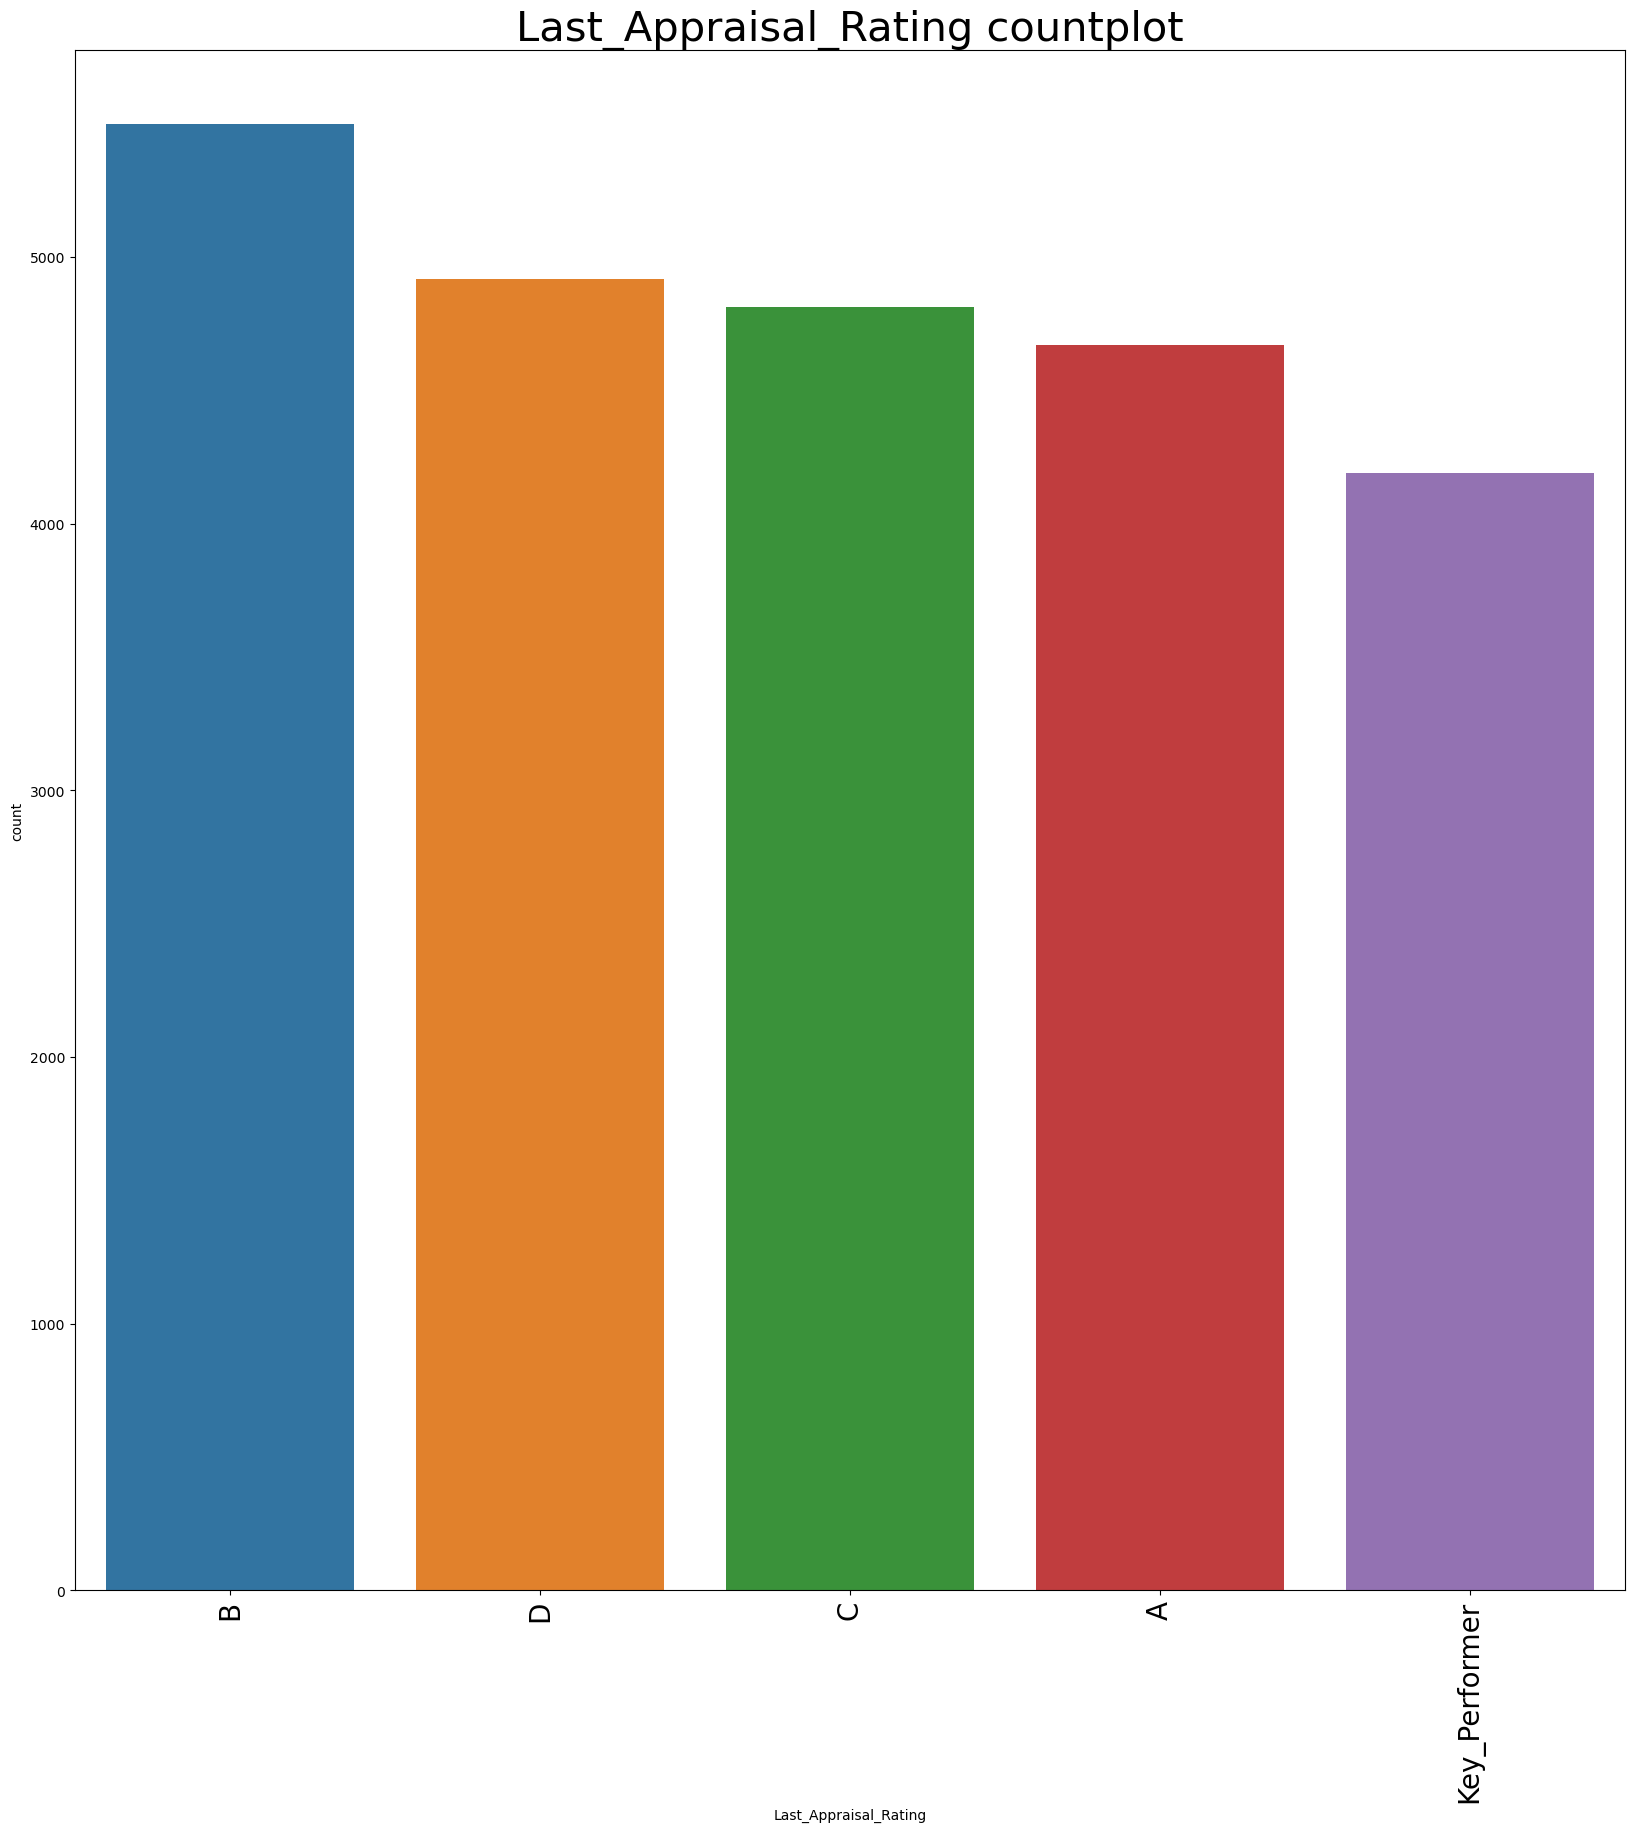

In [378]:
#plotting countplot for categorical variables in descending order
for i in df_categorical_features.columns:
    plt.figure(figsize=(20,20))
    sns.countplot(x=df_categorical_features[i],data=df,order=df[i].value_counts().index)
    plt.title(i +' countplot',fontsize=30)
    plt.xticks(fontsize=20,rotation=90)
    plt.show();


In [212]:
#finding numerical variables
df_numerical_features = df.select_dtypes(include='number')

In [213]:
#printing all numerical columns name
print(df_numerical_features.columns)

Index(['IDX', 'Applicant_ID', 'Total_Experience',
       'Total_Experience_in_field_applied', 'Current_CTC',
       'No_Of_Companies_worked', 'Number_of_Publications', 'Certifications',
       'International_degree_any', 'Expected_CTC'],
      dtype='object')


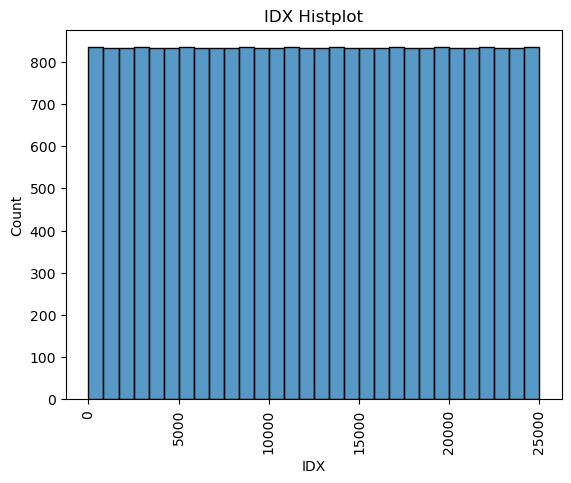

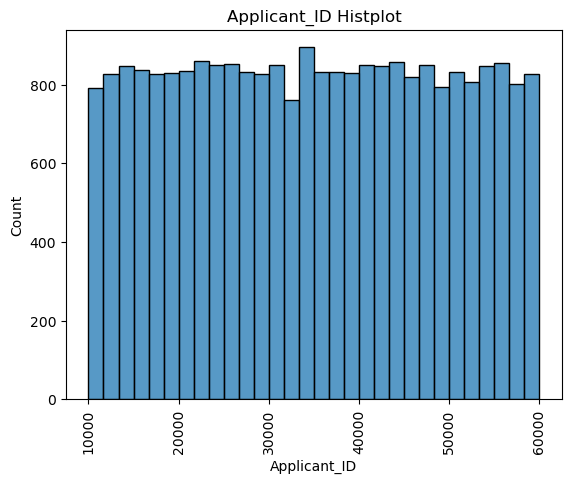

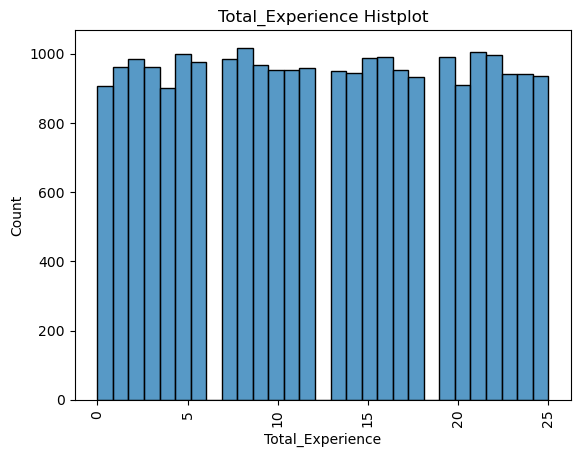

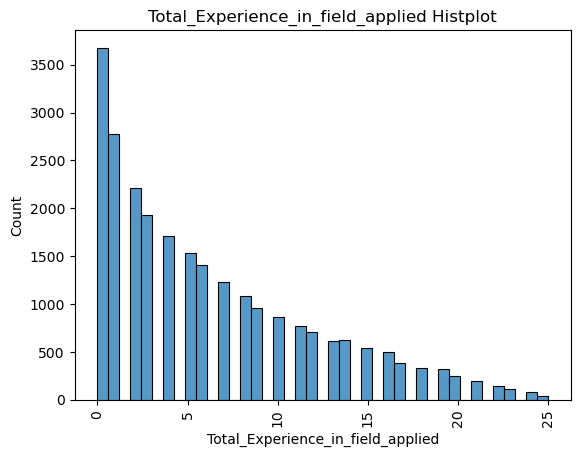

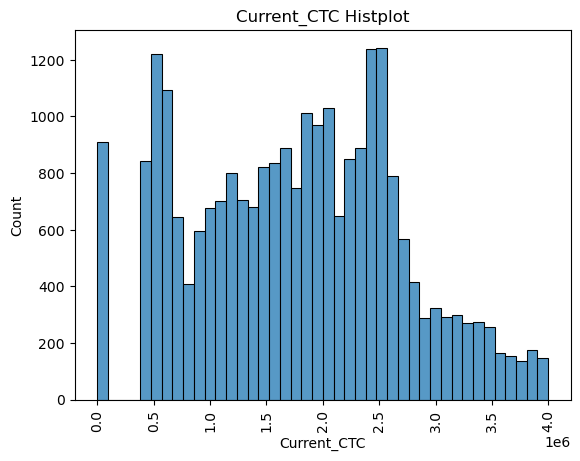

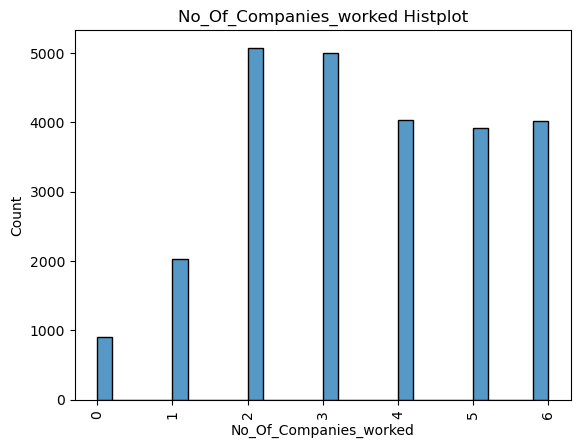

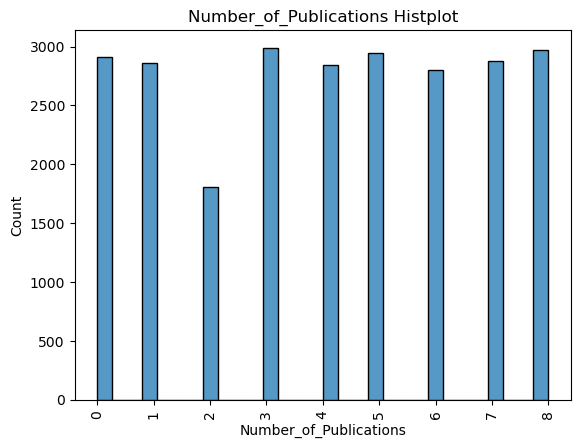

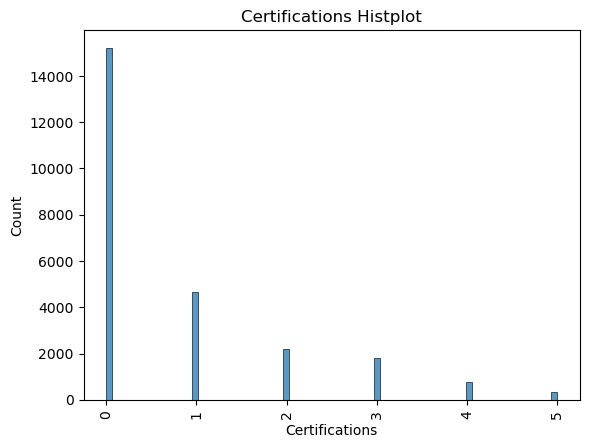

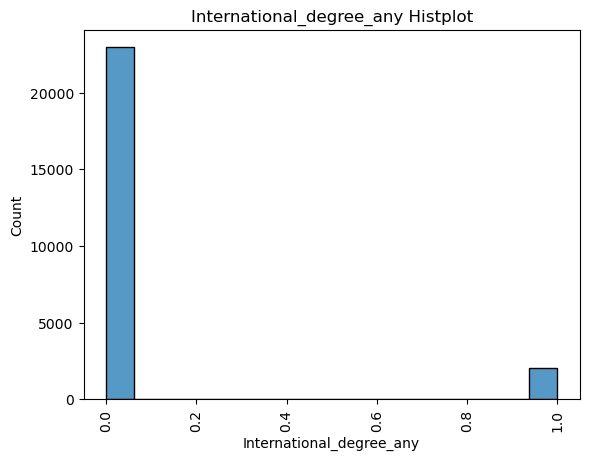

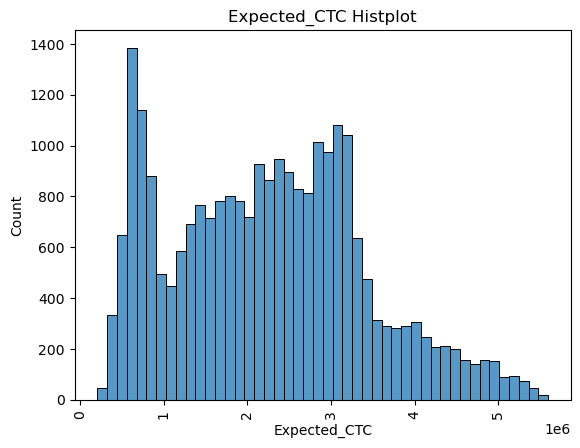

In [214]:
#plotting histplot of numerical variables in descending order

for i in df_numerical_features.columns:
    sns.histplot(x=df_numerical_features[i],data=df)
    plt.title(i +' Histplot')
    plt.xticks(rotation=90)
    plt.show();

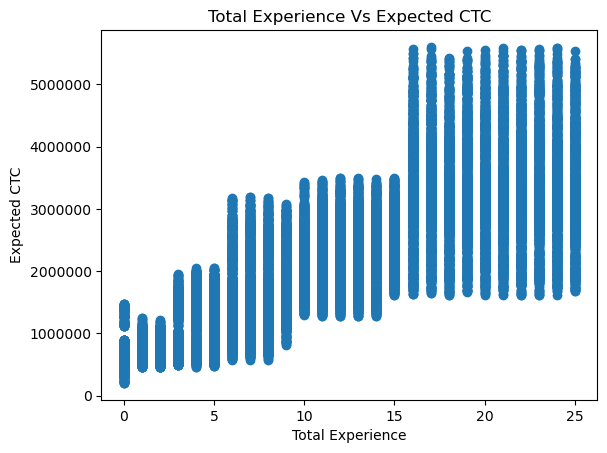

In [215]:
plt.scatter(df['Total_Experience'],df['Expected_CTC'])
plt.ticklabel_format(style='plain')
plt.xlabel('Total Experience')
plt.ylabel('Expected CTC')
plt.title('Total Experience Vs Expected CTC')
plt.show();

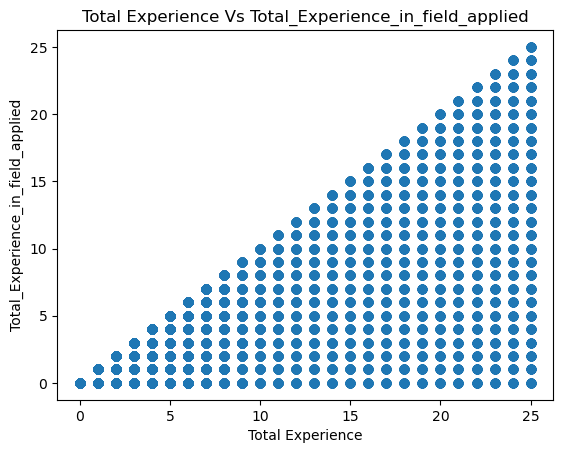

In [216]:
plt.scatter(df['Total_Experience'],df['Total_Experience_in_field_applied'])
plt.ticklabel_format(style='plain')
plt.xlabel('Total Experience')
plt.ylabel('Total_Experience_in_field_applied')
plt.title('Total Experience Vs Total_Experience_in_field_applied')
plt.show();

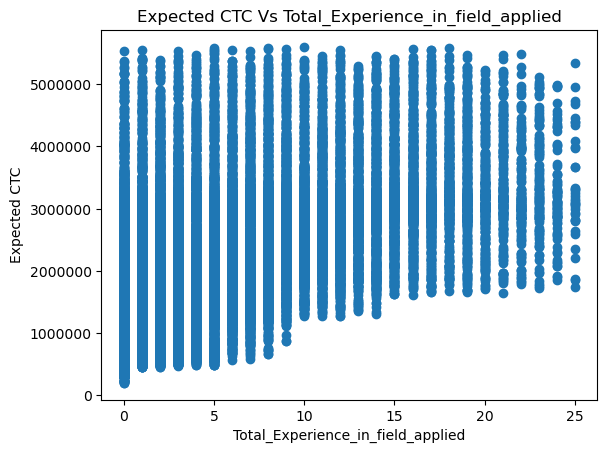

In [217]:
plt.scatter(df['Total_Experience_in_field_applied'],df['Expected_CTC'])
plt.ticklabel_format(style='plain')
plt.ylabel('Expected CTC')
plt.xlabel('Total_Experience_in_field_applied')
plt.title('Expected CTC Vs Total_Experience_in_field_applied')
plt.show();

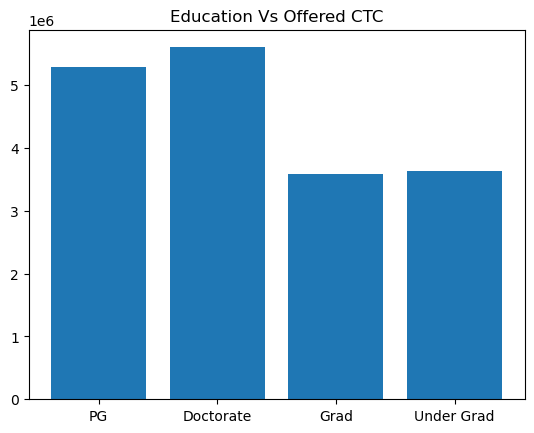

In [218]:
plt.bar(df['Education'],df['Expected_CTC'])
plt.title('Education Vs Offered CTC')
plt.show();

## Multivariate

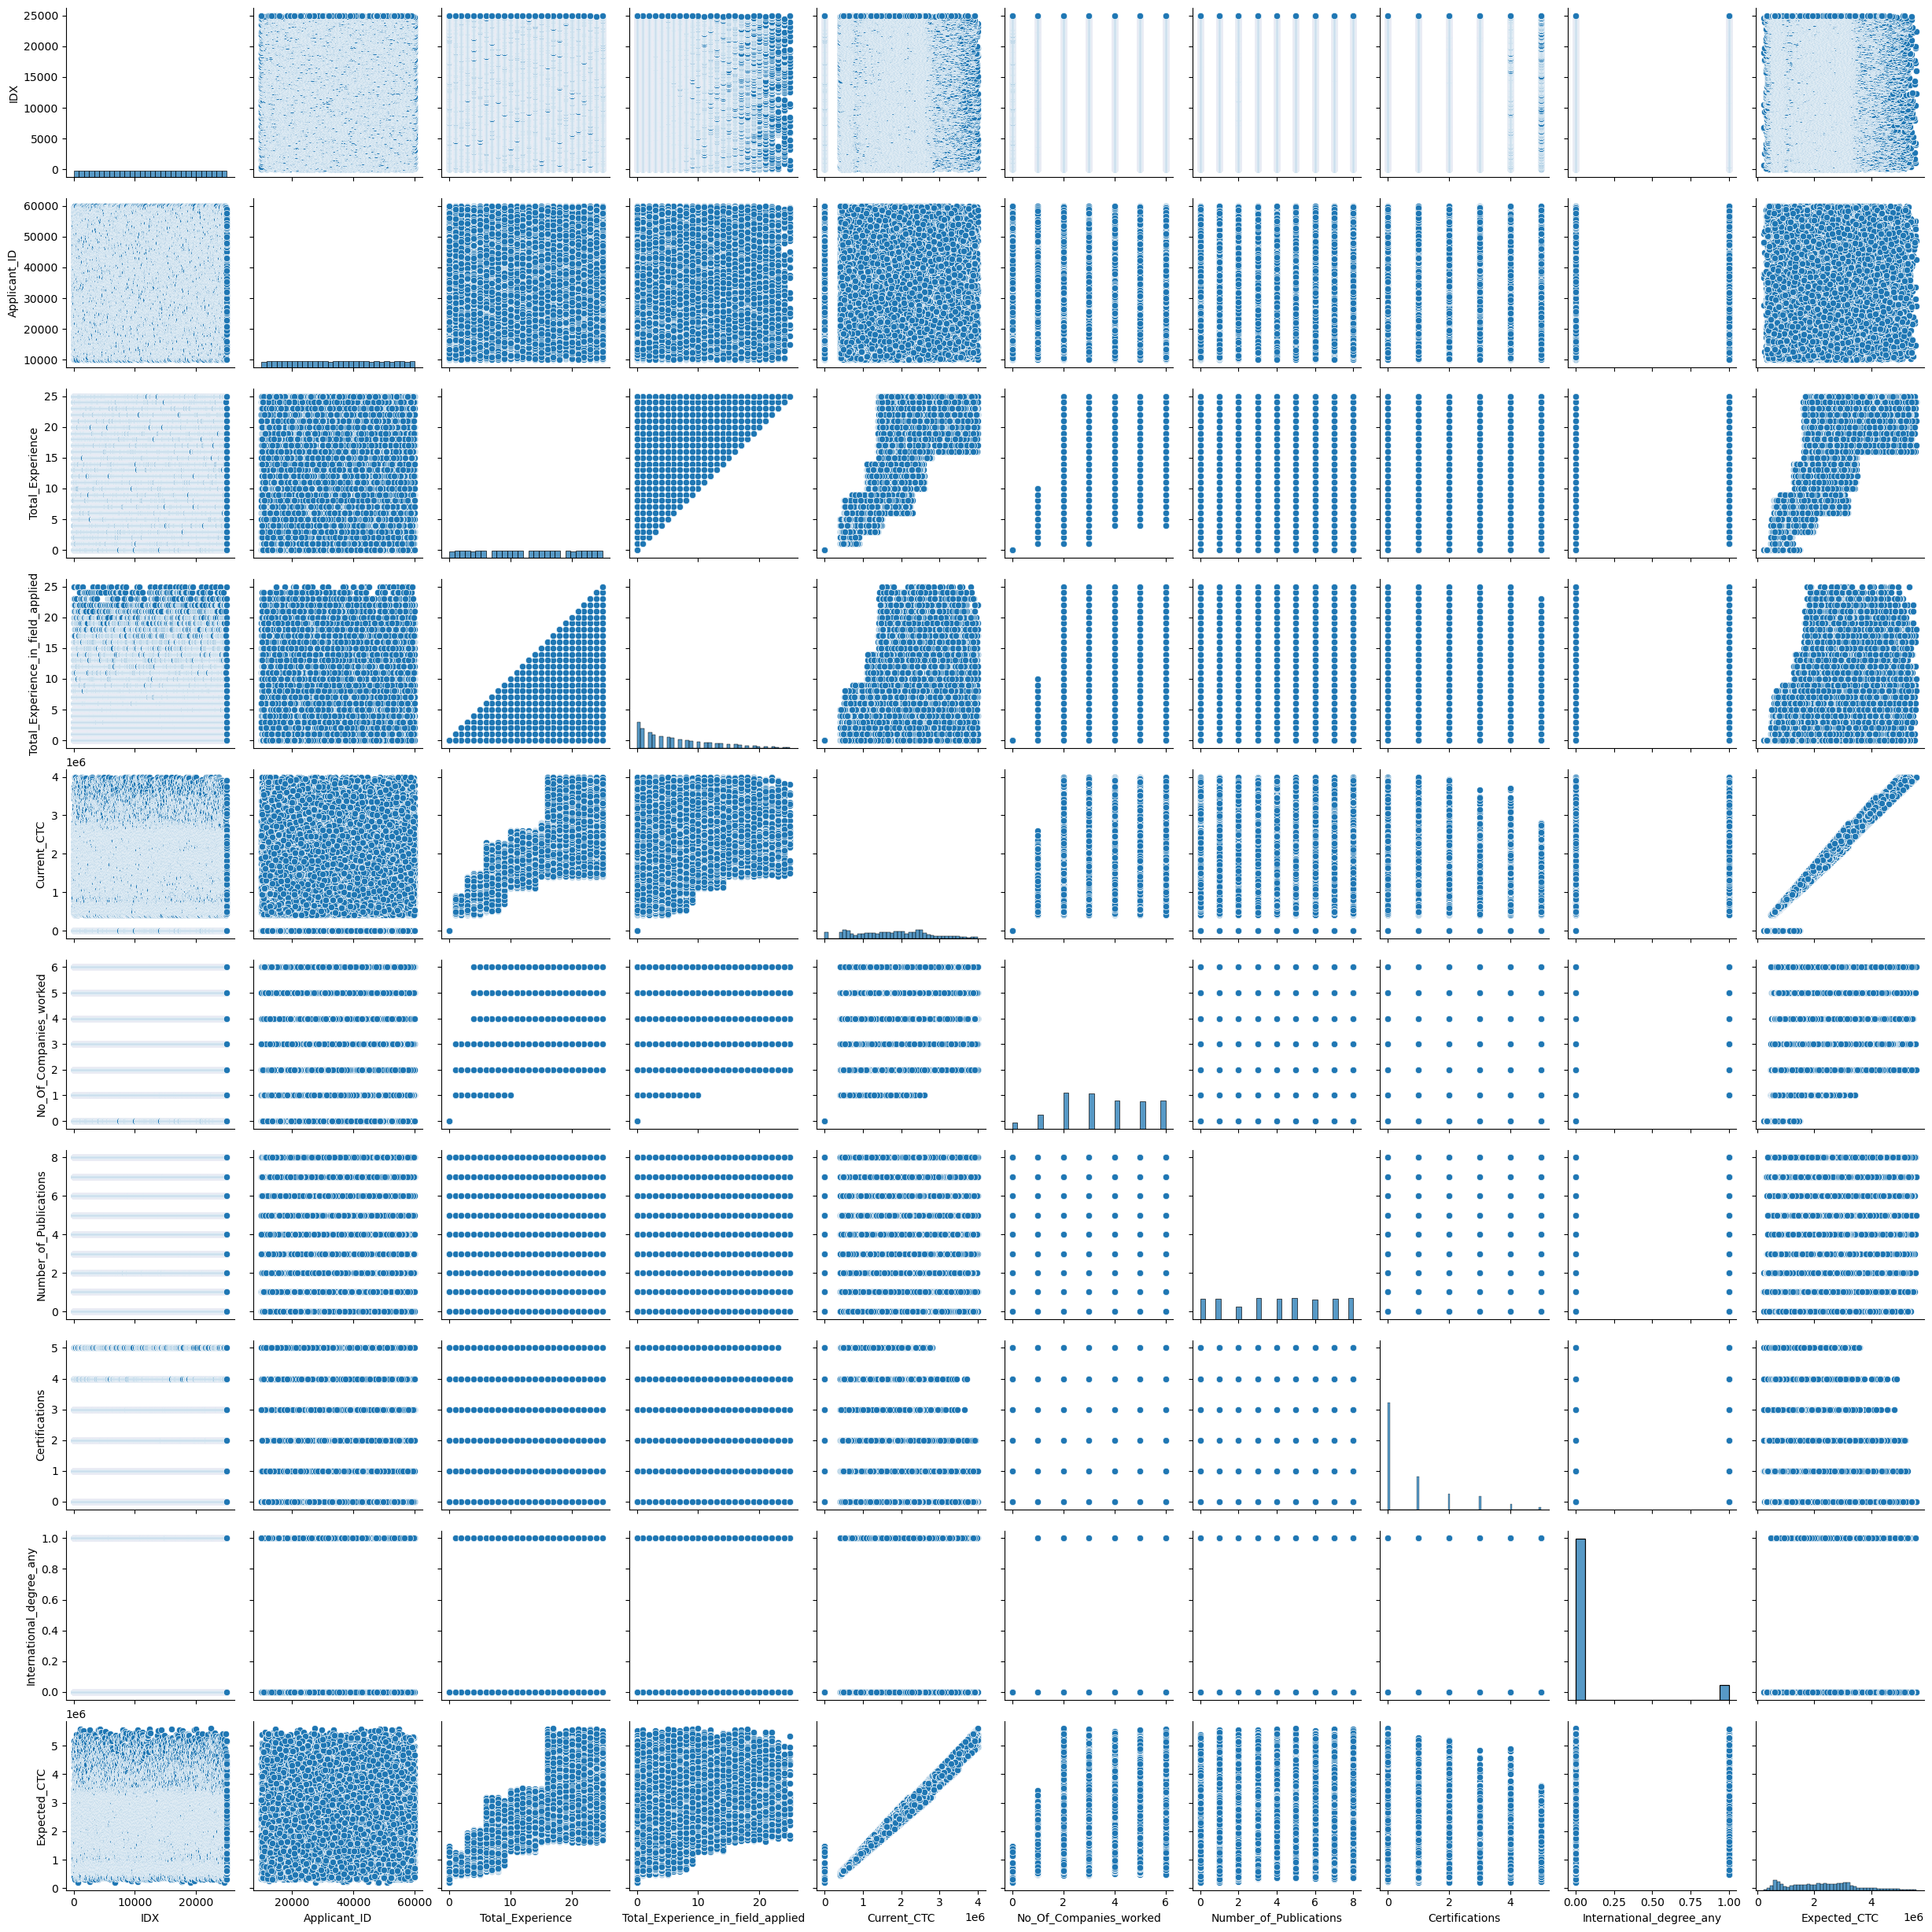

In [219]:
#Understanding the relationship between all the features
sns.pairplot(df);

There are positive relations and negatve relations among variables,but many are obvious relations like 
1)earlier the passing year more is the experience.
2)the current ctc and expected ctc will increase at a same rate.

## Removal Of unwanted Variable

In [220]:
df.drop(['IDX','Applicant_ID'],axis=1,inplace=True)


In [221]:
df.head()

Total_Experience  Total_Experience_in_field_applied      Department  \
0                 0                                  0             NaN   
1                23                                 14              HR   
2                21                                 12  Top Management   
3                15                                  8         Banking   
4                10                                  5           Sales   

                Role   Industry Organization      Designation  Education  \
0                NaN        NaN          NaN              NaN         PG   
1         Consultant  Analytics            H               HR  Doctorate   
2         Consultant   Training            J              NaN  Doctorate   
3  Financial Analyst   Aviation            F               HR  Doctorate   
4    Project Manager  Insurance            E  Medical Officer       Grad   

  Graduation_Specialization University_Grad Passing_Year_Of_Graduation  \
0                      Arts         Lucknow                 2020-01-01   
1                 Chemistry           Surat                 1988-01-01   
2                   Zoology          Jaipur                 1990-01-01   
3                    Others       Bangalore                 1997-01-01   
4                   Zoology          Mumbai                 2004-01-01   

  PG_Specialization University_PG Passing_Year_Of_PG PHD_Specialization  \
0               NaN           NaN                NaT                NaN   
1            Others         Surat         1990-01-01          Chemistry   
2           Zoology        Jaipur         1992-01-01            Zoology   
3           Zoology     Bangalore         1999-01-01          Chemistry   
4           Zoology        Mumbai         2006-01-01            Zoology   

  University_PHD Passing_Year_Of_PHD Curent_Location Preferred_location  \
0            NaN                 NaT        Guwahati               Pune   
1      Mangalore          1997-01-01       Bangalore             Nagpur   
2        Lucknow          1999-01-01       Ahmedabad             Jaipur   
3       Guwahati          2005-01-01          Kanpur            Kolkata   
4      Bangalore          2010-01-01       Ahmedabad          Ahmedabad   

   Current_CTC Inhand_Offer Last_Appraisal_Rating  No_Of_Companies_worked  \
0            0            N                   NaN                       0   
1      2702664            Y         Key_Performer                       2   
2      2236661            Y         Key_Performer                       5   
3      2100510            N                     C                       5   
4      1931644            N                     C                       2   

   Number_of_Publications  Certifications  International_degree_any  \
0                       0               0                         0   
1                       4               0                         0   
2                       3               0                         0   
3                       3               0                         0   
4                       3               0                         0   

   Expected_CTC  
0        384551  
1       3783729  
2       3131325  
3       2608833  
4       2221390

### Duplicate Values

In [222]:
df.duplicated().sum()

0

There are no duplicate values

## Treating Missing Values

In [223]:
df.isnull().sum()

Total_Experience                         0
Total_Experience_in_field_applied        0
Department                            2778
Role                                   963
Industry                               908
Organization                           908
Designation                           3129
Education                                0
Graduation_Specialization             6180
University_Grad                       6180
Passing_Year_Of_Graduation            6180
PG_Specialization                     7692
University_PG                         7692
Passing_Year_Of_PG                    7692
PHD_Specialization                   11881
University_PHD                       11881
Passing_Year_Of_PHD                  11881
Curent_Location                          0
Preferred_location                       0
Current_CTC                              0
Inhand_Offer                             0
Last_Appraisal_Rating                  908
No_Of_Companies_worked                   0
Number_of_P

There are many missing values .

In [224]:
percent_missing = df.isnull().sum() * 100 / len(df)

In [225]:
print(percent_missing)

Total_Experience                      0.000
Total_Experience_in_field_applied     0.000
Department                           11.112
Role                                  3.852
Industry                              3.632
Organization                          3.632
Designation                          12.516
Education                             0.000
Graduation_Specialization            24.720
University_Grad                      24.720
Passing_Year_Of_Graduation           24.720
PG_Specialization                    30.768
University_PG                        30.768
Passing_Year_Of_PG                   30.768
PHD_Specialization                   47.524
University_PHD                       47.524
Passing_Year_Of_PHD                  47.524
Curent_Location                       0.000
Preferred_location                    0.000
Current_CTC                           0.000
Inhand_Offer                          0.000
Last_Appraisal_Rating                 3.632
No_Of_Companies_worked          

There are so many columns where the percentage of missing values are equal to or more than 30%.3 variables has 24% of missing values which are almost close to 30%.
It is better to drop those variables as imputing those missing values will create a synthetic data.

In [226]:
df.drop(['Graduation_Specialization','University_Grad','Passing_Year_Of_Graduation','PG_Specialization','University_PG','Passing_Year_Of_PG','PHD_Specialization','University_PHD','Passing_Year_Of_PHD'],axis=1,inplace=True)

In [227]:
df.shape

(25000, 18)

There are 18variables left .

In [228]:
#dropping all the rows containing null values
df1=df.dropna()

In [229]:
df1.shape

(20307, 18)

In [230]:
(4693/25000)*100

18.772

In [231]:
df1.head()

Total_Experience  Total_Experience_in_field_applied      Department  \
1                23                                 14              HR   
3                15                                  8         Banking   
4                10                                  5           Sales   
5                16                                  3  Top Management   
6                 1                                  1     Engineering   

                 Role   Industry Organization        Designation  Education  \
1          Consultant  Analytics            H                 HR  Doctorate   
3   Financial Analyst   Aviation            F                 HR  Doctorate   
4     Project Manager  Insurance            E    Medical Officer       Grad   
5  Area Sales Manager     Retail            G           Director  Doctorate   
6           Team Lead       FMCG            L  Marketing Manager       Grad   

  Curent_Location Preferred_location  Current_CTC Inhand_Offer  \
1       Bangalore             Nagpur      2702664            Y   
3          Kanpur            Kolkata      2100510            N   
4       Ahmedabad          Ahmedabad      1931644            N   
5            Pune        Bhubaneswar      3511167            Y   
6           Delhi               Pune       492917            Y   

  Last_Appraisal_Rating  No_Of_Companies_worked  Number_of_Publications  \
1         Key_Performer                       2                       4   
3                     C                       5                       3   
4                     C                       2                       3   
5                     C                       5                       4   
6                     B                       3                       3   

   Certifications  International_degree_any  Expected_CTC  
1               0                         0       3783729  
3               0                         0       2608833  
4               0                         0       2221390  
5               0                         0       4522383  
6               0                         0        630933

# 

Dropping all the rows containing null values ,there are only 20307 rows left.
4693 rows are dropped which is 18% of the total data.

## Addition of new variables

In [232]:
#adding one new variable percentage increament which will give the percentage increase in the salary of the employee
df1['percentage_increament']=((df1['Expected_CTC']-df1['Current_CTC'])/df1['Current_CTC'])*100

C:\Users\ARPITA BAYEN\AppData\Local\Temp\ipykernel_17968\3132450824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['percentage_increament']=((df1['Expected_CTC']-df1['Current_CTC'])/df1['Current_CTC'])*100


In [233]:
df1.head()

Total_Experience  Total_Experience_in_field_applied      Department  \
1                23                                 14              HR   
3                15                                  8         Banking   
4                10                                  5           Sales   
5                16                                  3  Top Management   
6                 1                                  1     Engineering   

                 Role   Industry Organization        Designation  Education  \
1          Consultant  Analytics            H                 HR  Doctorate   
3   Financial Analyst   Aviation            F                 HR  Doctorate   
4     Project Manager  Insurance            E    Medical Officer       Grad   
5  Area Sales Manager     Retail            G           Director  Doctorate   
6           Team Lead       FMCG            L  Marketing Manager       Grad   

  Curent_Location Preferred_location  Current_CTC Inhand_Offer  \
1       Bangalore             Nagpur      2702664            Y   
3          Kanpur            Kolkata      2100510            N   
4       Ahmedabad          Ahmedabad      1931644            N   
5            Pune        Bhubaneswar      3511167            Y   
6           Delhi               Pune       492917            Y   

  Last_Appraisal_Rating  No_Of_Companies_worked  Number_of_Publications  \
1         Key_Performer                       2                       4   
3                     C                       5                       3   
4                     C                       2                       3   
5                     C                       5                       4   
6                     B                       3                       3   

   Certifications  International_degree_any  Expected_CTC  \
1               0                         0       3783729   
3               0                         0       2608833   
4               0                         0       2221390   
5               0                         0       4522383   
6               0                         0        630933   

   percentage_increament  
1              39.999978  
3              24.199980  
4              14.999969  
5              28.799997  
6              27.999846

## Outlier Treatment

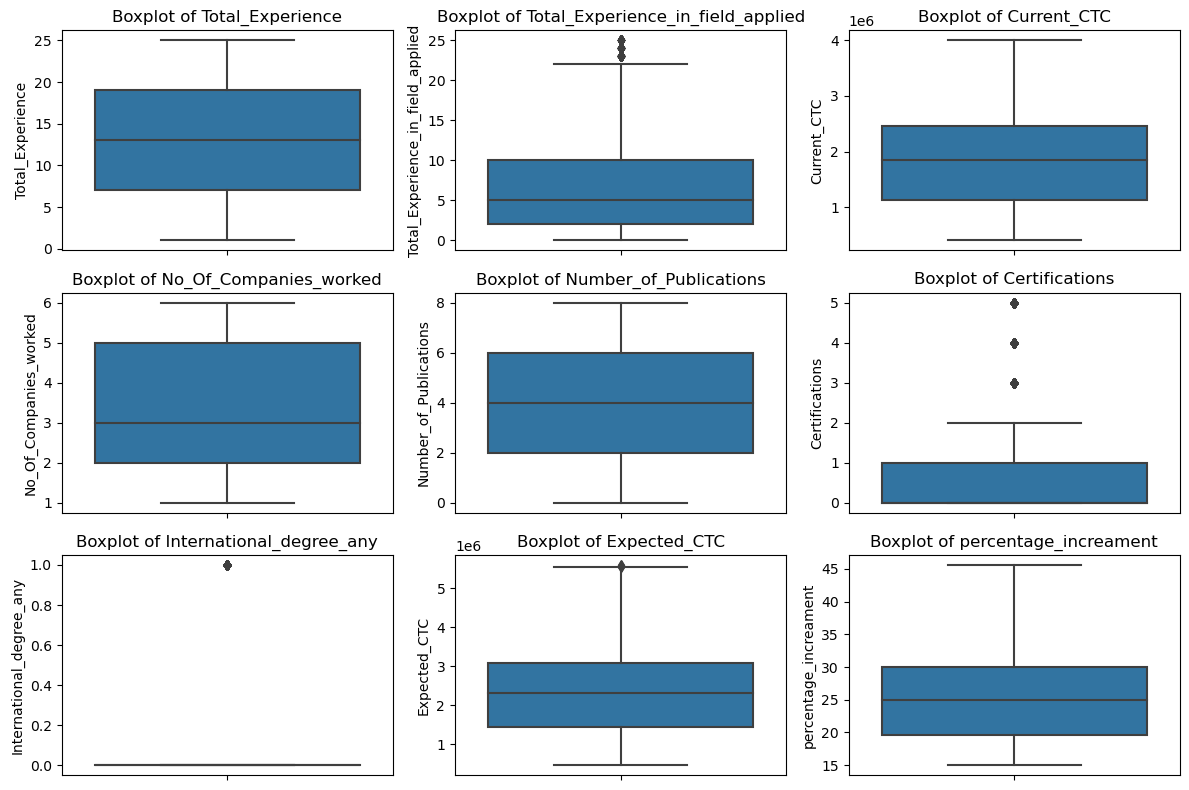

In [234]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = df1.select_dtypes(include='number').columns
for i in range(len(feature_list)):
    plt.subplot(3,3, i + 1)
    sns.boxplot(y = df1[feature_list[i]], data = df1)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

There are outliers in 'Total_Experience_in_field_applied','Certifications'

In [235]:
#func tion to remove outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [236]:
lr,ur=remove_outlier(df1['Total_Experience_in_field_applied'])
df1['Total_Experience_in_field_applied']=np.where(df1['Total_Experience_in_field_applied']>ur,ur,df1['Total_Experience_in_field_applied'])
df1['Total_Experience_in_field_applied']=np.where(df1['Total_Experience_in_field_applied']<lr,lr,df1['Total_Experience_in_field_applied'])
lr1,ur1=remove_outlier(df1['Certifications'])
df1['Certifications']=np.where(df1['Certifications']>ur1,ur1,df1['Certifications'])
df1['Certifications']=np.where(df1['Certifications']<lr1,lr1,df1['Certifications'])

C:\Users\ARPITA BAYEN\AppData\Local\Temp\ipykernel_17968\3162967549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Total_Experience_in_field_applied']=np.where(df1['Total_Experience_in_field_applied']>ur,ur,df1['Total_Experience_in_field_applied'])
C:\Users\ARPITA BAYEN\AppData\Local\Temp\ipykernel_17968\3162967549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Total_Experience_in_field_applied']=np.where(df1['Total_Experience_in_field_applied']<lr,lr,df1['Total_Experience_in_field_appli

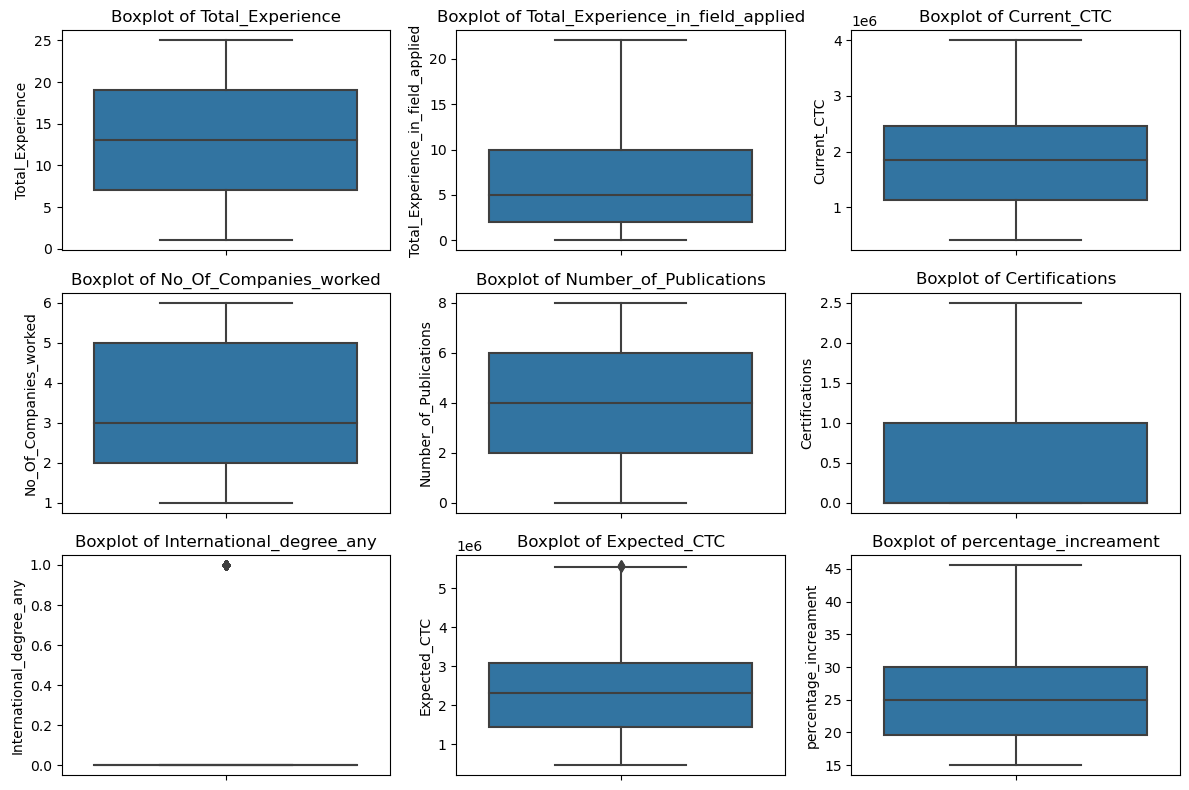

In [237]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = df1.select_dtypes(include='number').columns
for i in range(len(feature_list)):
    plt.subplot(3,3, i + 1)
    sns.boxplot(y = df1[feature_list[i]], data = df1)
    plt.title('Boxplot after removing outliers')
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [238]:
#few rows after removing outliers
df1.head()

Total_Experience  Total_Experience_in_field_applied      Department  \
1                23                               14.0              HR   
3                15                                8.0         Banking   
4                10                                5.0           Sales   
5                16                                3.0  Top Management   
6                 1                                1.0     Engineering   

                 Role   Industry Organization        Designation  Education  \
1          Consultant  Analytics            H                 HR  Doctorate   
3   Financial Analyst   Aviation            F                 HR  Doctorate   
4     Project Manager  Insurance            E    Medical Officer       Grad   
5  Area Sales Manager     Retail            G           Director  Doctorate   
6           Team Lead       FMCG            L  Marketing Manager       Grad   

  Curent_Location Preferred_location  Current_CTC Inhand_Offer  \
1       Bangalore             Nagpur      2702664            Y   
3          Kanpur            Kolkata      2100510            N   
4       Ahmedabad          Ahmedabad      1931644            N   
5            Pune        Bhubaneswar      3511167            Y   
6           Delhi               Pune       492917            Y   

  Last_Appraisal_Rating  No_Of_Companies_worked  Number_of_Publications  \
1         Key_Performer                       2                       4   
3                     C                       5                       3   
4                     C                       2                       3   
5                     C                       5                       4   
6                     B                       3                       3   

   Certifications  International_degree_any  Expected_CTC  \
1             0.0                         0       3783729   
3             0.0                         0       2608833   
4             0.0                         0       2221390   
5             0.0                         0       4522383   
6             0.0                         0        630933   

   percentage_increament  
1              39.999978  
3              24.199980  
4              14.999969  
5              28.799997  
6              27.999846

## Scaling of data

2 variables are very big 1)current ctc and 2)expected ctc.Scaling of these 2 variables should be done

In [239]:
# importing the StandardScaler Module
from sklearn.preprocessing import StandardScaler

In [240]:
#scaling of two variables Current CTC and Expected CTC as only these two are 6-7 digit numbers
df1[['Current_CTC', 'Expected_CTC']] = StandardScaler().fit_transform(df1[['Current_CTC', 'Expected_CTC']])

C:\Users\ARPITA BAYEN\AppData\Local\Temp\ipykernel_17968\1915687718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[['Current_CTC', 'Expected_CTC']] = StandardScaler().fit_transform(df1[['Current_CTC', 'Expected_CTC']])


In [241]:
#first few rows after scaling
df1

Total_Experience  Total_Experience_in_field_applied      Department  \
1                    23                               14.0              HR   
3                    15                                8.0         Banking   
4                    10                                5.0           Sales   
5                    16                                3.0  Top Management   
6                     1                                1.0     Engineering   
...                 ...                                ...             ...   
24995                18                               13.0     Engineering   
24996                12                                8.0              HR   
24997                22                                8.0         Banking   
24998                25                                8.0       Marketing   
24999                 8                                0.0         Banking   

                     Role    Industry Organization         Designation  \
1              Consultant   Analytics            H                  HR   
3       Financial Analyst    Aviation            F                  HR   
4         Project Manager   Insurance            E     Medical Officer   
5      Area Sales Manager      Retail            G            Director   
6               Team Lead        FMCG            L   Marketing Manager   
...                   ...         ...          ...                 ...   
24995     Project Manager  Automobile            I   Assistant Manager   
24996              Others   Analytics            B          Sr.Manager   
24997                Head   Insurance            D  Software Developer   
24998                 CEO        BFSI            D   Marketing Manager   
24999          Consultant  Automobile            P          Sr.Manager   

        Education Curent_Location Preferred_location  Current_CTC  \
1       Doctorate       Bangalore             Nagpur     1.007712   
3       Doctorate          Kanpur            Kolkata     0.313262   
4            Grad       Ahmedabad          Ahmedabad     0.118513   
5       Doctorate            Pune        Bhubaneswar     1.940138   
6            Grad           Delhi               Pune    -1.540735   
...           ...             ...                ...          ...   
24995          PG          Kanpur             Mumbai     1.824501   
24996  Under Grad       Bangalore             Nagpur    -0.551368   
24997  Under Grad            Pune              Delhi    -0.169630   
24998          PG           Delhi               Pune     1.709394   
24999        Grad           Surat          Mangalore    -1.029857   

      Inhand_Offer Last_Appraisal_Rating  No_Of_Companies_worked  \
1                Y         Key_Performer                       2   
3                N                     C                       5   
4                N                     C                       2   
5                Y                     C                       5   
6                Y                     B                       3   
...            ...                   ...                     ...   
24995            N                     B                       3   
24996            Y                     B                       6   
24997            N                     C                       4   
24998            Y                     B                       3   
24999            N                     A                       2   

       Number_of_Publications  Certifications  International_degree_any  \
1                           4             0.0                         0   
3                           3             0.0                         0   
4                           3             0.0                         0   
5                           4             0.0                         0   
6                           3             0.0                         0   
...                       ...             ...                       ...   
24995     

## Label Encoding

In [242]:
# Import label encoder 
from sklearn import preprocessing 

In [243]:
# label_encoder object knows  how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [244]:
#Encode labels in all column
for column in df1.columns:
    if df1[column].dtype == 'object':
        df1[column]=label_encoder.fit_transform(df1[column])
        print(df1[column].value_counts().sort_values())
        print('\n')

7     1073
0     1112
11    1468
4     1757
3     1777
2     1779
5     1788
10    1818
9     1870
6     1879
1     1902
8     2084
Name: Department, dtype: int64


10      25
13      26
15      28
16      95
22     109
20     116
1      121
12     257
7      320
2      639
21     817
9      925
5      976
19    1067
8     1115
18    1212
17    1316
4     1438
6     1505
23    1537
14    1537
0     1603
3     1617
11    1906
Name: Role, dtype: int64


7     1726
4     1831
8     1836
2     1851
3     1854
0     1862
6     1862
1     1865
9     1870
5     1875
10    1875
Name: Industry, dtype: int64


14    1231
11    1242
1     1247
2     1249
8     1250
13    1253
5     1259
4     1261
6     1262
3     1263
10    1270
0     1286
15    1299
9     1302
7     1304
12    1329
Name: Organization, dtype: int64


14      52
13     446
1      713
4      770
9      859
17     879
8      887
15     909
12    1441
3     1457
0     1466
6     1468
7     1471
2     1480
16    1487
10    1500
11   

C:\Users\ARPITA BAYEN\AppData\Local\Temp\ipykernel_17968\611313495.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column]=label_encoder.fit_transform(df1[column])
C:\Users\ARPITA BAYEN\AppData\Local\Temp\ipykernel_17968\611313495.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[column]=label_encoder.fit_transform(df1[column])
C:\Users\ARPITA BAYEN\AppData\Local\Temp\ipykernel_17968\611313495.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [245]:
#first few rows of the dataset after lable encoding
df1

Total_Experience  Total_Experience_in_field_applied  Department  Role  \
1                    23                               14.0           5     6   
3                    15                                8.0           2     8   
4                    10                                5.0          10    14   
5                    16                                3.0          11     1   
6                     1                                1.0           4    23   
...                 ...                                ...         ...   ...   
24995                18                               13.0           4    14   
24996                12                                8.0           5    11   
24997                22                                8.0           2     9   
24998                25                                8.0           8     5   
24999                 8                                0.0           2     6   

       Industry  Organization  Designation  Education  Curent_Location  \
1             0             7            5          0                1   
3             2             5            5          0                7   
4             6             4            8          1                0   
5             8             6            4          0               13   
6             4            11            7          1                4   
...         ...           ...          ...        ...              ...   
24995         1             8            0          2                7   
24996         0             1           16          3                1   
24997         6             3           15          3               13   
24998         3             3            7          2                4   
24999         1            15           16          1               14   

       Preferred_location  Current_CTC  Inhand_Offer  Last_Appraisal_Rating  \
1                      12     1.007712             1                      4   
3                       8     0.313262             0                      2   
4                       0     0.118513             0                      2   
5                       2     1.940138             1                      2   
6                      13    -1.540735             1                      1   
...                   ...          ...           ...                    ...   
24995                  11     1.824501             0                      1   
24996                  12    -0.551368             1                      1   
24997                   4    -0.169630             0                      2   
24998                  13     1.709394             1                      1   
24999                  10    -1.029857             0                      0   

       No_Of_Companies_worked  Number_of_Publications  Certifications  \
1                           2                       4             0.0   
3                           5                       3             0.0   
4                           2                       3             0.0   
5                           5                       4             0.0   
6                           3                       3             0.0   
...                       ...                     ...             ...   
24995                       3                       6             0.0   
24996                       6                       7             0.0   
24997                       4                       5             2.0   
24998                       3                       1             1.0   
24999                       2                       6             0.0   

       International_degree_any  Expected_CTC  percentage_increament  
1                             0      1.295859              39.999978  
3                             0      0.257249              24.199980  
4                             0     -0.085251              14.999969  
5                             0      1.948830  

In [246]:
df_x=df1.drop(['Expected_CTC'],axis=1)

In [247]:
df_y=df1['Expected_CTC']

## Splitting into Train and Test

In [248]:
from sklearn.model_selection import train_test_split

In [249]:
y=df1['Expected_CTC']

In [250]:
X=df1.drop('Expected_CTC',axis=1)

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=1)

In [252]:
X_train.shape

(6092, 18)

In [253]:
X_train.head()

Total_Experience  Total_Experience_in_field_applied  Department  Role  \
20708                12                                4.0           5    21   
11551                 7                                3.0           9    11   
1630                 20                               20.0          11    22   
19873                15                                3.0           3    23   
17295                20                               12.0           7    23   

       Industry  Organization  Designation  Education  Curent_Location  \
20708         9            14           13          1                8   
11551        10             0           10          3                0   
1630          3             3           10          2               10   
19873         3             8            0          2                3   
17295         7            14           16          2               11   

       Preferred_location  Current_CTC  Inhand_Offer  Last_Appraisal_Rating  \
20708                   3     0.209997             0                      3   
11551                   3    -1.044243             0                      2   
1630                    4     0.877288             1                      0   
19873                  14    -0.276453             1                      0   
17295                   9     1.517298             1                      1   

       No_Of_Companies_worked  Number_of_Publications  Certifications  \
20708                       2                       7             0.0   
11551                       1                       3             2.0   
1630                        5                       1             1.0   
19873                       2                       3             0.0   
17295                       3                       3             2.0   

       International_degree_any  percentage_increament  
20708                         0              14.999983  
11551                         0              14.999951  
1630                          0              31.999974  
19873                         0              31.999975  
17295                         0              31.999978

In [254]:
X_test.shape

(14215, 18)

In [255]:
X_test.head()

Total_Experience  Total_Experience_in_field_applied  Department  Role  \
16352                25                                6.0           0    17   
8940                 22                                9.0           8    17   
14511                23                                0.0           1     6   
18995                17                                9.0           2    18   
15304                20                                1.0          10     3   

       Industry  Organization  Designation  Education  Curent_Location  \
16352         1            11            5          1                1   
8940          3             5            2          3               11   
14511        10             8            6          1                9   
18995         6             2            5          2                7   
15304         6            10            7          0               13   

       Preferred_location  Current_CTC  Inhand_Offer  Last_Appraisal_Rating  \
16352                  14    -0.381276             0                      2   
8940                    0     0.506127             0                      2   
14511                   5     0.676790             1                      4   
18995                   4     0.536719             0                      0   
15304                  10     0.673284             1                      2   

       No_Of_Companies_worked  Number_of_Publications  Certifications  \
16352                       4                       8             0.0   
8940                        2                       5             2.5   
14511                       3                       7             0.0   
18995                       6                       6             0.0   
15304                       3                       7             0.0   

       International_degree_any  percentage_increament  
16352                         0              14.999943  
8940                          0              14.999987  
14511                         0              27.999982  
18995                         0              29.999983  
15304                         0              28.799971

In [256]:
y_train.shape

(6092,)

In [257]:
y_train.head()

20708   -0.004609
11551   -1.110210
1630     0.972763
19873   -0.194590
17295    1.620325
Name: Expected_CTC, dtype: float64

In [258]:
y_test.shape

(14215,)

In [259]:
y_test.head()

16352   -0.525811
8940     0.256427
14511    0.684480
18995    0.587614
15304    0.698102
Name: Expected_CTC, dtype: float64

## Recursive Feature Elimination(RFE)

In [260]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
n_features_to_select = 10
regressor=RandomForestRegressor()
rfe = RFE(regressor, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

RFE(estimator=RandomForestRegressor(), n_features_to_select=10)

In [261]:
# now print out the features in order of ranking
from operator import itemgetter
features = X_train.columns.to_list()
for a, b in (sorted(zip(rfe.ranking_ , features), key=itemgetter(0))):
    print(a, b)

1 Total_Experience
1 Total_Experience_in_field_applied
1 Organization
1 Designation
1 Education
1 Curent_Location
1 Preferred_location
1 Current_CTC
1 Inhand_Offer
1 percentage_increament
2 Role
3 Number_of_Publications
4 Department
5 Industry
6 Last_Appraisal_Rating
7 No_Of_Companies_worked
8 Certifications
9 International_degree_any


In [262]:
X_train.drop(['Department','Role','Industry','Number_of_Publications','Last_Appraisal_Rating','No_Of_Companies_worked','Certifications','International_degree_any'],axis=1,inplace=True)

In [263]:
X_test.drop(['Department','Role','Industry','Number_of_Publications','Last_Appraisal_Rating','No_Of_Companies_worked','Certifications','International_degree_any'],axis=1,inplace=True)

In [264]:
X_test.shape

(14215, 10)

In [265]:
X_train.shape

(6092, 10)

## KMeans Clustering

### Forming 2 Clusters with K=2

In [266]:
#importing K-means library
from sklearn.cluster import KMeans 
# Create K Means cluster and store the result in the object k_means
k_means = KMeans(n_clusters = 2,random_state=142)

In [267]:
# Fit K means on the scaled_df
k_means.fit(X_train)

KMeans(n_clusters=2, random_state=142)

In [268]:
k_means.labels_

array([0, 0, 1, ..., 0, 1, 1])

In [269]:
k_means.inertia_

1072401.2653675573

In [270]:
k_means = KMeans(n_clusters = 3)
k_means.fit(X_train)
k_means.inertia_

916831.3846876323

In [271]:
k_means = KMeans(n_clusters = 4)
k_means.fit(X_train)
k_means.inertia_

839084.2043570103

In [272]:
k_means = KMeans(n_clusters = 5)
k_means.fit(X_train)
k_means.inertia_

785196.9112406379

In [273]:
k_means = KMeans(n_clusters = 6)
k_means.fit(X_train)
k_means.inertia_

752256.2985843855

In [274]:
k_means = KMeans(n_clusters = 7)
k_means.fit(X_train)
k_means.inertia_

716001.0829662678

In [275]:
k_means = KMeans(n_clusters = 8)
k_means.fit(X_train)
k_means.inertia_

690052.518324963

In [276]:
k_means = KMeans(n_clusters = 9)
k_means.fit(X_train)
k_means.inertia_

669007.262983225

In [277]:
k_means = KMeans(n_clusters = 10)
k_means.fit(X_train)
k_means.inertia_

652141.4420039105

In [278]:
k_means = KMeans(n_clusters = 11)
k_means.fit(X_train)
k_means.inertia_

636493.8512045505

In [279]:
k_means = KMeans(n_clusters = 50)
k_means.fit(X_train)
k_means.inertia_

396898.2047043331

In [280]:
wss =[]

In [281]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(X_train)
    wss.append(KM.inertia_)

In [282]:
wss

[1383934.5178692844,
 1072401.486541376,
 916831.0456998397,
 839084.4058915467,
 785196.9999260525,
 749170.1097397984,
 716021.2242355581,
 690054.1645473638,
 669042.1782764022,
 652256.8940077814]

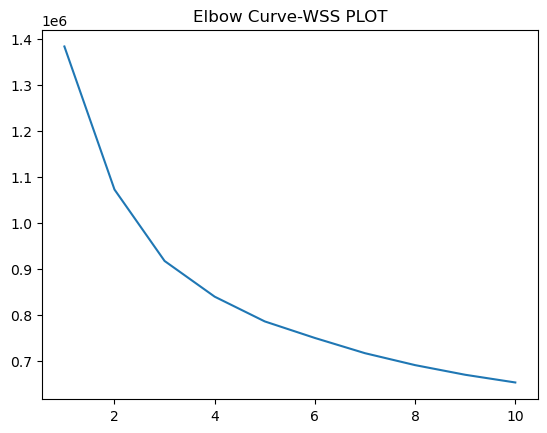

In [283]:
plt.plot(range(1,11), wss)
plt.title("Elbow Curve-WSS PLOT");

Elbow Curve is not clearly showing the break .So I will try the silhouette score.

In [284]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [285]:
k_means = KMeans(n_clusters = 2)
k_means.fit(X_train)
labels = k_means.labels_
silhouette_score(X_train,labels)

0.20173343066900432

In [286]:
k_means = KMeans(n_clusters = 3)
k_means.fit(X_train)
labels = k_means.labels_
silhouette_score(X_train,labels)

0.1780564578134718

In [287]:
k_means = KMeans(n_clusters = 4)
k_means.fit(X_train)
labels = k_means.labels_
silhouette_score(X_train,labels)

0.15061772563298212

In [288]:
k_means = KMeans(n_clusters = 5)
k_means.fit(X_train)
labels = k_means.labels_
silhouette_score(X_train,labels)

0.1478166150182931

In [289]:
k_means = KMeans(n_clusters = 6)
k_means.fit(X_train)
labels = k_means.labels_
silhouette_score(X_train,labels)

0.14559638302754777

4 is the breaking point.4 clusters are suitable here

In [290]:
k_means = KMeans(n_clusters = 4)
y_kmeans=k_means.fit(X_train)
labels = k_means.labels_

In [291]:
X_train1=X_train.copy()
X_train1["Clus_kmeans"] = labels
X_train1.head(5)

Total_Experience  Total_Experience_in_field_applied  Organization  \
20708                12                                4.0            14   
11551                 7                                3.0             0   
1630                 20                               20.0             3   
19873                15                                3.0             8   
17295                20                               12.0            14   

       Designation  Education  Curent_Location  Preferred_location  \
20708           13          1                8                   3   
11551           10          3                0                   3   
1630            10          2               10                   4   
19873            0          2                3                  14   
17295           16          2               11                   9   

       Current_CTC  Inhand_Offer  percentage_increament  Clus_kmeans  
20708     0.209997             0              14.999983            0  
11551    -1.044243             0              14.999951            0  
1630      0.877288             1              31.999974            2  
19873    -0.276453             1              31.999975            1  
17295     1.517298             1              31.999978            2

In [292]:
X_train1.to_csv('ArpitaBayen_Salary Predictions_K-Means.csv')

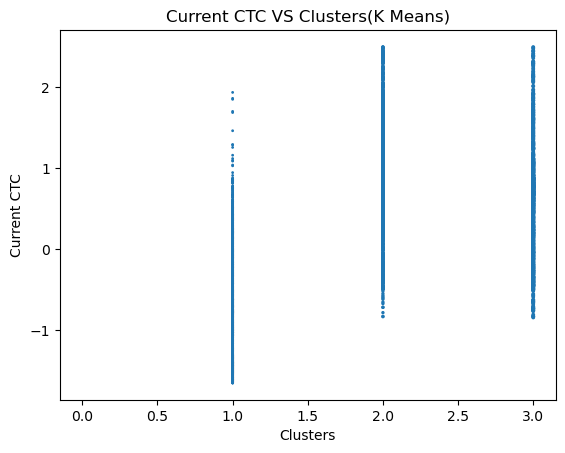

In [293]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_train)

plt.scatter(X_train1['Clus_kmeans'],X_train['Current_CTC'], labels)
plt.title("Current CTC VS Clusters(K Means)")
plt.xlabel("Clusters")
plt.ylabel("Current CTC")
plt.show()

## Simple Linear Regression

In [294]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [295]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for Total_Experience is -0.0016283949877708979
The coefficient for Total_Experience_in_field_applied is -1.229695122647198e-05
The coefficient for Organization is 3.773289454316433e-06
The coefficient for Designation is 1.254819215709172e-05
The coefficient for Education is -0.001016816768916053
The coefficient for Curent_Location is -0.00015226460764011964
The coefficient for Preferred_location is -0.00011115522661619285
The coefficient for Current_CTC is 0.9847694559882453
The coefficient for Inhand_Offer is 0.0005962556758171019
The coefficient for percentage_increament is 0.015582788554075647


In [296]:
# Let us check the intercept for the model

intercept = regression_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.3850670231797762


# we can write our linear model as:
Y=-0.385-0.0016*(Total Experience)-(1.2296e-05) *(Total Experience in field applied)+(3.77e-06)*(Organisation)+(1.25e-05)*(Designation)-0.00101*(Education)-0.000152*(Current Location)-0.00011*(Preferred Location)+0984*(Current CTC)+0.005*(Inhand Offer)+0.0155*(percentage increament)

#### R2 score on train set

In [297]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

l_r_score_r2_train=regression_model.score(X_train, y_train)

In [298]:
print('Linear regression R2 score on Train set=',l_r_score_r2_train)

Linear regression R2 score on Train set= 0.9969665363118088


#### Get the RMSE on train set

In [299]:
print("The Root Mean Square Error (RMSE) of the linear regression model is for training set is",np.sqrt(mean_squared_error(y_train,regression_model.predict(X_train))))

The Root Mean Square Error (RMSE) of the linear regression model is for training set is 0.054888512445785645


#### Fitting and predicting the Model on Test dataset

In [300]:
#fitting the model on test dataset
regression_model.fit(X_test, y_test)

LinearRegression()

In [301]:
# Let us explore the coefficients for each of the independent attributes in test dataset

for idx, col_name in enumerate(X_test.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))

The coefficient for Total_Experience is -0.0016837313142405393
The coefficient for Total_Experience_in_field_applied is 5.177701944692249e-05
The coefficient for Organization is 5.677609206226164e-05
The coefficient for Designation is -5.9238794124578736e-05
The coefficient for Education is -0.003661168331945236
The coefficient for Curent_Location is 2.6473697327251974e-05
The coefficient for Preferred_location is 7.00570291232028e-05
The coefficient for Current_CTC is 0.9834772526046177
The coefficient for Inhand_Offer is 0.0029165304793320797
The coefficient for percentage_increament is 0.015503556696892072


# we can write our linear model(test set) as:
Y=-0.385-0.0016*(Total Experience)+(5.177e-05)*(Total Experience in field applied)+(5.677e-05) *(Organisation)-(5.92e-05)*(Designation)-0.003*(Education)+(2.647e-05)*(Current Location)+(7.005e-05)*(Preferred Location)+0.984*(Current CTC)+0.0029*(Inhand Offer)+0.0155*(percentage increament)

####  R2 score on test set

In [302]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

l_r_score_r2_test=regression_model.score(X_test, y_test)

In [303]:
print('Linear regression R2 score on test set=',l_r_score_r2_test)

Linear regression R2 score on test set= 0.9968873603808158


In [304]:
# So the model explains 99.6% of the variability in Y using X

#### Get the RMSE on test set

In [305]:
print("The Root Mean Square Error (RMSE) of the linear regression model is for testing set is",np.sqrt(mean_squared_error(y_test,regression_model.predict(X_test))))

The Root Mean Square Error (RMSE) of the linear regression model is for testing set is 0.055872456580268064


C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


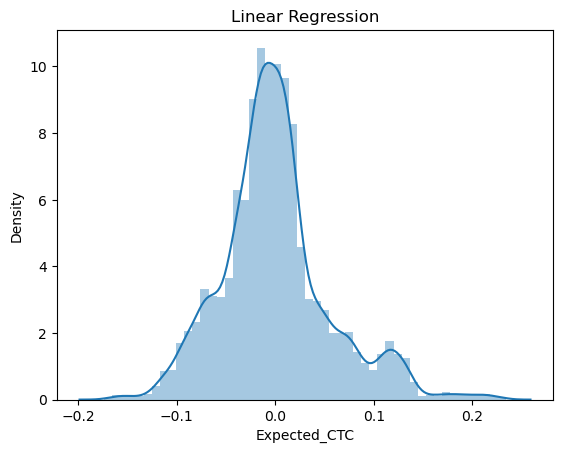

In [306]:
# checking difference between labled y and predicted y
sns.distplot(y_test-regression_model.predict(X_test))
plt.title('Linear Regression');

We are getting nearly bell shape curve that means our model working good? No we can't make that conclusion. Good bell curve only tell us the range of predicted values are with in the same range as our original data range values are.

### Ordinary Least Squares

In [307]:
import statsmodels.api as sm

In [308]:
# This adds the constant term beta0 to the Simple Linear Regression.
#X_con=sm.add_constant(X_train)

In [309]:
#fitting the model in training set
model_train = sm.OLS(y_train,X_train).fit()

In [310]:
#OLS Model summary of training set
model_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Expected_CTC   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          9.500e+04
Date:                Sat, 18 Nov 2023   Prob (F-statistic):                        0.00
Time:                        13:24:18   Log-Likelihood:                          6781.7
No. Observations:                6092   AIC:                                 -1.354e+04
Df Residuals:                    6082   BIC:                                 -1.348e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Total_Experience                     -0.0098      0.000    -38.188      0.000      -0.010      -0.009
Total_Experience_in_field_applied  7.468e-05      0.000      0.328      0.743      -0.000       0.001
Organization                         -0.0031      0.000    -14.580      0.000      -0.004      -0.003
Designation                          -0.0025      0.000    -12.682      0.000      -0.003      -0.002
Education                            -0.0144      0.001    -13.899      0.000      -0.016      -0.012
Curent_Location                      -0.0033      0.000    -14.408      0.000      -0.004      -0.003
Preferred_location                   -0.0034      0.000    -15.005      0.000      -0.004      -0.003
Current_CTC                           1.0347      0.002    570.018      0.000       1.031       1.038
Inhand_Offer                          0.0253      0.002     11.013      0.000       0.021       0.030
percentage_increament                 0.0091      0.000     81.276      0.000       0.009       0.009
==============================================================================
Omnibus:                       15.750   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.919
Skew:                           0.045   Prob(JB):                     7.79e-05
Kurtosis:                       3.258   Cond. No.                         77.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Get the value of coefficient of determination

In [311]:
print('The variation in the independent variable which is explained by the dependent variable is',round(model_train.rsquared*100,4),'%')

The variation in the independent variable which is explained by the dependent variable is 99.3638 %


Get the RMSE on training set

In [312]:
print("The Root Mean Square Error (RMSE) of the model is for the training set is",mean_squared_error(model_train.fittedvalues,y_train,squared=False))

The Root Mean Square Error (RMSE) of the model is for the training set is 0.0794875288645136


In [313]:
model_train.predict(X_train)

20708    0.108646
11551   -1.091142
1630     0.918917
19873   -0.229094
17295    1.510721
           ...   
13420    0.140514
21265   -1.219500
6350     0.960242
14920    0.116856
282      0.543335
Length: 6092, dtype: float64

In [314]:
import math
## Calculating the RMSE values of Train set with the code shown in the videos

math.sqrt(np.mean((model_train.predict(X_train)-y_train)**2))

0.07948752886451363

In [315]:
#fitting the model in test set
model_test = sm.OLS(y_test,X_test).fit()

In [316]:
#OLS Model summary of test set
model_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           Expected_CTC   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          2.211e+05
Date:                Sat, 18 Nov 2023   Prob (F-statistic):                        0.00
Time:                        13:24:19   Log-Likelihood:                          15731.
No. Observations:               14215   AIC:                                 -3.144e+04
Df Residuals:                   14205   BIC:                                 -3.137e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Total_Experience                     -0.0097      0.000    -57.727      0.000      -0.010      -0.009
Total_Experience_in_field_applied -6.183e-05      0.000     -0.415      0.678      -0.000       0.000
Organization                         -0.0031      0.000    -22.053      0.000      -0.003      -0.003
Designation                          -0.0027      0.000    -20.725      0.000      -0.003      -0.002
Education                            -0.0175      0.001    -25.679      0.000      -0.019      -0.016
Curent_Location                      -0.0029      0.000    -19.135      0.000      -0.003      -0.003
Preferred_location                   -0.0033      0.000    -21.619      0.000      -0.004      -0.003
Current_CTC                           1.0339      0.001    863.361      0.000       1.032       1.036
Inhand_Offer                          0.0294      0.002     19.348      0.000       0.026       0.032
percentage_increament                 0.0091    7.5e-05    121.426      0.000       0.009       0.009
==============================================================================
Omnibus:                       14.305   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.301
Skew:                           0.016   Prob(JB):                     0.000289
Kurtosis:                       3.163   Cond. No.                         77.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Get the Predictions on test set

In [317]:
ypred_OLS = model_train.predict(X_test)
print(ypred_OLS)

16352   -0.616092
8940     0.344237
14511    0.652673
18995    0.577163
15304    0.661159
           ...   
22576    0.710510
865      2.117769
17225    0.021688
10460   -1.334354
9892     0.759625
Length: 14215, dtype: float64


Get the RMSE on test set

In [318]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,ypred_OLS)))

The Root Mean Square Error (RMSE) of the model is for testing set is 0.08013799514078769


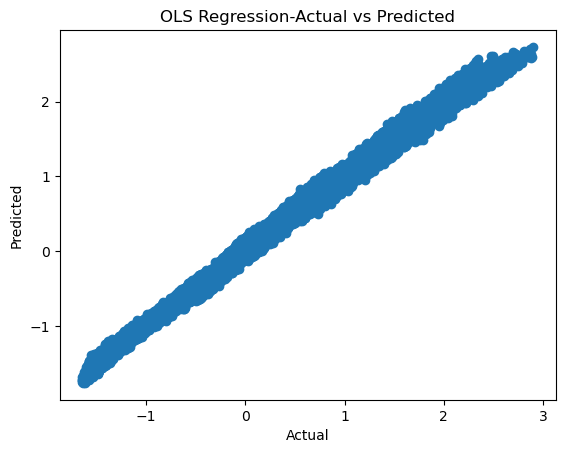

In [319]:
plt.scatter(y_test,ypred_OLS);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.title("OLS Regression-Actual vs Predicted");

## Lasso Regression

In [320]:
from sklearn.linear_model import Lasso

In [321]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model

Lasso model: [ 0.02898297  0.          0.         -0.         -0.         -0.
  0.          0.70031259 -0.          0.01984192]


#### Finding the Score of the Lasso regression(R squared)

In [322]:
#R squared of train set
print(lasso.score(X_train, y_train))


0.9717537590492116


In [323]:
#RMSE of train set
print("The Root Mean Square Error (RMSE) of the lasso regression model is for train set is",np.sqrt(mean_squared_error(y_train,lasso.predict(X_train))))

The Root Mean Square Error (RMSE) of the lasso regression model is for train set is 0.1674913528318034


#### Fitting the model on test set

In [324]:
lasso.fit(X_test,y_test)

Lasso(alpha=0.1)

In [325]:
#R squared of test set
print(lasso.score(X_test, y_test))

0.9713596902266868


##### More or less similar results but with less complex models.  Complexity is a function of variables and coefficients

#### RMSE Calculation

In [326]:
#RMSE on test set
print("The Root Mean Square Error (RMSE) of the lasso regression model is for testing set is",np.sqrt(mean_squared_error(y_test,lasso.predict(X_test))))

The Root Mean Square Error (RMSE) of the lasso regression model is for testing set is 0.16948146197751796


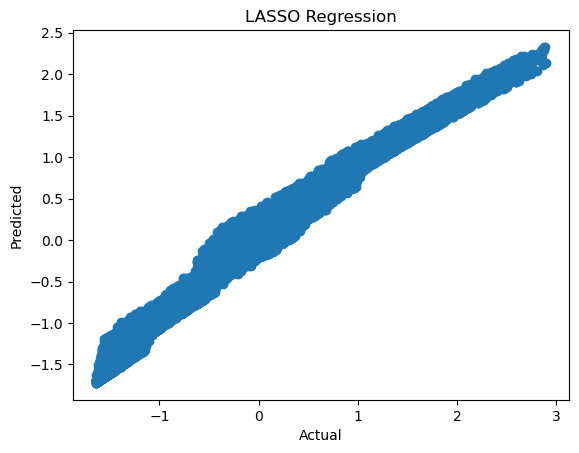

In [327]:
plt.scatter(y_test,lasso.predict(X_test));
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.title("LASSO Regression");

### Polynomial Regression


In [328]:
#Polynomial-Regression 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [329]:
poly = PolynomialFeatures(degree=2, interaction_only=True)
#transforming train data to polynomial features
X_train_poly = poly.fit_transform(X_train)

In [330]:
#shape of the dataset after tansforming
print(X_train.shape)
print(X_train_poly.shape)
poly

(6092, 10)
(6092, 56)


PolynomialFeatures(interaction_only=True)

In [331]:
#transforming test data to polynomial features
X_test_poly = poly.fit_transform(X_test)

In [332]:
#shape of the dataset after tansforming
print(X_test.shape)
print(X_test_poly.shape)
poly

(14215, 10)
(14215, 56)


PolynomialFeatures(interaction_only=True)

In [333]:
poly_clf = linear_model.LinearRegression()

In [334]:
poly_clf.fit(X_train_poly, y_train)

LinearRegression()

In [335]:
#calculating predicted value of y 
y_pred_poly_test = poly_clf.predict(X_test_poly)

In [336]:
#print R2 of train set

print(poly_clf.score(X_train_poly, y_train))

1.0


In [337]:
#RMSE on test set
print("The Root Mean Square Error (RMSE) of the polynomial regression model is for train set is",np.sqrt(mean_squared_error(y_train,poly_clf.predict(X_train_poly))))

The Root Mean Square Error (RMSE) of the polynomial regression model is for train set is 5.069148711350037e-14


In [338]:
#print R2 of test set

print(poly_clf.score(X_test_poly, y_test))

1.0


In [339]:
#RMSE on test set
print("The Root Mean Square Error (RMSE) of the polynomial regression model is for test set is",np.sqrt(mean_squared_error(y_test,poly_clf.predict(X_test_poly))))

The Root Mean Square Error (RMSE) of the polynomial regression model is for test set is 5.0380742515126526e-14


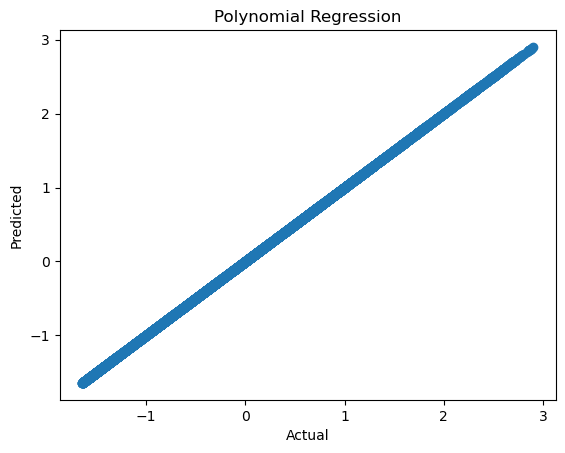

In [340]:
plt.scatter(y_test,poly_clf.predict(X_test_poly));
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.title("Polynomial Regression");

### Random Forest Regression

In [341]:
from sklearn.ensemble import RandomForestRegressor

In [342]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "warm_start":True,
    "oob_score":True,
    "random_state": 42,
}

Build And Fit model

In [343]:
reg =RandomForestRegressor(**params)
#fitting the model on train set
reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, min_samples_split=5, n_estimators=500,
                      oob_score=True, random_state=42, warm_start=True)

In [344]:
RandomForestRegressor(max_depth=4, min_samples_split=5, n_estimators=500,
                      oob_score=True, random_state=42, warm_start=True)

RandomForestRegressor(max_depth=4, min_samples_split=5, n_estimators=500,
                      oob_score=True, random_state=42, warm_start=True)

Make predictions

In [345]:
#making predictions on train dataset
y_pred_train = reg.predict(X_train)

In [346]:
#print R2 of train set

print(reg.score(X_train,y_train))

0.9866661512352104


Evaluate model with RMSE

In [347]:
#RMSE on train set
print("The Root Mean Square Error (RMSE) of the random forest regression model is for train set is",np.sqrt(mean_squared_error(y_train,y_pred_train)))

The Root Mean Square Error (RMSE) of the random forest regression model is for train set is 0.11507734224295219


In [348]:
reg.fit(X_test, y_test)

C:\Users\ARPITA BAYEN\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:429: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(


RandomForestRegressor(max_depth=4, min_samples_split=5, n_estimators=500,
                      oob_score=True, random_state=42, warm_start=True)

In [349]:
#print R2 of test set

print(reg.score(X_test,y_test))

0.9859365306699769


In [350]:
#making predictions on test data set
y_pred_test = reg.predict(X_test)

In [351]:
#RMSE on test set
print("The Root Mean Square Error (RMSE) of the Random Forest regression model is for test set is",np.sqrt(mean_squared_error(y_test,y_pred_test)))

The Root Mean Square Error (RMSE) of the Random Forest regression model is for test set is 0.11876256843496513


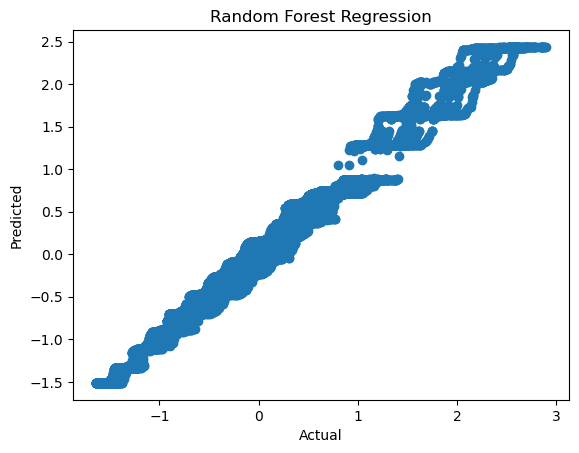

In [352]:
plt.scatter(y_test,y_pred_test);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.title("Random Forest Regression");

### Bayesian Regression

In [353]:
from sklearn.linear_model import BayesianRidge

In [354]:
# create Bayesian Ridge regression model
model_bayesian = BayesianRidge()

In [355]:
# fit the model to the train data set
model_bayesian.fit(X_train, y_train)

BayesianRidge()

In [356]:
# make predictions on train data
y_pred_bayesian_train = model_bayesian.predict(X_train)

In [357]:
print("Coefficients: ", model_bayesian.coef_)
print("Intercept: ", model_bayesian.intercept_)
print("Predictions: ", y_pred_bayesian_train)

Coefficients:  [-1.62612800e-03 -1.23293084e-05  3.78303022e-06  1.25543661e-05
 -1.02089345e-03 -1.52294560e-04 -1.11078716e-04  9.84749710e-01
  5.95610568e-04  1.55830100e-02]
Intercept:  -0.38509625917980234
Predictions:  [ 0.03352388 -1.19435999  0.94142281 ...  0.93492099  0.1245055
  0.55041079]


In [358]:
#print R2 of train set

print(model_bayesian.score(X_train,y_train))

0.9969665362118418


In [359]:
#RMSE on train set
print("The Root Mean Square Error (RMSE) of the Bayesian Regression model is for train set is",np.sqrt(mean_squared_error(y_train,y_pred_bayesian_train)))

The Root Mean Square Error (RMSE) of the Bayesian Regression model is for train set is 0.054888513350202665


In [360]:
# fit the model to the test data set
model_bayesian.fit(X_test, y_test)

BayesianRidge()

In [361]:
# make predictions on test data
y_pred_bayesian_test = model_bayesian.predict(X_test)

In [362]:
#print R2 of test set

print(model_bayesian.score(X_test,y_test))

0.9968873603611399


In [363]:
#RMSE on test set
print("The Root Mean Square Error (RMSE) of the Bayesian Regression model is for test set is",np.sqrt(mean_squared_error(y_test,y_pred_bayesian_test)))

The Root Mean Square Error (RMSE) of the Bayesian Regression model is for test set is 0.05587245675686155


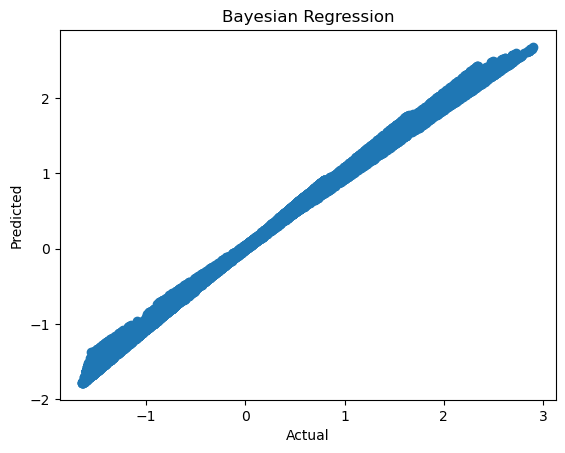

In [364]:
plt.scatter(y_test,y_pred_bayesian_test);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.title("Bayesian Regression");

# 